# Preface

This document is intended as an introduction to the Python
programming language and was compiled for the course 
_Machine Learning in Finance with Python_ (ECON5130)
given at the University of Glasgow.
The focus is on language elements and libraries that are useful
for data analysis, statistics, machine learning and numerical computations in general.

The course consists of a collection of interactive notebooks hosted
in a Github [repository](https://github.com/richardfoltyn/MLFP-ECON5130).
While the content in this document and in the interactive notebooks
is the same, the notebooks have the added benefit that they can
be run directly in a browser, allowing you to immediately experiment with
the provided code examples.

We omit numerous features of Python which are not of first-order
importance to master the topics mentioned above.
This includes manipulation of text data,
advanced input/output, generators, decorators and object-oriented
programming, among others.

The material does not assume any existing knowledge of Python or programming,
but moves at a brisk pace compared to other introductory general-purpose
Python programming textbooks. It is therefore important to
work through the exercises provided for most chapters to practice
applying the concepts covered. Suggested solutions are available for
all exercises.

Special thanks go to Jonna Olsson for reading through all units and suggesting
various improvements.


# Language and NumPy basics

In this unit we start exploring the Python language,
covering the following topics:

1. Basic syntax
2. Built-in data types
3. NumPy arrays

## Basic syntax

-   Everything after a # character (until the end of the line) is a comment and will be ignored.
-   Variable names are case sensitive.
-   Whitespace characters matter (unlike in most languages)!
-   Python uses indentation (usually 4 spaces) to group statements,
    for example loop bodies, functions, etc.
-   You don't need to add a character to terminate a line, unlike in some languages.
-   You can use the `print()` function to inspect almost any object.

In [1]:
# First example

# create a variable named 'text' that stores the string 'Hello, world!'
text = 'Hello, world!'

# print contents of 'text'
print(text)

Hello, world!


In Jupyter notebooks and interactive command-line environments,
we can also display a value by simply writing the variable name.

In [2]:
text

'Hello, world!'

Alternatively, we don't even need to create a variable but can
instead directly evaluate expressions and print the result:

In [3]:
2*3

6

This does not print anything in *proper* Python script files
that are run through the interpreter, though.

Calling `print()` is also useful if we want to display multiple expressions
from a single notebook cell, as otherwise only the last value is shown:

In [4]:
text = 'Hello world!'
var = 1
text        # does NOT print contents of text
var         # prints only value of var

1

In [5]:
print(text) # print text explicitly
var         # var is shown automatically

Hello world!


1

***
## Built-in data types

Pythons is a dynamically-typed language:

-   Unlike in C or Fortran, you don't need to declare a variable or its type.
-   You can inspect a variable's type using the built-in `type()` function,
    but you rarely need to do this.

We now look at the most useful built-in data types:

**Basic types**

- integers (`int`)
- floating-point numbers (`float`)
- boolean (`bool`)
- strings (`str`)

**Containers (or collections)**

- tuples (`tuple`)
- lists (`list`)
- dictionaries (`dict`)

### Integers and floats

Integers and floats (floating-point numbers) are the two main built-in data types to store
numerical data (we ignore complex numbers in this tutorial). Floating-point is the standard
way to represent real numbers on computers since these cannot store
real numbers with arbitrary precision.

In [6]:
# Integer variables
i = 1
type(i)

int

In [7]:
# Floating-point variables
x = 1.0
type(x)

float

In [8]:
# A name can reference any data type:
# Previously, x was a float, now it's an integer!
x = 1
type(x)

int

It is good programming practice to specify floating-point
literals using a decimal point. It makes a difference in
a few cases (especially when using NumPy arrays, or Python extensions such as
Numba or Cython):

In [9]:
x = 1.0         # instead of x = 1

A boolean (`bool`) is a special integer type that can only store two values,
`True` and `False`. We create booleans by assigning one of these values
to a variable:

In [10]:
x = True
x = False

Boolean values are most frequently used for conditional execution, i.e.,
a block of code is run only when some variable is `True`. We study
conditional execution in the next unit.

### Strings

The string data type stores sequences of characters:

In [11]:
# Strings need to be surrounded by single (') or double (") quotes!
institution = 'University of Glasgow'
institution = "University of Glasgow"

Strings support various operations some of which we explore in the exercises at the end of this section. For example, we can use the addition operation `+` to concatenate strings:

In [12]:
# Define two strings
str1 = 'Python'
str2 = 'course'

# Concatenate strings using +
str1 + ' ' + str2 

'Python course'

An extremely useful variant of strings are the so-called _f-strings_. These allow us to dynamically insert a variable value into a string, a feature we'll use throughout this course.

In [13]:
# Approximate value of pi
pi = 3.1415

# Use f-strings to embed the value of the variable version inside the string
s = f'Pi is approximately equal to {pi}'
s

'Pi is approximately equal to 3.1415'

### Tuples

Tuples represent a collection of several items which can
have different data types. They are created whenever several
items are separated by commas. The parentheses are optional:
```
(item1, item2, ...)
```

In [14]:
# A tuple containing a string, an integer and a float
items = ('foo', 1, 1.0)
items

('foo', 1, 1.0)

The parenthesis are optional, but improve readability:

In [15]:
items = 'foo', 1, 1.0       # equivalent way to create a tuple
items

('foo', 1, 1.0)

We use brackets `[]` to access an element in a tuple (or any other
container object)

In [16]:
first = items[0]            # variable first now contains 'foo'
first

'foo'

Python indices are 0-based, so 0 references the first element,
1 the second element, etc.

In [17]:
second = items[1]           # second element
second

1

Tuples are immutable, which means that the items
stored in the tuple cannot be changed!

In [18]:
# This raises an error!
items = 'foo', 1, 1.0
items[0] = 123


TypeError: 'tuple' object does not support item assignment

### Lists
Lists are like tuples, except that they can be modified.
We create lists using brackets,
```
[item1, item2, ...]
```

In [19]:
# Create list which contains a string, an integer and a float
lst = ['foo', 1, 1.0]
lst

['foo', 1, 1.0]

Accessing list items works the same way as with tuples

In [20]:
lst[0]                  # print first item

'foo'

Lists items can be modified:

In [21]:
lst[0] = 'bar'          # first element is now 'bar'
lst

['bar', 1, 1.0]

Lists are full-fledged objects that support various operations,
for example

In [22]:
lst.insert(0, 'abc')    # insert element at position 0
lst.append(2.0)         # append element at the end
del lst[3]              # delete the 4th element
lst

['abc', 'bar', 1, 2.0]

The built-in function `len()` returns the number
of elements in a list (and any other container object)

In [23]:
len(lst)

4

### Dictionaries
Dictionaries are container objects that map keys to values.

-   Both keys and values can be (almost any) Python objects,
    even though usually we use strings as keys.
-   Dictionaries are created using curly braces:
    `{key1: value1, key2: value2, ...}`.

For example, to create a dictionary with three items we write

In [24]:
dct = {
   'institution': 'University of Glasgow',
   'course': 'Python course',
   'year': 2021
}
dct

{'institution': 'University of Glasgow',
 'course': 'Python course',
 'year': 2021}

Specific values are accessed using the syntax `dict[key]`:

In [25]:
dct['institution']

'University of Glasgow'

We can use the same syntax to either modify an existing key
or add a new key-value pair:

In [26]:
dct['course'] = 'Introduction to Python'        # modify value of existing key
dct['city'] = 'Glasgow'                         # add new key-value pair
dct

{'institution': 'University of Glasgow',
 'course': 'Introduction to Python',
 'year': 2021,
 'city': 'Glasgow'}

Moreover, we can use the methods `keys()` and `values()` 
to get the collection of a dictionary's keys and values:

In [27]:
dct.keys()

dict_keys(['institution', 'course', 'year', 'city'])

In [28]:
dct.values()

dict_values(['University of Glasgow', 'Introduction to Python', 2021, 'Glasgow'])

When we try to retrieve a key that is not in the dictionary,
this will produce an error:

In [29]:
dct['country']

KeyError: 'country'

One way to get around this is to use the `get()` method which accepts a 
default value that will be returned whenever a key is not present:

In [30]:
dct.get('country', 'Scotland')      # return 'Scotland' if 'country' is
                                    # not a valid key

'Scotland'

***
## NumPy arrays

NumPy is a library that allows us to efficiently store and access
(mainly) numerical data and apply numerical operations
similar to those available in Matlab.

-   NumPy is not part of the core Python project.
-   Python itself has an array type, but there is really no
    reason to use it. Use NumPy!
-   NumPy types and functions are not built-in, we must
    first import them to make them visible.
    We do this using the `import` statement.

The convention is to make NumPy functionality available
using the `np` namespace:

In [31]:
import numpy as np

### Creating arrays
NumPy offers a multitude of functions to create arrays.

In [32]:
# Create a 1-dimensional array with 10 elements, initialise values to 0.
# We need to prefix the NumPy function zeros() with 'np'
arr = np.zeros(10)
arr

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
arr1 = np.ones(5)       # vector of five ones
arr1

array([1., 1., 1., 1., 1.])

We can also create sequences of integers using the `np.arange()` function:

In [34]:
arr2 = np.arange(5)     # vector [0,1,2,3,4]
arr2

array([0, 1, 2, 3, 4])

`np.arange()` accepts initial values and increments as optional arguments.
The end value is *not* included.

In [35]:
start = 2
end = 10
step = 2
arr3 = np.arange(start, end, step)
arr3

array([2, 4, 6, 8])

As in Matlab, there is a `np.linspace()` function that
creates a vector of uniformly-spaced real values.

In [36]:
# Create 11 elements, equally spaced on the interval [0.0, 1.0]
arr5 = np.linspace(0.0, 1.0, 11)
arr5

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

We create arrays of higher dimension by specifying
the desired shape. Shapes are specified as `tuple` arguments;
for example, the shape of an $m\times n$ matrix is `(m,n)`.

In [37]:
mat = np.ones((2,2))    # Create 2x2 matrix of ones
mat

array([[1., 1.],
       [1., 1.]])

**Creating arrays from other Python objects**

Arrays can be created from other objects such as lists
and tuples by calling `np.array()`

In [38]:
# Create array from list [1,2,3]
arr = np.array([1, 2, 3])
arr

array([1, 2, 3])

In [39]:
# Create array from tuple
arr = np.array((1.0, 2.0, 3.0))
arr

array([1., 2., 3.])

In [40]:
# Create two-dimensional array from nested list
arr = np.array([[1, 2, 3], [4, 5, 6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

### Reshaping arrays
The `reshape()` method of an array object can be used
to reshape it to some other (conformable) shape.

In [41]:
# Create vector of 4 elements and reshape it to a 2x2 matrix
mat = np.arange(4).reshape((2,2))
mat

array([[0, 1],
       [2, 3]])

In [42]:
# reshape back to vector of 4 elements
vec = mat.reshape(4)
vec

array([0, 1, 2, 3])

We use `-1` to let NumPy automatically compute
the size of *one* remaining dimension.

In [43]:
# with 2 dimensions, second dimension must have size 2
mat = np.arange(4).reshape((2, -1))
mat

array([[0, 1],
       [2, 3]])

If we want to convert an arbitrary array to a vector,
we can alternatively use the `flatten()` method.

In [44]:
mat.flatten()

array([0, 1, 2, 3])

*Important:* the reshaped array must have the same
number of elements!

In [45]:
import numpy as np
mat = np.arange(6).reshape((2,-1))
mat.reshape((2,2))      # Cannot reshape 6 into 4 elements!


ValueError: cannot reshape array of size 6 into shape (2,2)

### Indexing

**Single element indexing**

To retrieve a single element,
we specify the element's index on each axis
(axis is the NumPy terminology for an array dimension).

-   Remember that just like Python in general, NumPy arrays use
    0-based indices.
-   Unlike lists or tuples, NumPy arrays support multi-dimensional
    indexing.

In [46]:
import numpy as np

mat = np.arange(6).reshape((3,2))
mat

array([[0, 1],
       [2, 3],
       [4, 5]])

In [47]:
mat[0,1]    # returns element in row 1, column 2

1

It is important to pass multi-dimensional indices as a
tuple within brackets, i.e. `[0,1]` in the above example.
We could alternatively write `mat[0][1]`, which would give
the same result:

In [48]:
mat[0][1] == mat[0,1]       # don't do this!

True

This is substantially less efficient, though, as it first creates a
sub-dimensional array `mat[0]`, and then applies the second index
to this array.

**Index slices**

There are numerous ways to retrieve a subset of
elements from an array. The most common way is to
specify a triplet of values
`start:stop:step` called `slice` for some axis:

In [49]:
# Create a 3x2 matrix
mat = np.arange(6).reshape((2,3))
mat

array([[0, 1, 2],
       [3, 4, 5]])

In [50]:
# Retrieve only the first and third columns:
mat[0:2,0:3:2]

array([[0, 2],
       [3, 5]])

Indexing with slices can get quite intricate.
Some basic rules:

-   all tokens in `start:stop:step` are optional, with
    the obvious default values.
    We could therefore write `::` to include all indices,
    which is the same as `:`
- The end value is *not* included. Writing
  `vec[0:n]` does not include element with index $n$!
- Any of the elements of `start:stop:step` can be negative.
    - If `start` or `stop` are negative, elements are counted
        from the end of the array:
        `vec[:-1]` retrieves the whole vector except for the last element.
    - If `step` is negative, the order of elements is reversed.

In [51]:
vec = np.arange(5)
# These are equivalent ways to return the WHOLE vector
vec[0:5:1]      # all three tokens present
vec[::]         # omit all tokens
vec[:]          # omit all tokens
vec[:5]         # end value only
vec[-5:]        # start value only, using negative index

array([0, 1, 2, 3, 4])

You can reverse the order like this:

In [52]:
vec[::-1]

array([4, 3, 2, 1, 0])

With multi-dimensional arrays, the above rules apply for each
dimension.

-   We can, however, omit explicit indices
    for higher-order dimensions if all elements should
    be included.

In [53]:
mat[1]      # includes all columns of row 2; same as mat[1,:]

array([3, 4, 5])

We cannot omit the indices for leading axes, though! If an entire
leading axis is to be included, we specify this using `:`

In [54]:
mat[:, 1]   # includes all rows of column 2

array([1, 4])

**Indexing lists and tuples**

The basic indexing rules we have covered so far also apply to the
built-in `tuple` and `list` types. However, `list` and `tuple`
do not support advanced indexing available for NumPy arrays
which we study in later units.

In [55]:
# Apply start:stop:step indexing to tuple
tpl = (1,2,3)
tpl[:3:2]

(1, 3)

### Numerical data types (advanced)

We can explicitly specify the numerical data type when
creating NumPy arrays.

So far we haven't done so, and then NumPy does the following:

-   Functions such as `zeros()` and `ones()`
    default to using `np.float64`, a 64-bit floating-point
    data type (this is also called *double precision*)
-   Other functions such as `arange()` and `array()`
    inspect the input data and return a corresponding array.
-   Most array creation routines accept a `dtype` argument
    which allows you to explicitly set the data type.

*Examples:*

In [56]:
import numpy as np

# Floating-point arguments return array of type np.float64
arr = np.arange(1.0, 5.0, 1.0)
arr.dtype

dtype('float64')

In [57]:
# Integer arguments return array of type np.int64
arr = np.arange(1,5,1)
arr.dtype

dtype('int64')

Often we don't care about the data type too much, but keep in
mind that

-   Floating-point has limited precision, even for integers
    if these are larger than (approximately) $10^{16}$
-   Integer values cannot represent fractional numbers and
    (often) have a more limited range.

This might lead to surprising consequences:

In [58]:
# Create integer array
arr = np.ones(5, dtype=np.int64)
# Store floating-point in second element
arr[1] = 1.234
arr

array([1, 1, 1, 1, 1])

The array is unchanged because it's impossible to represent
1.234 as an integer value!

The take-away is to explicitly write floating-point
literal values and specify a floating-point `dtype` argument
when we want data to be interpreted as
floating-point values. For example, always write 1.0 instead of 1,
unless you *really* want an integer!

***
## Exercises

### Exercise 1: string operations

Experiment with operators applied to strings
and integers.

1.  Define two string variables and concatenate them using `+`
2.  Define a string variable and multiply it by 2 using `*`. What happens?
3.  Define two strings and compare whether they are equal using
    the `==` and `!=` relational operators.
4.  Define a string. Use the operators `in` and `not in` to
    test whether a character is contained in the string.
5.  Define two string variables and assign them the same value.
    Use the `is` operator to test whether these are identical
    objects.
6.  Define a string variable and use the `+=` assignment operator
    to append another string.

    The `+=` operator is one of several operators in Python that
    combine assignment with another operation, such as addition.
    In this particular case, these statements are equivalent:
    ```
    a += b
    a = a + b
    ```

### Exercise 2: string formatting

We frequently want to create strings that incorporate
integer and floating-point data, possibly formatted in a
particular way.

Python offers quite powerful formatting capabilities which can
become so complex that they are called the
*Format Specification Mini-Language* (see the [docs](https://docs.python.org/3/library/string.html#format-specification-mini-language)).
In this exercise, we explore a small but useful subset of formatting
instructions.

A format specification is a string that contains one or several
`{}`, for example:
```
s = 'The current version of Python is {}'
```
The token `{}` will be replaced with data converted to a string
when we apply the `format()` method:
```
s = 'The current version of Python is {}'.format(3.10)
```
The string `s` now contains the value
```
'The current version of Python is 3.10'
```
What if we want to format the float `3.10` in a particular way?
We can augment the `{}` to achieve that goal. For example,
if the data to be formatted is of type integer, we can specify

-   `{:wd}` where `w` denotes the total field width and `d`
    indicates that the data type is an integer.

    To print an integer into a field that is 3 characters
    wide, we would thus write `{:3d}`.

For floats we have additional options:

-   `{:w.df}` specifies that a float should be formatted using
    a field width `w` and `d` decimal digits.

    To print a float into a field of 10 characters using 5 decimal
    digits, we would thus specify `{:10.5f}`
-   `{:w.de}` is similar, but instead uses scientific
    notation with exponents.

    This is particularly useful for very large or very small numbers.

-   `{:w.dg}`, where `g` stands for *general* format, is a superset of `f` and `e`
    formatting. Either fixed or exponential notation is used
    depending on a number's magnitude.

In all these cases the field width `w` is optional
and can be omitted. Python then uses however many characters are
required.

Now what we have introduced the formatting language, you
are asked to perform the following exercises:

1.  Define two strings and concatenate them using the `format()` function.
    Add a space between them.
2.  Use the above example format string, but truncate the
    Python version to its major version number. Do you get the expected result?

3.  Print $\pi$ using a precision of 10 decimal digits.
    *Hint:* the value of $\pi$ is available as
    ```
    from math import pi
    ```
4.  Print `exp(10.0)` using exponential notation and three
    decimal digits.
    *Hint:* To use the exponential function, you need to import it using
    ```
    from math import exp
    ```

### Exercise 3: string formatting with f-strings

Since Python 3.6 there is an additional, more convenient way to
format strings, the so-called
*formatted string literals* or *f-strings* ([official documentation](https://www.python.org/dev/peps/pep-0498/)).
Instead of calling the `format()` method as in the previous
example, one can instead define a string which contain expressions
that will be evaluated at runtime.

The simplest example is to print the value of a variable using default
formatting:

In [59]:
name = 'Python'
s = f'{name} programming is fun!'
print(s)

Python programming is fun!


Note that the string needs to be prefixed by an `f` to indicate
that it contains expressions which need to be evaluated.
These expressions are again wrapped in braces.
Within braces, a syntax similar to the one shown in the previous
exercise can be used to specify detailed
formatting instructions. For example, you can specify the number
of decimal digits as follows:

In [60]:
value = 1.2345
s = f'Value with 2 significant digits: {value:.2f}'
print(s)

Value with 2 significant digits: 1.23


Note that in the above examples, the variables `name` and `value`
need to be known when the f-string is being defined.
Otherwise, you'll get the following error:

In [61]:
# cannot create f-string using unknown names
s = f'{unknown} is not defined'

NameError: name 'unknown' is not defined

Now that you have seen the basic usage, repeat Exercise 2 using
f-strings instead of the `format()` method!

### Exercise 4: operations on tuples and lists

Perform the following tasks and examine their results:

1.  Create two lists and add them using `+`.
2.  Multiply a list by the integer 2.
3.  Create a list `list1` and inspect the result of
    ```
    list1 += ['x', 'y', 'z']
    ```
4.  Create a list `list1` and inspect the result of
    ```
    list1 *= 2
    ```

Repeat steps 1-4 using tuples instead of lists.

Finally, create a list and a tuple and try to add them using `+`.
Does this work?

***
## Solutions

### Solution for exercise 1

In [62]:
# 1. string concatenation using addition
str1 = 'abc'
str2 = 'xyz'

# Concatenate two strings using +
str1 + str2

'abcxyz'

In [63]:
# 2. string multiplication by integers
str1 = 'abc'
# Repeat string using multiplication!
str1 * 2

'abcabc'

In [64]:
# 3. Test for string equality
str1 = 'abc'
str2 = 'xyz'
str1 == str2

False

In [65]:
# 3. Test for string inequality
str1 = 'abc'
str2 = 'xyz'
str1 != str2

True

In [66]:
# 4. Test whether individual character is included in string
str1 = 'abc'
'b' in str1

True

In [67]:
# 4. Test whether individual character is NOT included in string
str1 = 'abc'
'x' not in str1

True

The last two examples illustrate that in Python strings will
be interpreted as collections (of characters), just like lists
or tuples, if the context requires it. We can therefore apply
the `in` operator to test for membership.

In [68]:
# 5. Test for identity
str1 = 'abc'
str2 = 'abc'
str1 is str2

True

This result should be surprising and is somewhat specific to Python.
We would not expect two objects that were created completely
independently from each other to be *identical*, i.e. point to
the same memory. Python, however, caches string literals
for reasons of efficiency, so it actually does keep only *one*
copy of `'abc'` around, irrespective of how many variables
containing `abc` are created.

In [69]:
# 6. Append using +=
str1 = 'abc'
str1 += 'xyx'       # Append 'xyz' to value in str1, assign result to str1
str1

'abcxyx'

### Solution for exercise 2

In [70]:
# 1. String concatenation
str1 = 'abc'
str2 = 'xyz'

# format specification to concatenate two string with a space in between
fmt = '{} {}'
fmt.format(str1, str2)


'abc xyz'

In [71]:
# 2. Truncate Python version to major version number
# To do this, we specify 0 decimal digits!
fmt = 'The current major version of Python is {:.0f}'
fmt.format(3.10)     # Now this didn't work out as intended :)

'The current major version of Python is 3'

This does not work as intended because formatting with zero
decimal digits rounds the
floating-point number, instead of just truncating the decimal part.
We could instead convert the `float` to `int` before applying
formatting, since the function `int()` will truncate the
fractional part:

In [72]:
version = 3.10
fmt = 'The current major version of Python is {:d}'
print(fmt.format(int(version)))

The current major version of Python is 3


In [73]:
# 3. Print pi using 10 decimal digits
from math import pi
fmt = 'The first 10 digits of pi: {:.10f}'
fmt.format(pi)

'The first 10 digits of pi: 3.1415926536'

In [74]:
# 4. Print exp(10.0) using three decimal digits and exponential notation
from math import exp
fmt = 'exp(10.0) = {:.3e}'
fmt.format(exp(10.0))


'exp(10.0) = 2.203e+04'

### Solution for exercise 3

We now repeat exercise 2 using f-strings instead of the `format()`
method.

In [75]:
# 1. String concatenation
str1 = 'abc'
str2 = 'xyz'

# format specification to concatenate two string with a space inbetween
s = f'{str1} {str1}'
print(s)


abc abc


In [76]:
# 2. Truncate Python version to major version number
# To do this, we specify 0 decimal digits!
version = 3.10
s = f'The current major version of Python is {version:.0f}'
print(s)        # does not work as intended!

The current major version of Python is 3


This does not work as intended because formatting with zero
decimal digits rounds the
floating-point number, instead of just truncating the decimal part.
See the previous exercise for one possible solution.

In [77]:
# 3. Print pi using 10 decimal digits
from math import pi
s = f'The first 10 digits of pi: {pi:.10f}'
print(s)

The first 10 digits of pi: 3.1415926536


In [78]:
# 4. Print exp(10.0) using three decimal digits and exponential notation
from math import exp
s = f'exp(10.0) = {exp(10.0):.3e}'
print(s)

exp(10.0) = 2.203e+04


The last example illustrates that f-string expressions can also
be function calls, not just variable names!


### Solution for exercise 4

**List operators**

In [79]:
list1 = [1, 2, 3]
list2 = ['a', 'b', 'c']

# 1. Adding two lists concatenates the second list to the first
# and returns a new list object
list1 + list2

[1, 2, 3, 'a', 'b', 'c']

In [80]:
# 2. multiplication of list and integer replicates the list!
list1 * 2

[1, 2, 3, 1, 2, 3]

In [81]:
# 3. Extending list in place using +=
list1 += ['x', 'y', 'z']
list1

[1, 2, 3, 'x', 'y', 'z']

Note that we cannot append an element to the list that is not a list:

In [82]:
list1 += 10

TypeError: 'int' object is not iterable

Instead, we need to wrap a singular element to create a list like this:

In [83]:
list1 += [10]
list1

[1, 2, 3, 'x', 'y', 'z', 10]

In [84]:
# 4. Replicating list in place using *=
list1 *= 2
list1


[1, 2, 3, 'x', 'y', 'z', 10, 1, 2, 3, 'x', 'y', 'z', 10]

**Tuple operators**


In [85]:
tpl1 = 1, 2, 3
tpl2 = 'a', 'b', 'c'

# 1. Adding two tuples concatenates the second tuple to the first
# and returns a new tuple object
tpl1 + tpl2

(1, 2, 3, 'a', 'b', 'c')

In [86]:
# 2. multiplication of tuple and integer replicates the tuple!
tpl1 * 2

(1, 2, 3, 1, 2, 3)

In [87]:
# 3. Extending tuple in place
tpl1 += ('x', 'y', 'z')
tpl1

(1, 2, 3, 'x', 'y', 'z')

It might be surprising that this works since a `tuple` is
an immutable object. However, what happens is that the original
`tuple` is discarded and the reference `tpl1` now points to a
newly created `tuple`.

The same happens when we replicate a `tuple` with `*=`:

In [88]:
# 4. Replicate tuple in place using *=
tpl1 *= 2
tpl1

(1, 2, 3, 'x', 'y', 'z', 1, 2, 3, 'x', 'y', 'z')

**Tuple and list operators**

We cannot mix tuples and lists as operands!

In [89]:
lst = [1, 2, 3]
tpl = 'a', 'b', 'c'

# Cannot concatenate list and tuple!
lst + tpl


TypeError: can only concatenate list (not "tuple") to list

# Control flow and list comprehensions

In this unit, we continue to explore basic concepts
of the Python programming language such as
conditional execution and loops.

## Conditional execution

Frequently, we want to execute a code block only
if some condition holds. We can do this using the
`if` statement:

In [1]:
if 2*2 == 4:
    print('Python knows arithmetic!')

Python knows arithmetic!


A few observations:

-   Conditional blocks are grouped using indentation (leading spaces).
    Remember from the previous unit that whitespace matters in Python!
-   We write the equality operator using *two* equal signs,
    `==`. This is to distinguish it from the assignment operator `=`.

We can also add an `else` block that will be executed
whenever a condition is false:

In [2]:
if 2*2 == 3:
    # this branch will never be executed
    print('Something is fishy here')
else:
    print('Python knows arithmetic!')

Python knows arithmetic!


Finally, we can add more than one conditional branch
using the `elif` clause:

In [3]:
var = 1
if var == 0:
    print('var is 0')
elif var == 1:
    print('var is 1')
else:
    print('var is neither 0 nor 1')

var is 1


### Truth value testing
We already encountered `==` to test whether two values
are equal.
Python offers many more operators that return
either `True` or `False` and can be used to control conditional execution.

| Expression    | Description |
| ------------- | ----------- |
| `==`          | Equal. Works for numerical values, strings, etc. |
| `!=`          | Not equal. Works on numerical values, strings, etc. |
| `>`, `>=`, `<`,`<=` | Usual comparison of numerical values |
|  `a is b`, `a is not b`   | Test identity. `a is b` is `True` if `a` and `b` are the same object |
| `a in b`, `a not in b`    | Test whether `a` is or is not included in `b` where `b` is a collection |
| `if obj`, `if not obj`    | Any Python object evaluates to `True` or `False` in an intuitive fashion (see below) |

Additionally, there are logical operators that
allow us to combine two logical values:

| Expression | Description |
| ---------- | ----------- |
| `a and b`  | `True` if both `a` and `b` are `True` |
| `a or b`   | `True` if at least one of `a` or `b` is `True` |

*Examples:*

In [4]:
# list1 and list2 reference the same object
list1 = [1,2]
list2 = list1
list1 is list2      # objects are identical, returns True

True

In [5]:
# list1 and list2 do NOT reference the same object, but contain
# identical elements.
list2 = list1.copy()
list1 is list2      # returns False

False

In [6]:
# Check if collections contain the same elements
list1 == list2      # returns True

True

In [7]:
# Check whether element is in collection
1 in list1          # returns True

True

In [8]:
# Combine logical expressions using 'and'
1 in list1 and 2 in list1   # returns True

True

We can also use the `in` operator to determine whether a key
is contained in a dictionary:

In [9]:
dct = {'institution': 'University of Glasgow'}
'institution' in dct        # prints True

True

In [10]:
# check whether a key is NOT in the dictionary
'course' not in dct         # prints True

True

As mentioned above, any object evaluates to `True` or `False`
in an `if` statement:
```
if obj:
    # do something if obj evaluates to True
```
The rules are quite intuitive: an object evaluates to `False` if

-   it has a numerical type and is `0` (or `0.0`, or complex `0+0j`)
-   it is an empty collection (tuple, list, dictionary, array, etc.)
-   it is of logical (boolean) type and has value `False`
-   it is `None`, a special built-in value used to denote that
    a variable does not reference anything.

In most other cases, an expression evaluates to `True`.

*Examples:*


In [11]:
# evaluate numerical variable
x = 0.0
if x:
    print('Value is non-zero')
else:
    print('Value is zero')

Value is zero


In [12]:
# Evaluate boolean variable
flag = True
if flag:
    print('Flag is True')
else:
    print('Flag is False')

Flag is True


The most important exception to the rule that objects intuitively
evaluate to `True` or `False` if needed are NumPy arrays:

In [13]:
import numpy as np

# Create array with 5 zeros
arr = np.zeros(5)
if arr:
    print('true!')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

As the error message indicates, Python requires you to be more specific
about what exactly should be tested.

### Conditional expressions

Conditional expression are more compact than conditional statements
and can be used to return a value depending
on some condition. A conditional expression takes three arguments using
the syntax

    <value if true> if <condition> else <value if false>

The value of this expression can be assigned to a variable,
passed to a function, etc.

To illustrate, imagine we have the following code:

In [14]:
x = 1

# Test whether x is divisible by 2 without remainder using
# the modulo operator %
if (x % 2) == 0:
    var = 'even'
else:
    var = 'odd'

This code sets the value of `var` to either `'even'` or `'odd'`,
depending on whether `x` is an even or odd integer. We can formulate
this more concisely using a conditional expression:

In [15]:
var = 'even' if (x % 2) == 0 else 'odd'

We can even directly print the value of this expression!

In [16]:
x = 1
print('even' if (x % 2) == 0 else 'odd')

odd


***
## Loops

Whenever we want to iterate over several items, we use the
`for` loop. The `for` loop in Python is particularly powerful
because it can "magically" iterate over all sorts of data,
not just integer ranges.

The standard use-case is to iterate over a set of integers:

In [17]:
# iterate over 0,...,3 and print each element
for i in range(4):
    print(i)

0
1
2
3


We use the built-in `range` function to define the sequence
of integers over which to loop. As usual in Python, the
last element is *not* included. We can explicitly specify
the start value and increment using the more advanced syntax
`range(start,stop,step)`:

In [18]:
# iterate over 1,3
for i in range(1, 4, 2):
    print(i)

1
3


Unlike with some other languages, we can directly
iterate over elements of a collection:

In [19]:
cities = ('Glasgow', 'Edinburgh', 'St. Andrews')
for city in cities:
    print(city)

Glasgow
Edinburgh
St. Andrews


We could of course alternatively iterate over indices
and extract the corresponding element, but there is no
need to:

In [20]:
# Needlessly complicated and non-Pythonic
for i in range(len(cities)):
    # print city at index i
    print(cities[i])

Glasgow
Edinburgh
St. Andrews


Note that when looping over dictionaries, the default 
is to iterate over *keys*:

In [21]:
dct = {'key1': 'value1', 'key2': 'value2'}
for key in dct:
    print(key)

key1
key2


We can explicitly choose whether to iterate over keys, values, or both:

In [22]:
# iterate over keys, same as example above.
for key in dct.keys():
    print(key)

key1
key2


In [23]:
# iterate over values
for value in dct.values():
    print(value)

value1
value2


In [24]:
# iterate over keys and values at the same time
# using the items() method
for key, value in dct.items():
    # use format string to print key: value
    print(f'{key}: {value}')

key1: value1
key2: value2


Note that `items()` returns the key-value pairs as `tuples`,
so we need to unpack each tuple by writing `key, value`
as the running variables of the `for` loop.

Sometimes the set of items over which to iterate is not known ex ante,
and then we can instead use the `while` loop with a terminal condition:

In [25]:
z = 1.001
i = 0

# How many iterations will be performed? Not obvious ex ante.
while z < 100.0:
    z = z*z + 0.234
    i = i + 1

# print number of iterations
print(f'loop terminated after {i} iterations')

loop terminated after 5 iterations


### Advanced looping

Oftentimes, we want to iterate over a list of items and
at the same time keep track of an item's index. We can
do this elegantly using the `enumerate()` function:

In [26]:
cities = ('Glasgow', 'Edinburgh', 'St. Andrews')

# Iterate over cities, keep track of index in variable i
for i, city in enumerate(cities):
    print(f'City {i}: {city}')

City 0: Glasgow
City 1: Edinburgh
City 2: St. Andrews


We can skip an iteration or terminate the loop using the
`continue` and `break` statements, respectively:

In [27]:
for city in cities:
    if city == 'Edinburgh':
        # skip to next iteration in case of Edinburgh
        continue
    print(city)

Glasgow
St. Andrews


In [28]:
for city in cities:
    if city == 'Glasgow':
        # Terminate iteration as soon as we find Glasgow
        print('Found Glasgow')
        break

Found Glasgow


***
## List comprehensions

Python implements a powerful feature called _list comprehensions_ that can be
used to create collections such as tuples and lists without writing loop statements.

For example, imagine we want to create a list of squares
of the integers $0,\dots,4$. We can do this using a loop
and a list's `append()` method:

In [29]:
# Initialise empty list
squares = []

# Loop over integers 0,...,4
for i in range(5):
    # The power operator in Python is **
    squares.append(i**2)
squares

[0, 1, 4, 9, 16]

This is quite bloated and can be collapsed into a single
expression using a list comprehension:

In [30]:
squares = [i**2 for i in range(5)]
squares

[0, 1, 4, 9, 16]

If the desired result should be a `tuple`, we can instead write

In [31]:
squares = tuple(i**2 for i in range(5))
squares

(0, 1, 4, 9, 16)

Alternatively, we can also create a dictionary using curly
braces and the syntax `{key: <expression> for ...}`:

In [32]:
squares = {i: i**2 for i in range(5)}
squares

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16}

List comprehensions can be nested and combined with
conditions to create almost arbitrarily complex expressions
(this doesn't mean that you should, though!)

In [33]:
# Create incomprehensible list comprehension.
# The modulo operator in Python is %
items = [i*j for i in range(5) if i % 2 == 0 for j in range(i)]
items

[0, 2, 0, 4, 8, 12]

Written out as two nested loops, this code is equivalent to

In [34]:
items = []
for i in range(5):
    if i % 2 == 0:
        for j in range(i):
            items.append(i*j)
items

[0, 2, 0, 4, 8, 12]

***
## Exercises

These exercises are not meant to demonstrate the most efficient
use of Python, but to help you practice the material we have
studied above. In fact, you'd most likely *not* want to use the solutions presented here
in real code!

### Exercise 1: Approximate Euler's number
Euler's number is defined as
$$e = \lim_{n\to\infty} \left(1+\frac{1}{n}\right)^n$$

1.  Create a sequence of the approximations to $e$ for $n=10,20,30,\dots,100$
    using a list comprehension.
2.  Compute the approximation error for each of the elements.
    *Hint:* To get the built-in value for $e$, use
    the import statement
    ```
    from math import e
    ```

### Exercise 2: Approximate the sum of a geometric series

Let $\alpha \in (0,1)$. The sum of the
geometric series $(1,\alpha,\alpha^2,\dots)$ is given by
$$\sigma = \sum_{i=0}^{\infty} \alpha^i = \frac{1}{1-\alpha}$$

Assume that $\alpha = 0.1$.
Write a loop that accumulates the values of the sequence
$(1,\alpha,\alpha^2,\dots)$ until the difference to the true
value is smaller than $1\times 10^{-8}$.
How many elements does it take?

*Hint:* In Python (and many other languages) the floating-point
value $1\times10^{-8}$ is written as `1e-8`.

### Exercise 3: Binary search (advanced)

The [bisection method](https://en.wikipedia.org/wiki/Bisection_method)
can be used to find to root of a function
$f(x)$, i.e., the point $x_0$ such that $f(x_0) = 0$.
In this exercise, we will use the same algorithm
to find the interval of a strictly monotonic
sequence of numbers that brackets the value zero
(this is a [binary search algorithm](https://en.wikipedia.org/wiki/Binary_search_algorithm)
with approximate matching).

Assume that we have an array `x` of 11 increasing real numbers
given by

In [35]:
import numpy as np
x = np.linspace(-0.5, 1.0, 11)
x

array([-0.5 , -0.35, -0.2 , -0.05,  0.1 ,  0.25,  0.4 ,  0.55,  0.7 ,
        0.85,  1.  ])

Write code that identifies the bracketing interval
(in this case [-0.05,0.1]) using the following algorithm:

1.  Initialize the index of the bracket lower bound to
    `lbound=0` and the index of the bracket upper
    bound to `ubound=len(x)-1`.
2.  Compute the midpoint between these two indices (rounded to
    the nearest integer), `mid = (ubound + lbound) // 2`.
    
    *Hint:* The operator `//` truncates the result of a division
    to the nearest integer.
3.  Inspect `x[mid]`, the value at index `mid`. If `x[mid]`
    has the same sign as `x[ubound]`, update the upper bound,
    `ubound=mid`. Otherwise, update the lower bound.
4.  Continue until `ubound = lbound + 1`, i.e., until you
    have found the bracket `x[lbound] <= 0 < x[ubound]`.

### Exercise 4: Diagonal and band matrices

Let `a` be a matrix of zeros with shape `(m,n)` with an integer data type:
```
a = np.zeros((m,n), dtype=int)
```

1.  Set `m = n = 4`. Fill up the diagonal of `a` with ones so that it
    becomes an identity matrix. Verify that `np.identity()` gives the same result.
2.  Recreate `a` to have dimensions `m = 4` and `n = 5`. Modify the main, first lower and
    first upper diagonals so that the resulting matrix looks like this,
    where omitted elements are zeros:
    $$
    \begin{bmatrix}
    1 & 2 &   &   & \\
    3 & 1 & 2 &   & \\
      & 3 & 1 & 2 & \\
      &   & 3 & 1 & 2
    \end{bmatrix}
    $$

    *Hint:* Use nested `for` loops to set the diagonal elements.

### Exercise 5: Triangular matrices

Let `a` be a matrix of zeroes with shape `(m,n)` and integer data type:
```
a = np.zeros((m,n), dtype=int)
```

Assume that `m = n = 4`. Using loops and `if` statements, modify the elements of `a`
to obtain the following upper-triangular matrix, where omitted elements
are set to zero:
$$
\begin{bmatrix}
1 & 2 & 3 & 4  \\
 & 5 & 6 & 7  \\
  & & 8 & 9 \\
  & & & 10 
\end{bmatrix}
$$

***
## Solutions

### Solution for exercise 1

In [36]:
# Compute approximation for n = 10, 20,..., 100
euler_approx = [(1.0+1.0/i)**i for i in range(10,101,10)]
print('Approximate values')
print(euler_approx)

# import 'correct' value
from math import e

# We need to subtract e from each element to get the approximation error
euler_error = [approx - e for approx in euler_approx]
print('Approximation error')
print(euler_error)


Approximate values
[2.5937424601000023, 2.653297705144422, 2.6743187758703026, 2.685063838389963, 2.691588029073608, 2.6959701393302162, 2.6991163709761854, 2.7014849407533275, 2.703332461058186, 2.7048138294215285]
Approximation error
[-0.12453936835904278, -0.06498412331462289, -0.043963052588742446, -0.03321799006908188, -0.026693799385437256, -0.02231168912882886, -0.019165457482859694, -0.016796887705717634, -0.01494936740085917, -0.01346799903751661]


### Solution for exercise 2

We don't know now many iterations we will need to get to the required
tolerance of $1\times10^{-8}$, so this is a good opportunity
to use a `while` loop.

In [37]:
# Convergence tolerance
tol = 1e-8
alpha = 0.1
# The correct value
sigma_exact = 1.0/(1.0 - alpha)

# keep track of number of iterations
n = 0

# Initialise approximated sum
sigma = 0.0

# Iterate until absolute difference is smaller than tolerance level.
# The built-in function abs() returns the absolute value.

while abs(sigma - sigma_exact) > tol:
    # We can combine addition and assignment into a single operator +=
    # This is equivalent to
    #   sigma = sigma + alpha**n
    sigma += alpha**n
    # Increment exponent
    n += 1

print(f'Number of iterations: {n}, approx. sum: {sigma:.8f}')

Number of iterations: 9, approx. sum: 1.11111111


### Solution for exercise 3

To complete the exercise, all you have to do is to translate
the algorithm given in the exercise into code.

Since we don't know how many iterations it takes to find the bracket,
we use a `while` loop that continues as long
as `lbound` and `ubound` are more than 1 apart.

In [38]:
import numpy as np

# Given array of increasing numbers
x = np.linspace(-0.5, 1.0, 11)


lbound = 0
ubound = len(x) - 1

while ubound > (lbound + 1):
    # Index of mid point. Indices have to be integers, so
    # we need to truncate the division result to an integer.
    mid = (ubound + lbound) // 2

    if (x[mid] * x[ubound]) > 0.0:
        # x[mid] and x[ubound] have same sign!
        ubound = mid
        print(f'Setting upper bound index to {ubound}')
    else:
        # x[mid] and x[lbound] have the same sign
        # or at least one of them is zero
        lbound = mid
        print(f'Setting lower bound index to {lbound}')

print(f'Value at lower bound: {x[lbound]:.4g}')
print(f'Value at upper bound: {x[ubound]:.4g}')

Setting upper bound index to 5
Setting lower bound index to 2
Setting lower bound index to 3
Setting upper bound index to 4
Value at lower bound: -0.05
Value at upper bound: 0.1


In this implementation, we use the fact that two non-zero real numbers $a$
and $b$ have the same sign whenever $a \cdot b > 0$.

### Solution for exercise 4

For the first part, we need to loop over the diagonal elements and overwrite
the zeros with ones:

In [39]:
# Part 1: create identity matrix

import numpy as np

n = 4
a = np.zeros((n,n), dtype=int)

# loop over diagonal elements, set them to 1
for i in range(n):
    a[i,i] = 1

# print identity matrix
a

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

You can get the same result using NumPy's `np.identity()` function:

In [40]:
n = 4
np.identity(n, dtype=int)

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

For the second part, we need nested loops over rows and columns and we check at each 
position $(i,j)$ whether it is on the main diagonal, or on the first upper 
or lower diagonal.

In [41]:
# Part 2: create band matrix

import numpy as np

m = 4
n = 5

a = np.zeros((m,n), dtype=int)

# loop over rows
for i in range(m):
    # loop over columns
    for j in range(n):
        if i == j:
            # main diagonal element
            a[i,j] = 1
        elif i == (j - 1):
            # upper diagonal element
            a[i,j] = 2
        elif i == (j + 1):
            # lower diagonal element
            a[i,j] = 3

# print final matrix
a

array([[1, 2, 0, 0, 0],
       [3, 1, 2, 0, 0],
       [0, 3, 1, 2, 0],
       [0, 0, 3, 1, 2]])

### Solution for exercise 5

We solve this exercise using two nested `for` loops, the first over rows,
the second over columns:

In [42]:
import numpy as np 

m = 4
n = 4

a = np.zeros((m,n), dtype=int)

# keep track of value to be inserted
value = 1

# loop over rows
for i in range(m):
    # loop over columns
    for j in range(i, n):
        a[i,j] = value
        # increment value for next matching element
        value += 1

# print final matrix
a


array([[ 1,  2,  3,  4],
       [ 0,  5,  6,  7],
       [ 0,  0,  8,  9],
       [ 0,  0,  0, 10]])

Note that the loop over columns uses the current row index as the lower bound, since
we never need to insert anything at element $(i,j)$ if $j < i$.

# Reusing code: Functions, modules and packages

In this unit, we learn how to build reusable code with functions.
We will also briefly discuss modules and packages.

## Functions

Functions are used to implement code that performs a narrowly
defined task. We use functions for two reasons:

1.  A function can be called repeatedly without having to
    write code again and again.
2.  Even if a function is not called frequently, functions
    allow us to write code that is "shielded" from other code
    we write and is called via a clean interface.
    This helps to write more robust and error-free code.

Functions are defined using the `def` keyword, and the function
body needs to be an indented block:

In [1]:
def func():
    print('func called')

# invoke func without arguments
func()

func called


### Arguments
Functions can have an arbitrary number of positional arguments
(also called parameters).

In [2]:
# Define func to accept argument x
def func(x):
    print(f'func called with argument {x}')

# call function with various arguments.
func(1)
func('foo')

func called with argument 1
func called with argument foo


### Return values
Functions can also return values to their caller using
the `return` statement.

In [3]:
def func(x):
    return x * 2.0

result = func(1.0)
print(result)       # prints 2.0

2.0


A `return` statement without any argument immediately exits the functions.
The default return value is the special type `None`.

A function can return multiple values which are then automatically collected
into a tuple:

In [4]:
def func():
    return 1, 2, 3

values = func()         # call func(), get tuple of values
type(values)

tuple

Python supports "unpacking" of tuples, lists, etc.
We can use this to directly assign names to multiple return values:

In [5]:
def func():
    return 'a', 'b', 'c'

value1, value2, value3 = func()     # call func(), unpack return values
print(f'Value 1: {value1}, Value 2: {value2}, Value 3: {value3}')

Value 1: a, Value 2: b, Value 3: c


### Accessing data from the outer scope
A function need not have arguments or a return value, but that limits its usefulness
somewhat. However, a function can access outside data which is
defined in the so-called outer scope:

In [6]:
x = 1.0
def func():
    # Read x from outer scope
    print(f'func accessing x from outer scope: x = {x}')

# prints value of x from within func()
func()

func accessing x from outer scope: x = 1.0


We can write functions without any arguments
that only operate on outside data. However, this is terrible programming
practice and should be avoided in most cases.

Because functions can operate on external data,
they are not analogous to mathematical functions. If we write
$f(x)$, we usually mean that $f$ is a function of $x$ only
(and possibly some constant parameters).
By definition we must have

$$x_1 = x_2 \Longrightarrow f(x_1) = f(x_2),$$

i.e. a function always returns the same value when
called with the same parameters.
However, this is not the case in Python or most other programming
languages:

In [7]:
a = 1.0
def func(x):
    return a*x

x = 1.0
print(func(x))      # prints 1.0

a = 2.0
print(func(x))      # x unchanged, but prints 2.0

1.0
2.0


### More on arguments

**Default arguments**

Python offers an extremely convenient way to specify default values
for arguments, so these need not be passed when the function is called:

In [8]:
# define function with a default value for argument alpha
def func(x, alpha=1.0):
    return x * alpha

print(func(2.0))        # uses default value for alpha
print(func(2.0, 1.0))   # explicitly specified optional argument
print(func(2.0, 3.0))   # use some other value for alpha

2.0
2.0
6.0


**Keyword (or named) arguments**

Arguments don't need to be provided in the same order as specified in the function signature. We can use argument names to explicitly assign values to the corresponding argument.

In [9]:
def func(arg1, arg2):
    print(f'arg1: {arg1}, arg2: {arg2}')

func(1, 2)              # Call using purely positional arguments
func(arg1=1, arg2=2)    # Use argument names to explicitly assign values
func(arg2=2, arg1=1)    # With keyword arguments, the order does not matter!

arg1: 1, arg2: 2
arg1: 1, arg2: 2
arg1: 1, arg2: 2


**Arbitrary number of optional arguments**

Python supports functions which accept an arbitrary number of positional
and keyword arguments. This is accomplished via two special
tokens:

-   `*args`: collects any number of "excess" *positional arguments* and packs
    them into a tuple.
-   `**kwargs`: collects any number of "excess" *keyword arguments* and packs them
    into a dictionary. Needs to be placed at the end of the argument list!

*Examples:*

In [10]:
# Define function with mandatory, optional, optional positional
# and optional keyword arguments

def func(x, opt='default', *args, **kwargs):
    print(f'Required argument x: {x}')
    print(f'Optional argument opt: {opt}')
    if args:
        # if the tuple 'args' is non-empty, print its contents
        print('Optional positional arguments:')
        for arg in args:
            print(f'  {arg}')
    if kwargs:
        # if the dictionary 'kwargs' is non-empty, print its contents
        print('Optional keyword arguments:')
        for key, value in kwargs.items():
            print(f'  {key}: {value}')

In [11]:
# Call only with required argument
func(0)

Required argument x: 0
Optional argument opt: default


In [12]:
# Call with required and optional arguments
func(0, 'optional')

Required argument x: 0
Optional argument opt: optional


In [13]:
# Call with required and optional arguments, and
# optional positional arguments
func(0, 'optional', 1, 2, 3)

Required argument x: 0
Optional argument opt: optional
Optional positional arguments:
  1
  2
  3


In [14]:
# Call with required and optional arguments, and
# optional positional and keyword arguments
func(0, 'optional', 1, 2, 3, arg1='value1', arg2='value2')

Required argument x: 0
Optional argument opt: optional
Optional positional arguments:
  1
  2
  3
Optional keyword arguments:
  arg1: value1
  arg2: value2


We don't even need to specify arguments in the order they are defined
in the function, except for optional positional arguments, since these have no argument names.
We can just use the `name=value` syntax:

In [15]:
# call func() with interchanged argument order
func(opt='optional value', x=1)

Required argument x: 1
Optional argument opt: optional value


Note, however, that in a function call any positional arguments must come first and those passed
as `name=value` pairs last:

In [16]:
x = 1

# this will not work, cannot specify positional arguments last
func(opt='optional value', x)

SyntaxError: positional argument follows keyword argument (1459741144.py, line 4)

The same applies for optional arguments passed in via `*args` and `**kwargs`:

In [17]:
# fails because arguments collected in *args must
# be specified before arguments collected in **kwargs!
func(1.0, 'opt', arg1='value1', arg2='value2', 1, 2, 3)
     

SyntaxError: positional argument follows keyword argument (1917091775.py, line 3)

### Modifying data in the outer scope

So far, we covered read-only access to data defined outside of a function and
relied on return values to pass results back to the caller. However, it is possible
to directly *modify* data in the outer scope, even though this should usually be avoided:

-   Using arguments and return values clearly defines a function's interface,
    there are no unpleasant surprises.
-   Conversely, if a function starts modifying values in the caller's environment,
    there is no way to be sure what the function is changing in the outer scope  
    other than examining its source code.

Consider first the following attempt to modify a value defined outside of the function:

In [18]:
var = 'outer scope'

# Create function, assign value to var
def modify_var():
    var = 'inner scope'

print(var)
modify_var()
print(var)

outer scope
outer scope


This code prints `'outer scope'` twice. What happened? Without any further
instructions, the assignment inside the function creates a *local* variable `var` that
is completely disconnected from `var` in the outer scope!

We need to use the `global` statement to tell Python to instead assign to a variable 
in the global (outer) scope:

In [19]:
var  = 'outer scope'

def modify_var():
    global var 
    var = 'inner scope'

print(var)
modify_var()
print(var)

outer scope
inner scope


The second output now reads `'inner scope'`.

Note that `global` in Python actually means global to a module, i.e. a symbol that is defined
at the top level within a module (we discuss modules below). There are no truly global
variables in Python unlike in languages such as C.

The requirement that the name in the `global` statement refers to a global variable 
has subtle implications. Consider the following example of two *nested* functions:

In [20]:
def outer():
    var = 'outer function'
    
    def inner():
        # Bind var to global name var
        global var
        var = 'inner function'

    print(var)
    inner()
    print(var)

outer()

outer function
outer function


Surprisingly, the code above prints `'outer function'` twice. The reason is that `var` 
defined in `outer()` is *not* a global variable as it was not defined at the 
top level within a module. Instead, it is a *local* variable in `outer()`.

For such scenarios, Python has the `nonlocal` statement which works similarly to 
`global` except that it operates on a name in the immediate outer scope, irrespective
of whether this outer scope is another function or the module itself.

We can use `nonlocal` to get the desired behaviour:

In [21]:
def outer():
    # var is in outer's local scope
    var = 'outer function'
    
    def inner():
        # bind var to name in immediate outer scope,
        # which is the local scope of outer()
        nonlocal var
        var = 'inner function'

    print(var)
    inner()
    print(var)

outer()

outer function
inner function


### Pass by value or pass by reference?
Can functions modify their arguments? This questions
usually comes down to whether a function call uses
*pass by value* or *pass by reference*:

-   *pass by value* means that a copy of every argument is
    created before it is passed into the function. A function
    therefore cannot modify a value in the caller's environment.
-   *pass by reference* means that only a reference to a value
    is passed to the function, so the function can directly
    modify values at the call site.

This programming model is used in languages such as C
(pass by value) or Fortran (pass by reference), but not in
Python. Sloppily speaking, we can say that in Python a reference ("variable name")
is passed by value. This means assigning a different value
to an argument ("the reference") within a function has no effect outside of the
function:

In [22]:
def func(x):
    # x now points to something else
    x = 1.0

x = 123
func(x)

x       # prints 123, x in the outer scope is unchanged

123

However, if a variable is a mutable object (such as a `list` or a `dict`), the function
can use its own copy of the reference to that object
to modify the object even in the outer scope:

In [23]:
def func(x):
    # uses reference x to modify list object outside of func()
    x.append(4)

lst = [1,2,3]
func(lst)
lst     # prints [1,2,3,4]

[1, 2, 3, 4]

Nevertheless, even for mutable objects the rule from above applies:
when a new value is *assigned* to a named argument,
that name then references a different object, leaving the original object
unmodified:

In [24]:
def func(x):
    # this does not modify object in outer scope,
    # x now references a new (local) object.
    x = ['a', 'b', 'c']

lst = [1,2,3]
# pass list, which is mutable and can thus be changed in func()
func(x)

lst     # prints [1,2,3]

[1, 2, 3]

For immutable objects such as tuples, the reference passed to the function of course cannot be used
to modify the object inside the function:

In [25]:
def func(x):
    x[0] = 'modified in func'
    
items = (1, 2, 3)          # create tuple of integers
func(items)

TypeError: 'tuple' object does not support item assignment

Passing in a mutable collection such as a list, however, works as expected:

In [26]:
items = [1, 2, 3]

func(items)

items

['modified in func', 2, 3]

### Methods
Methods are simply functions that perform an action on a
particular object which they are bound to.
We will not write methods in this course ourselves
(they are part of what's called object-oriented programming),
but we frequently use them when we invoke
actions on objects such as lists:

In [27]:
# Create a list
lst = [1,2,3]

# append() is a method of the list class and can be invoked
# on list objects.
lst.append(4)
lst

[1, 2, 3, 4]

### Functions as objects
Functions are objects in their own right, which means that you
can perform various operations with them:

-   Assign a function to a variable.
-   Store functions in collections.
-   Pass function as an argument to other functions.

*Examples:*

In [28]:
def func1(x):
    print(f'func1 called with argument {x}')

def func2(x):
    print(f'func2 called with argument {x}')


# List of functions
funcs = [func1, func2]

# Assign functions to variable f
for f in funcs:
    # call function referenced by f
    f('foo')

func1 called with argument foo
func2 called with argument foo


In [29]:
# Pass one function as argument to another function
func1(func2)

func1 called with argument <function func2 at 0x7fe7ac68c790>


### lambda expressions

You can think of lambda expressions as light-weight functions.
The syntax is
```
lambda x: <do something with x>
```
The return value of a lambda expression is whatever
its body evaluates to. There is no need (or possibility)
to explicitly add a `return` statement.

One big difference to regular functions is that
lambda expressions are *expressions*, not statements.

-   At this point we gain little from a technical
    discussion on *statements* vs *expressions*. Loosely speaking,
    statements are one level above expressions in the Python syntax
    hierarchy, and the language puts restrictions on where statements
    can appear. Function definitions, `for` and `while` loops, and
    `if/elif/else` blocks are statements, among others.
-   Conversely, *expressions* are more flexible and can appear
    basically anywhere. They usually evaluate to some object that
    can be assigned, passed to a function, etc., whereas
    statements usually can't.

The take-away is that we can fiddle in lambda expressions almost anywhere,
even as arguments in function calls!

For example, we might have a function that applies some
algebraic operation to its arguments, and the
operation can be flexibly defined by the caller.

In [30]:
def func(items, operation=lambda z: z + 1):
    # default operation: increment value by 1
    result = [operation(i) for i in items]
    return result

numbers = [1.0, 2.0, 3.0]
# call with default operation
func(numbers)               # prints [2.0, 3.0, 4.0]

[2.0, 3.0, 4.0]

In [31]:
# We can also use lambda expressions to specify
# an alternative operation directly in the call!

func(numbers, lambda x: x**2.0)     # prints [1.0, 4.0, 9.0]

[1.0, 4.0, 9.0]

While we could have defined the operation
using a "regular" function statement, this is shorter.


***
## Modules and packages

### Modules
Modules allow us to further encapsulate code that implements
some particular functionality.

-   Each Python file (with the extension `.py`)
    automatically corresponds to a module of the same name.
-   Objects defined within such a module are by default not visible outside
    of the module, thus helping to avoid naming conflicts.

To actually demonstrate the usage of modules, we need to use
files outside of this notebook. To this end, there is an additional
Python file in the current directory:
```
lectures/
    unit03_mod.py
```

The module `unit03_mod.py` contains the following
definitions:

    # Contents of unit03_mod.py

    # global variable in this module
    var = 'Variable defined in unit03_mod'

    # global function in this module
    def func():
        print(f'func in module unit03_mod called')


**Module search path**

Before getting into the details, we first need to verify that we can import the module 
`unit03_mod` using the `import` statement:

In [32]:
import unit03_mod

Depending on where exactly you are running this code, the above import statement might fail with a `ModuleNotFoundError` (if no error was raised you can skip the rest of this section). This happens whenever the directory in which the module resides is not in the *module search path* used by Python.

To fix this, check the module search path as follows:

In [33]:
import sys
sys.path

['/home/richard/repos/teaching/MLFP-ECON5130/lectures',
 '/home/richard/.conda/envs/py3-default/lib/python310.zip',
 '/home/richard/.conda/envs/py3-default/lib/python3.10',
 '/home/richard/.conda/envs/py3-default/lib/python3.10/lib-dynload',
 '',
 '/home/richard/.conda/envs/py3-default/lib/python3.10/site-packages',
 '/home/richard/.conda/envs/py3-default/lib/python3.10/site-packages/PyQt5_sip-12.11.0-py3.10-linux-x86_64.egg']

If the `lectures/` directory is not included in this list, you can add it manually.
For example, this notebook is executed in the git repository's root directory,
you need to exectute

In [34]:
import sys
# add lectures/ directory using a relative path
sys.path.append('./lectures/')        

**Importing symbols**

We now want to use `func` and `var` in our notebook.
However, by default these symbols are not visible
and first need to be imported.
We can do this in several ways:

1.  We can import the module and use fully qualified names
    to reference objects from `unit03_mod`.
2.  We can select which names from `unit03_mod` should be directly
    accessible.

The first variant looks like this:

In [35]:
import unit03_mod

# Access variable defined in unit03_mod
print(unit03_mod.var)

# Call function defined in unit03_mod
unit03_mod.func()

Variable defined in unit03_mod
func in module unit03_mod called


If a symbol from `unit03_mod` is used frequently, we might
want to make it accessible without the `unit03_mod` prefix. This
is the second variant:

In [36]:
from unit03_mod import var, func

# Access variable defined in unit03_mod
print(var)

# Call function defined in unit03_mod
func()

Variable defined in unit03_mod
func in module unit03_mod called


What if our notebook itself defines a function `func()` which
would overwrite the reference to the one imported from
`unit03_mod`, as in the following example?

In [37]:
from unit03_mod import func

# Calls func() defined in unit03_mod
func()         

# overwrites definition from unit03_mod with local version
def func():
    print('func in notebook called')

# Calls func() defined in notebook
func()          

func in module unit03_mod called
func in notebook called



In such a scenario, we can assign aliases to
imported symbols using `as`:

In [38]:
from unit03_mod import func as imported_func     # The function formerly known
                                                 # as func is now imported_func

def func():
    print('func in notebook called')

# call our own func
func()

# call func from module unit03_mod
imported_func()

func in notebook called
func in module unit03_mod called


We can even alias the module name itself, as we frequently do with
widely used modules such as `numpy`:

In [39]:
import unit03_mod as u4m

u4m.func()    # call function from module unit03_mod

func in module unit03_mod called


In [40]:
# universal convention to import numpy like this
import numpy as np

### Packages

Packages are roughly speaking collections of modules and a
little magic on top. We will not be creating packages, but we have already been using them:
basically everything besides the built-in
functions is defined in some package. For example, the NumPy
library is a collection of packages.

***
## Exercises

### Exercise 1: Sign function

Implement a function `sign` which returns the following values:
$$
sign(x) = 
\begin{cases}
-1 & \text{if } x < 0 \\
\phantom{-} 0 & \text{if } x = 0 \\
\phantom{-} 1 & \text{if } x > 0
\end{cases}
$$
Test your function on a negative, zero and positive argument.

### Exercise 2: Sum of arbitrary number of elements

Create a function called `my_sum` which accepts an arbitrary
number of arguments (possibly zero) and returns their sum.
Assume that all arguments are numeric.

Test your function with the following arguments:
```
my_sum(10.0)    # one argument
my_sum(1,2,3)   # multiple arguments
my_sum()        # no arguments
```
Make sure that in the last case your function returns zero,
which is the sum over an empty set.

### Exercise 3: Fibonacci sequence

A classical introductory exercise to programming is to write
a function that returns the first $n$ terms of the Fibonacci
sequence. The $i$-th element of this sequence is the integer
$x_i$ defined as
$$
x_i = 
\begin{cases} 0 & \text{if } i = 0   \\
    1  & \text{if } i = 1\\
    x_{i-1} + x_{i-2} & \text{else}
\end{cases}
$$

Write a function `fibonacci(i)`,
```
def fibonacci(i):
    ...
```
which returns the $i$-th item in the sequence using recursion.
A recursive function is a function that calls itself to
perform (part of) its task, i.e., you should compute $x_i$ like this:
```
xi = fibonacci(i-1) + fibonacci(i-2)
```

Use this function to compute the first 10 elements
of this sequence with a list comprehension.

### Exercise 4: Factorials

1.  Implement a function that computes the factorial of a non-negative
    integer $n$ defined as $n! = \prod_{i=1}^n i$. Keep in mind that
    this definition implies that $0! = 1$.
    Use the list comprehension syntax to create a tuple that contains the
    factorials for the integers $n=1,\dots,10$.

    *Hint:* The factorial can be written as a recurrence relation
    $n! = n \cdot (n-1)!$, which you can use to implement
    the recursive function.
2. Provide an alternative implementation that does not rely on
    recursion, but instead uses NumPy's `prod()` function
    to compute the product of a sequence of numbers.
    Again, create a `tuple` that contains the factorials
    for the integers $n=1,\dots,10$ using a list comprehension.

    *Hint 1:* To compute the product of the integers
    $i,i+1,\dots,j$, you can use `np.prod(range(i,j+1))`.

    *Hint 2:* The product of an empty set is 1, which is what
    `np.prod()` returns.

### Exercise 5: Bisection root-finding algorithm (advanced)

We revisit the binary search algorithm from unit 2, this time applied
to finding the root of a continuous function. This is called
the [bisection method](https://en.wikipedia.org/wiki/Bisection_method).

Implement a function `bisection(f, a, b, tol, xtol)`
which finds the root of the function $f(x)$, i.e. the value $x_0$
where $f(x_0) = 0$, on the interval $[a,b]$. Assume that $a<b$ and
that the function values $f(a)$ and $f(b)$ have opposite signs.

Test your implementation using the function $f(x) = x^2 - 4$ on the
interval $[-3,0]$, which has a (unique) root at $x_0 = -2$.

*Hint:* The bisection algorithm proceeds as follows:

1.  Define tolerance levels $\epsilon > 0$ and $\epsilon_x > 0$. The algorithm
    completes successfully whenever we have either $|f(x_0)| < \epsilon$
    or $|b-a|<\epsilon_x$.
2.  Main loop of the algorithm:
    1.  Compute the midpoint $x_m = (a+b)/2$
    2.  Compute function value $f_m = f(x_m)$
    3.  If either $|f_m| < \epsilon$ or $|b-a|< \epsilon_x$, accept $x_m$
        as the solution and exit.
    4.  Otherwise, update either $a$ or $b$:
        1.  If $sign(f(b)) = sign(f_m)$, set $b = x_m$

            *Hint:* One way to check whether two non-zero values have the
            same sign is to check if $f(b) \cdot f_m > 0$.
        2.  Otherwise, $a = x_m$
    5.  Proceed to next iteration of main loop.

***
## Solutions


### Solution for exercise 1

In [41]:
import numpy as np

def sign(x):
    if x < 0.0:
        return -1.0
    elif x == 0.0:
        return 0.0
    elif x > 0.0:
        return 1.0
    else:
        # Argument is not a proper numerical value, return NaN
        # (NaN = Not a Number)
        return np.nan

# Test on a few values
print(sign(-123))
print(sign(0))
print(sign(12345))

-1.0
0.0
1.0


Note that NumPy has a "proper" sign function, `np.sign()`,
which implements the same logic but is more robust, accepts
array arguments, etc.

### Solution for exercise 2

For a function to accept an arbitrary number of elements,
we need to declare an `*args` argument.

One possible implementation of `my_sum()` looks as follows:

In [42]:
def my_sum(*args):
    # Initialise sum to 0
    s = 0
    for x in args:
        s += x
    return s


# Test with built-in range() object
print(my_sum(10.0))
print(my_sum(1, 2, 3))
print(my_sum())

10.0
6
0


Of course in real code we would use the built-in function `sum()`,
or preferably the NumPy variant `np.sum()`:

In [43]:
import numpy as np

print(np.sum(10.0))

# Need to pass argument as collection
print(np.sum((1, 2, 3)))

# np.sum() cannot be invoked without arguments, but we can
# call it with an empty tuple ()
np.sum(())

10.0
6


0.0

### Solution for exercise 3

The recursive definition of `fibonacci(i)` could look like this:

In [44]:
def fibonacci(i):
    if i == 0:
        # No recursion needed
        xi = 0
    elif i == 1:
        # No recursion needed
        xi = 1
    else:
        # Assume that i > 1. We will learn later how to
        # return an error if this is not the case.
        # Use recursion to compute the two preceding values
        # of the sequence.
        xi = fibonacci(i-1) + fibonacci(i-2)
    return xi

# Compute the first 10 elements of the sequence using a list comprehension
first10 = [fibonacci(i) for i in range(10)]
first10

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

Note that this is a terribly inefficient way to compute things,
as the same elements of the sequence will needlessly be calculated
over and over again.

Also, Python has a built-in recursion limit, so you cannot
call a function recursively arbitrarily many times.
You can find out what this limit is as follows:

In [45]:
import sys
print(sys.getrecursionlimit())

3000


### Solution for exercise 4

The following code shows a function computing the factorial $n!$ using
recursion:

In [46]:
def factorial(n):
    if n == 0:
        return 1
    else:
        # Use recursion to compute factorial
        return n * factorial(n-1)

fact10 = tuple(factorial(n) for n in range(10))
fact10

(1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880)

An implementation without recursion can be created using
NumPy's `prod()` function which
computes the product of a sequence of numbers:

In [47]:
import numpy as np
fact10 =  tuple(np.prod(range(1,n+1)) for n in range(10))
fact10

(1.0, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880)

Notice that the first element of this sequence is a floating-point
value 1.0, while the remaining elements are integers.
Why is that? Examine the argument passed to `np.prod()`
for `n=0`:

In [48]:
n = 0
# We have to embed range() in an expression that forces the Python
# interpreter to actually expand the range object, such as a tuple().
tuple(range(1,n+1))

()

As you see, for `n=0` this is an empty container without elements.
The mathematical convention is that the product over an empty
set is
$\prod_{i \in \emptyset} = 1$, and this is exactly
what `np.prod()` returns. However, by default NumPy creates
floating-point values, and so the return value is 1.0, not 1.

You can get around this by explicitly specifying the
data type using the `dtype` argument, which is accepted
by many NumPy functions.

In [49]:
import numpy as np
# Force result to be of integer type
fact10 =  tuple(np.prod(range(1,n+1), dtype=int) for n in range(10))
fact10

(1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880)

Alternatively, we can use `np.arange()` instead of `range()` as
the former by default returns integer arrays, even if they are empty:

In [50]:
import numpy as np
# Force result to be of integer type
fact10 =  tuple(np.prod(np.arange(1,n+1)) for n in range(10))
fact10

(1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880)

Finally, you of course would not need to implement the
factorial function yourself, as there is one in the `math` module
shipped with Python:

In [51]:
import math
fact10 = tuple(math.factorial(n) for n in range(10))
fact10


(1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880)

### Solution for exercise 5

Below you find a simple implementation of a bisection algorithm.
This function does not perform any error checking and assumes that the
initial bracket $[a,b]$ actually contains a root, and that
the values $f(a)$ and $f(b)$ have opposite signs.

Note that we impose two termination criteria, and the algorithm will
end successfully whenever one of them is satisfied:

1.  The function value is sufficiently close to zero, i.e. $|f(x_0)| < \epsilon$
    for some small $\epsilon > 0$.
2.  The bracket is sufficiently small, i.e. $|b-a| < \epsilon_x$, again
    for some small $\epsilon_x > 0$

This is standard practice in numerical optimisation since we don't want the
algorithm to continue unnecessarily if the desired degree of precision
was achieved.

We specify the termination tolerance as optional arguments `tol` and `xtol`
with sensible defaults. We also add the maximum permissible number
of iterations as an optional argument `maxiter`.

In [52]:
def bisect(f, a, b, tol=1.0e-6, xtol=1.0e-6, maxiter=100):

    for iteration in range(maxiter):
        # Compute candidate value as midpoint between a and b
        mid = (a + b) / 2.0
        if abs(b-a) < xtol:
            # Remaining interval is too small
            break

        fmid = f(mid)

        if abs(fmid) < tol:
            # function value is close enough to zero
            break

        print(f'Iteration {iteration}: f(mid) = {fmid:.4e}')
        if fmid*f(b) > 0.0:
            # f(mid) and f(b) have the same sign, update upper bound b
            print(f'  Updating upper bound to {mid:.8f}')
            b = mid
        else:
            # f(mid) and f(a) have the same sign, or at least one of
            # them is zero.
            print(f'  Updating lower bound to {mid:.8f}')
            a = mid

    return mid

# Compute root of f(x) = x^2 - 4 on the interval [-3, 0]
# We pass the function f as the first argument, and use a lambda expression
# to define the function directly in the call.
x0 = bisect(lambda x: x**2.0 - 4.0, -3.0, 0.0)

# Print root. The true value is -2.0
x0



Iteration 0: f(mid) = -1.7500e+00
  Updating upper bound to -1.50000000
Iteration 1: f(mid) = 1.0625e+00
  Updating lower bound to -2.25000000
Iteration 2: f(mid) = -4.8438e-01
  Updating upper bound to -1.87500000
Iteration 3: f(mid) = 2.5391e-01
  Updating lower bound to -2.06250000
Iteration 4: f(mid) = -1.2402e-01
  Updating upper bound to -1.96875000
Iteration 5: f(mid) = 6.2744e-02
  Updating lower bound to -2.01562500
Iteration 6: f(mid) = -3.1189e-02
  Updating upper bound to -1.99218750
Iteration 7: f(mid) = 1.5640e-02
  Updating lower bound to -2.00390625
Iteration 8: f(mid) = -7.8087e-03
  Updating upper bound to -1.99804688
Iteration 9: f(mid) = 3.9072e-03
  Updating lower bound to -2.00097656
Iteration 10: f(mid) = -1.9529e-03
  Updating upper bound to -1.99951172
Iteration 11: f(mid) = 9.7662e-04
  Updating lower bound to -2.00024414
Iteration 12: f(mid) = -4.8827e-04
  Updating upper bound to -1.99987793
Iteration 13: f(mid) = 2.4414e-04
  Updating lower bound to -2.0000

-2.000000238418579

# Plotting

In this unit, we take a first look at plotting numerical
data. Python itself does not have any built-in
plotting capabilities, so we will be using *matplotlib (MPL)*,
the most popular graphics library for Python.

-   For details on a particular plotting function, see the
    [official documentation](https://matplotlib.org/contents.html).
-   There is an official introductory [tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)
    which you can use along-side this unit.

When using matplotlib in interactive Jupyter notebooks (such as this one),
we can enable a more fancy plotting backend that allows us to dynamically
adjust the zoom, etc.
This is done by adding the line
```
%matplotlib widget
```
For this to work, the `ipympl` package needs to be installed,
see [here](https://github.com/matplotlib/ipympl) for details.
Note that this is not supported (and in fact produces a syntax error)
in regular `*.py` Python script files.

In order to access the functions and objects from matplotlib, we
first need to import them. The general convention is to use the
namespace `plt` for this purpose:

In [1]:
import matplotlib.pyplot as plt

***
## Line plots

One of the simplest plots we can generate is a line
defined by a list of points.

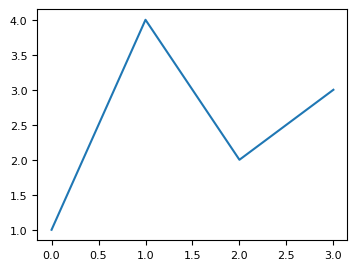

In [2]:
# import matplotlib library
import matplotlib.pyplot as plt

# Plot list of integers
yvalues = [1, 4, 2, 3]
plt.plot(yvalues)

We didn't even have to specify the corresponding $x$-values,
as MPL automatically assumes them to be [0, 1, 2, ...].
Usually, we want to plot for a given set of $x$-values like this:

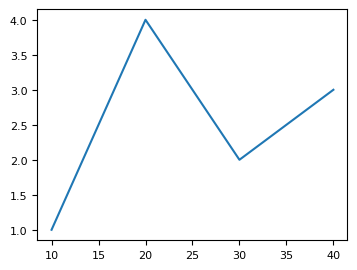

In [3]:
# explicitly specify x-values
xvalues = [10, 20, 30, 40]
plt.plot(xvalues, yvalues)

Similar to Matlab, we can also specify multiple lines to be plotted
in a single graph:

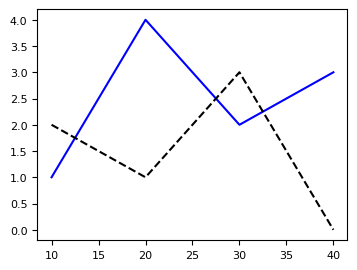

In [4]:
yvalues2 = [2.0, 1.0, 3.0, 0.0]
plt.plot(xvalues, yvalues, 'b-', xvalues, yvalues2, 'k--')

The characters following each set of $y$-values are style specifications
that are very similar to the ones used in Matlab.
More specifically, the letters are short-hand notations for colours
(see [here](https://matplotlib.org/stable/tutorials/colors/colors.html) for details):

- `b`: blue
- `g`: green
- `r`: red
- `c`: cyan
- `m`: magenta
- `y`: yellow
- `k`: black
- `w`: white

The remaining characters set the line styles. Valid values are

-   `-` solid line
-   `--` dashed line
-   `-.` dash-dotted line
-   `:` dotted line

Additionally, we can append marker symbols to the style specification.
The most frequently used ones are

- `o`: circle
- `s`: square
- `*`: star
- `x`: x
- `d`: (thin) diamond

The whole list of supported symbols can be found [here](https://matplotlib.org/stable/api/markers_api.html).

Instead of passing multiple values to be plotted at once, 
we can also repeatedly call `plot()` to add additional elements to a graph. 
This is more flexible since we can pass additional arguments which are 
specific to one particular set of data, such as labels displayed in legends

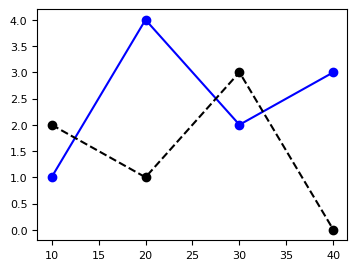

In [5]:
# Plot two lines by calling plot() twice
plt.plot(xvalues, yvalues, 'b-o')
plt.plot(xvalues, yvalues2, 'k--o')

Individual calls to `plot()` also allow us to specify styles
more explicitly using keyword arguments:

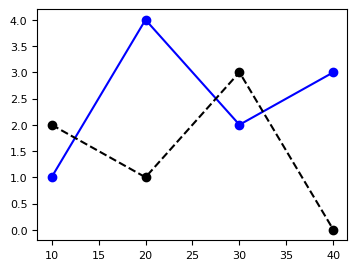

In [6]:
# pass plot styles as explicit keyword arguments
plt.plot(xvalues, yvalues, color='blue', linestyle='-', marker='o')
plt.plot(xvalues, yvalues2, color='black', linestyle='--', marker='o')

Note that in the example above, we use named colours such as `red` or `blue`. Alternatively, we can use RGB color codes of the form `#dddddd` where `d` are hexadecimal digits.

Matplotlib accepts abbreviations for the most common 
style definitions using the following shortcuts:

- `c` or `color`
- `ls` or `linestyle`
- `lw` or `linewidth`

We can write thus rewrite the above code as follows:

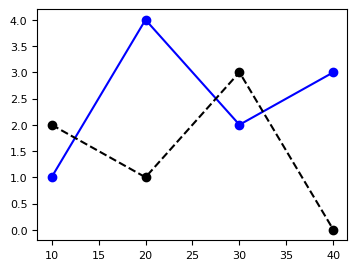

In [7]:
# abbreviate plot style keywords
plt.plot(xvalues, yvalues, c='blue', ls='-', marker='o')
plt.plot(xvalues, yvalues2, c='black', ls='--', marker='o')

There is a third way to plot multiple lines in the same plot by 
passing the $y$-values as a 2-dimensional array. We explore this
alternative in the exercises.

## Scatter plots

We use the `scatter()` function to create scatter plots in a similar fashion to line plots:

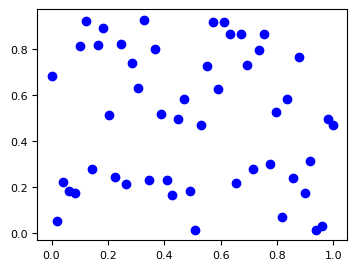

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Create 50 uniformly-spaced values on unit interval
xvalues = np.linspace(0.0, 1.0, 50)
# Draw random numbers (we learn how to do this in a later unit)
yvalues = np.random.default_rng(123).random(50)

plt.scatter(xvalues, yvalues, color='blue')

We could in principle create scatter plots using `plot()` by turning
off the connecting lines. However, `scatter()` allows
us to specify the color and marker size as collections, so
we can vary these for every point. `plot()`, on the other hand, imposes
the same style on all points plotted in that particular function call.

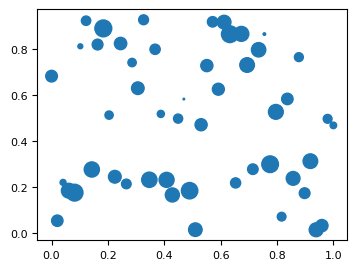

In [9]:
# Draw random marker sizes
size = np.random.default_rng(456).random(len(yvalues)) * 150.0

# plot with point-specific marker sizes
plt.scatter(xvalues, yvalues, s=size)

***
## Plotting categorical data

Instead of numerical values on the x-axis, we can also plot categorical
variables by passing them directly to the plotting function.

For example, assume we have three categories and each has an associated
numerical value:

Text(0.5, 1.0, 'Population')

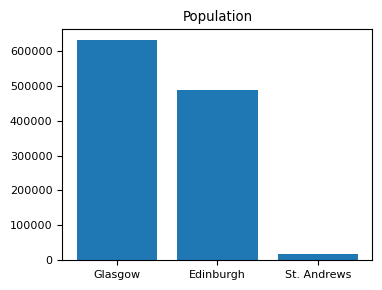

In [10]:
import matplotlib.pyplot as plt

cities = ['Glasgow', 'Edinburgh', 'St. Andrews']
population = [630000, 488000,  16800]
plt.bar(cities, population)
plt.title('Population')

We use `barh()` to create *horizontal* bars:

Text(0.5, 0, 'Population')

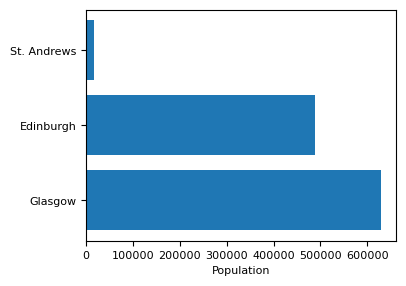

In [11]:
plt.barh(cities, population)
plt.xlabel('Population')

***
## Adding labels and annotations

Matplotlib has numerous functions to add labels and annotations:

-   Use `title()` and `suptitle()` to add titles to your graphs.
    The latter adds a title for the whole figure, which might
    span multiple plots (axes).
-   We can add axis labels by calling `xlabel()` and `ylabel()`.
-   To add a legend, call `legend()`, which in its most simple
    form takes a list of labels which are in the same order
    as the plotted data.
    [[documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)]
-   Use `text()` to add additional text at arbitrary locations.
    [[documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html)]
-   Use `annotate()` to display text next to some data point;
    it's easier to position correctly than `text()` and you
    can add arrows!
    [[documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html)]

Text(20, -20, 'Point 2')

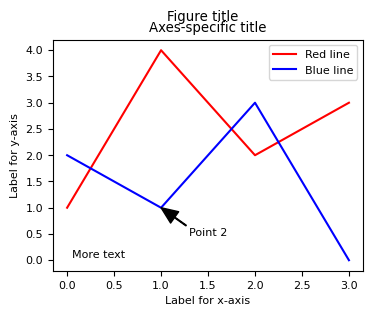

In [12]:
import matplotlib.pyplot as plt

xvalues = [0, 1, 2, 3]
yvalues = [1, 4, 2, 3]
yvalues2 = [2.0, 1.0, 3.0, 0.0]

plt.plot(xvalues, yvalues, 'r', xvalues, yvalues2, 'b')
plt.suptitle('Figure title')
plt.title('Axes-specific title')
plt.xlabel('Label for x-axis')
plt.ylabel('Label for y-axis')
plt.legend(['Red line', 'Blue line'])

# Adds text at data coordinates (0.05, 0.05)
plt.text(0.05, 0.05, 'More text')

# Annotate second point
plt.annotate('Point 2', (xvalues[1], yvalues2[1]), (20, -20),
             textcoords='offset points',
             arrowprops={
                'facecolor': 'black', 'width': 0.5, 'headwidth': 10.0
                })

***
## Plot limits, ticks and tick labels

We adjust the plot limits, ticks and tick labels as follows:

-   Plotting limits are set using the `xlim()` and `ylim()` functions.
    Each accepts a tuple `(min,max)` to set the desired range.
-   Ticks and tick labels can be set by calling `xticks()` or `yticks()`.


(-1.1, 1.1)

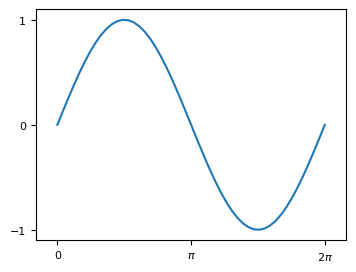

In [13]:
import matplotlib.pyplot as plt
import numpy as np

xvalues = np.linspace(0.0, 2*np.pi, 50)
plt.plot(xvalues, np.sin(xvalues))

# Set major ticks for x and y axes, and xtick labels.
# We can use LaTeX code in labels!
plt.xticks([0.0, np.pi, 2*np.pi], ['0', r'$\pi$', r'$2\pi$'])
plt.yticks([-1.0, 0.0, 1.0])

# Adjust plot limits in x and y direction
plt.xlim((-0.5, 2*np.pi + 0.5))
plt.ylim((-1.1, 1.1))


***
## Object-oriented interface

So far, we have only used the so-called `pyplot` interface which involves
calling *global* plotting functions from `matplotlib.pyplot`.
This interface is intended to be similar to Matlab, but is also somewhat
limited and less clean.

We can instead use the object-oriented interface
(called this way because we call methods of the 
[`Figure`](https://matplotlib.org/stable/api/figure_api.html) and 
[`Axes`](https://matplotlib.org/stable/api/axes_api.html) objects).
While there is not much point in using the object-oriented interface
in a Jupyter notebook when we want to create a single graph, it should be the preferred method when
writing re-usable code in Python files.

To use the object-oriented interface, we need to get figure and
axes objects. The easiest way to accomplish this is using
the `subplots()` function, like this:
```
fig, ax = plt.subplots()
```
As an example, we recreate the graph from the section on
labels and annotations using the object-oriented interface:

Text(20, -20, 'Point 2')

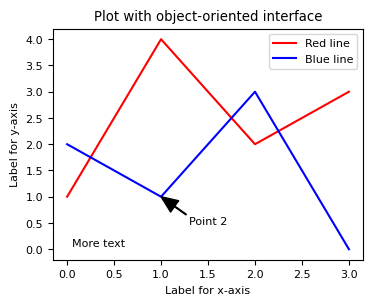

In [14]:
import matplotlib.pyplot as plt

xvalues = [0, 1, 2, 3]
yvalues = [1, 4, 2, 3]
yvalues2 = [2.0, 1.0, 3.0, 0.0]

fig, ax = plt.subplots()
ax.plot(xvalues, yvalues, color='red', label='Red line')
ax.plot(xvalues, yvalues2, color='blue', label='Blue line')
ax.set_xlabel('Label for x-axis')
ax.set_ylabel('Label for y-axis')
ax.legend()
ax.set_title('Plot with object-oriented interface')
ax.text(0.05, 0.05, 'More text')

# Annotate second point
plt.annotate('Point 2', (xvalues[1], yvalues2[1]), (20, -20),
             textcoords='offset points',
             arrowprops={'facecolor': 'black', 'width': 0.5,
                         'headwidth': 10.0})


The code is quite similar, except that attributes are set using
the `set_xxx()` methods of the `ax` object. For example,
instead of calling `xlim()`, we use `ax.set_xlim()`.

***
## Working with multiple plots (axes)

The object-oriented interface becomes particularly useful
if we want to create multiple axes (or figures). This can also be achieved
using with the `pyplot` programming model but is somewhat more obscure.

For example, to create a row with two plots, we use:

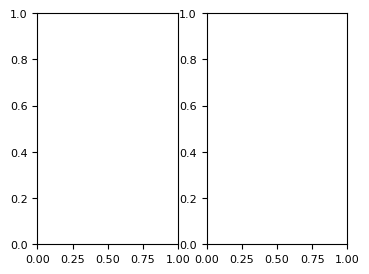

In [15]:
import matplotlib.pyplot as plt

# Create one figure with 2 axes objects, arranged as two columns in a single row
fig, ax = plt.subplots(1, 2)

With multiple axes objects in a single figure (as in the above example), the `ax` returned
by `subplots()` is a NumPy array. Its elements
map to the individual panels within the figure in a natural way.

We can visualise this mapping for the case of a single row
and two columns as follows:

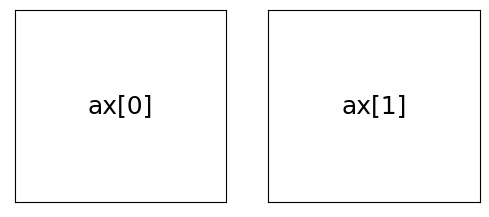

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(6,2.5))
for i, axes in enumerate(ax):
    # Turn off ticks of both axes
    axes.set_xticks(())
    axes.set_yticks(())
    # Label axes object
    text = f'ax[{i}]'
    axes.text(0.5, 0.5, text, transform=axes.transAxes, va='center', ha='center', fontsize=18)

Don't worry about the details of how this graph is generated, the only take-away here is
how axes objects are mapped to the panels in the figure.

If we request panels in two dimensions, the `ax` object will be a 2-dimensional
array, and the mapping of axes objects to panels will look like this instead:

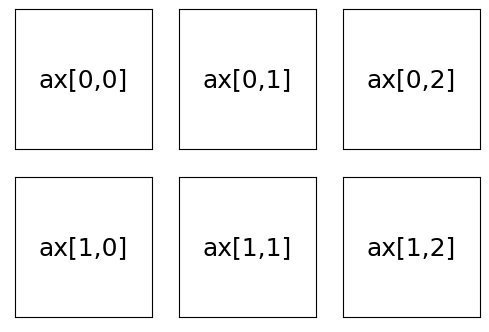

In [17]:
# Request figure with 2 rows, 3 columns
fig, ax = plt.subplots(2, 3, figsize=(6,4))
for i, axrow in enumerate(ax):
    for j, axes in enumerate(axrow):
        # Turn off ticks of both axes
        axes.set_xticks(())
        axes.set_yticks(())
        # Label axes object
        text = f'ax[{i},{j}]'
        axes.text(0.5, 0.5, text, transform=axes.transAxes, va='center', ha='center', fontsize=18)

Returning to our initial example, we can use the elements of `ax` to plot into individual panels:

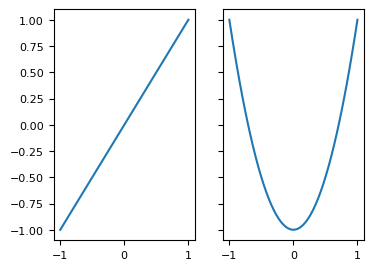

In [18]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
xvalues = np.linspace(-1.0, 1.0, 50)

# Plot into first column
ax[0].plot(xvalues, xvalues)

# Plot into second column
ax[1].plot(xvalues, 2*xvalues**2.0 - 1)

The next example illustrates how to create a figure with four panels:

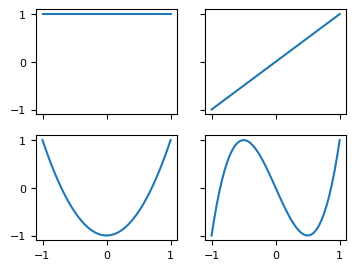

In [19]:
# create figure with 2 rows, 2 columns
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)

xvalues = np.linspace(-1.0, 1.0, 50)

# Plot the first four Chebyshev polynomials on the interval [-1,1]
for i in range(2):
    for j in range(2):
        yvalues = np.cos((j + i*2) * np.arccos(xvalues))
        ax[i,j].plot(xvalues, yvalues)

Note the use of `sharex=True` and `sharey=True`. This tells
matplotlib that all axes share the same plot limits, so the
tick labels can be omitted in the figure's interior to
preserve space.

With multiple axes per figure, we can also see the difference between
the labels generated by `set_title()` and `suptitle()`.

To illustrate, we re-use the previous example with two panels 
in a single row:

Text(0.5, 1.02, 'Figure title')

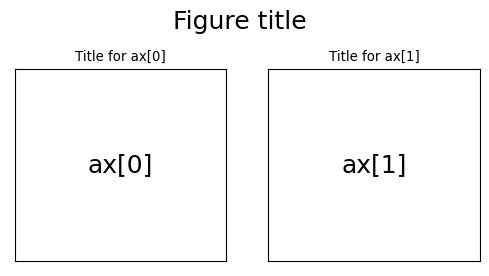

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(6,2.5))
for i, axes in enumerate(ax):
    axes.set_xticks(())
    axes.set_yticks(())
    text = f'ax[{i}]'
    axes.text(0.5, 0.5, text, transform=axes.transAxes, va='center', ha='center', fontsize=18)
    
    # Add axes-specific title
    axes.set_title(f'Title for ax[{i}]')
    
# set overall figure title:
# this is an attribute of the Figure object!
fig.suptitle('Figure title', fontsize=18, va='bottom', y=1.02)

***
## Exercises

### Exercise 1: Trigonometric functions

Plot the functions $\sin(x)$ and $\cos(x)$ on the interval
$[-\pi, \pi]$, each in a separate graph.
Include a legend for each plot, and add pretty tick
labels at $[-\pi, 0, \pi]$ which use the $\LaTeX$ symbol for $\pi$.
Add an overall title "Trigonometric functions".

*Hint:* NumPy defines the functions `np.sin()` and `np.cos()` as well
as the value `np.pi`.

### Exercise 2: Logarithmic scaling

In economics and finance, we often plot using the $\log_{10}$ scale
if the plotted data are of very different orders of magnitude.

Create a figure with two sub-plots, each plotting the
function $f(x) = 10^x$ on a uniformly-spaced interval
$[-5,5]$ with 100 points.
Use the (default) linear scale in the first plot, but
apply the $\log_{10}$ scale in the second.

*Hint:* You can set the axis scale to log by calling
`yscale('log')`, or `set_yscale('log')` when using
the object-oriented interface.

### Exercise 3: Multiple lines in single plot

In this exercise, we explore yet another alternative to
plot multiple lines in a single graph.

The `plot()` function accepts $y$-values specified as a matrix
in which each column corresponds to a different line.
The number of rows must correspond to the 
length of the vector of $x$-values, which are assumed to be identical
for all columns of $y$-values.

1.  Consider the following family of polynomials in $x$ parametrised by $a$:
    $$
    p(x;a) = a(x-0.5)^2
    $$
    
    Assume there are 5 such polynomials with $a$'s given by the values
    ```
    a = np.linspace(0.4, 4.0, 5)
    ```
    
    -   Create a common set of $x$-values using an equidistant grid
        of 50 points on the interval $[0,1]$.
    -   Construct the matrix of $y$-values with shape `(50,5)` and
        plot all polynomials with a single call to
        `plot()`.
    -   Add a legend that maps a value of $a$ to the corresponding
        line in the plot.
    
2.  Plot each polynomial separately using a loop.
    Use the `i`-th elements of the following arrays as plot
    styles for the `i`-th polynomial:
    
    ```
    colors = ['red', 'blue', 'black', 'green', 'purple']
    linewidths = [1.0, 1.5, 2.0, 1.5, 1.0]
    linestyles = ['-', '--', '-.', ':', '-']
    ```
    
    Add a legend that maps a value of $a$ to the corresponding line in the plot.
    

***
## Solutions

### Solution for exercise 1

Text(0.5, 0.98, 'Trigonometric functions')

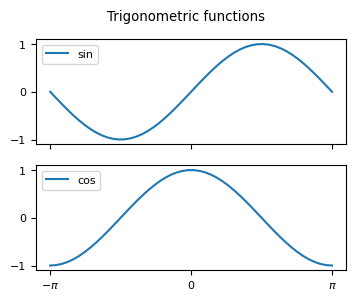

In [21]:
import matplotlib.pyplot as plt
import numpy as np

xvalues = np.linspace(-np.pi, np.pi, 50)
# Create figure with two rows, one column
fig, ax = plt.subplots(2, 1, sharey=True, sharex=True)

xticks = [-np.pi, 0.0, np.pi]
# Tick labels use LaTeX notation for pi, which is \pi and has to be 
# surrounded by $$.
xticklabels = [r'$-\pi$', '0', r'$\pi$']
yticks = [-1.0, 0.0, 1.0]

# Create sin() plot using first axes object
ax[0].plot(xvalues, np.sin(xvalues), label='sin')
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xticklabels)
ax[0].set_yticks(yticks)
ax[0].legend(loc='upper left')

# Create cos() plot using second axes object
ax[1].plot(xvalues, np.cos(xvalues), label='cos')
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xticklabels)
ax[1].set_yticks(yticks)
ax[1].legend(loc='upper left')

# Add overall figure title (this is not axes-specific)
fig.suptitle('Trigonometric functions')

### Solution for exercise 2

Text(0.5, 1.0, 'Log scale')

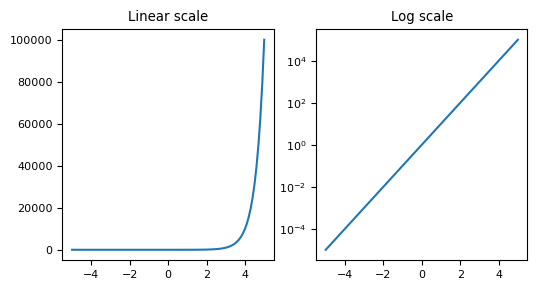

In [26]:
import matplotlib.pyplot as plt
import numpy as np

xvalues = np.linspace(-5.0, 5.0, 100)
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(6,3))
ax[0].plot(xvalues, 10.0**xvalues)
ax[0].set_title('Linear scale')

ax[1].plot(xvalues, 10.0**xvalues)
# Set y-axis to log scale (assumes base-10 log)
ax[1].set_yscale('log')
ax[1].set_title('Log scale')

### Solution for exercise 3

First we plot all polynomials in a single call to `plot()`.
For this to work, we need to pass the $y$-values as a 
matrix where each column corresponds to a different line.

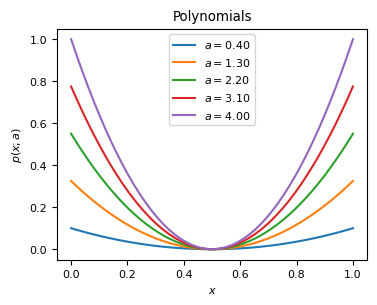

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Create common x-values
xvalues = np.linspace(0.0, 1.0, 50)

# Create parameters
a = np.linspace(0.4, 4.0, 5)

# Evaluate polynomials on common x-values:
# each column corresponds to a different parametrisation
poly = np.zeros((len(xvalues), len(a)))
# Iterate over parameters and create each set of corresponding y-values
for i, ai in enumerate(a):
    poly[:,i] = ai * (xvalues - 0.5)**2.0

plt.plot(xvalues, poly)
plt.xlabel('$x$')
plt.ylabel(r'$p(x;a)$')
plt.title('Polynomials')

# Create legend:
# we need to pass labels in same order as the corresponding columns
labels = [r'$a={:.2f}$'.format(ai) for ai in a]
plt.legend(labels)


We now call `plot()` for each polynomial separately.
This allows us to specify detailed style settings
for each line.

Text(0.5, 1.0, 'Polynomials')

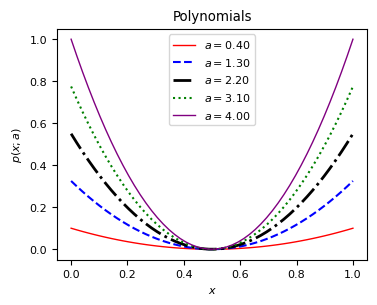

In [24]:
fig, ax = plt.subplots(1,1)

# Different styles for each parametrisation
colors = ['red', 'blue', 'black', 'green', 'purple']
linewidths = [1.0, 1.5, 2.0, 1.5, 1.0]
linestyles = ['-', '--', '-.', ':', '-']

n = poly.shape[1]
for i in range(n):
    label = r'$a={:.2f}$'.format(a[i])
    ax.plot(xvalues, poly[:,i], c=colors[i], lw=linewidths[i], 
            ls=linestyles[i], label=label)
    
# calling legend without arguments will use the 
# text provided as label argument to each plot()
ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel(r'$p(x;a)$')
ax.set_title('Polynomials')

# Advanced NumPy

We already encountered NumPy arrays and their basic usage
throughout this course.
In this unit, we will take a more in-depth look at NumPy.

## Why NumPy arrays?

Why don't we just stick with built-in types such as Python
lists to store and process data? It turns out that while the built-in objects
are quite flexible, this flexibility comes at the cost
of decreased performance:

-   `list` objects can store arbitrary data types, and
    the data type of any item can change:

    ```
    items = ['foo']
    items[0] = 1.0      # item was a string, now it's a float!
    ```
-   There is no guarantee where in memory the data will be stored.
    In fact, two consecutive items could be very "far"
    from each other in memory, which imposes a performance
    penalty.
-   Even primitive data types such as `int` and `float` are
    not "raw" data, but full-fledged objects.
    That, again, is bad for performance.

On the other hand, the approach taken by NumPy is to
store and process data in a way very similar to low-level
languages such as C and Fortran.
This means that

-   arrays contain a *homogenous* data type. *All* elements are either
    64-bit integers (`np.int64`), 64-bit floating-point numbers
    (`np.float64`), or some other of the many data types
    supported by NumPy.

    It is technically possible to get around this by specifying
    an array's data type (`dtype`) to be `object`, which is the most
    generic Python data type. However, we would never want to
    do this for numerical computations.
-   NumPy arrays are usually *contiguous* in memory. This means
    that adjacent array elements are actually guaranteed to be
    stored next to each other, which allows for much more efficient
    computations.
-   NumPy arrays support numerous operations used in
    scientific computing. For example, with a NumPy array we can write

    ```
    x = np.array([1, 2, 3])
    y = x + 1       # We would expect this to work
    ```

    With lists, however, we cannot:

    ```
    x = [1, 2, 3]
    y = x + 1       # Does not work!
    ```
    Lists don't implement an addition operator that accepts
    integer arguments, so this code triggers an error.

You can see the performance uplift provided by NumPy arrays in this simple
example:

In [1]:
# Create list 0, 1, 2, ..., 999
lst = list(range(1000))

# Compute squares, time how long it takes
%timeit [i**2 for i in lst]

167 µs ± 783 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [2]:
# Repeat using NumPy arrays
import numpy as np
arr = np.arange(1000)

%timeit arr**2

975 ns ± 12.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


-   On my machine, squaring 1000 elements of a `list` takes
    approximately 200 times longer than the computation
    using NumPy arrays!
-   Also, as mentioned above, NumPy supports squaring an array directly, while
    we have to manually loop through the `list` and square each element
    individually.

*Note:* `%timeit` is a so-called magic command that only
works in notebooks, but not in regular Python files.
[[See documentation](https://ipython.readthedocs.io/en/stable/interactive/magics.html)]

***

## Creating arrays

We have already encountered some of the most frequently
used array creation routines:

-   `np.array()` creates an array from a given argument, which can be
    -   a scalar;
    -   a collection such as a list or tuple;
    -   some other iterable object, e.g. something created by `range()`.
-   `np.empty()` allocates memory for a given array shape, but does not
    overwrite it with initial values.
-   `np.zeros()` creates an array of a given shape and initializes it
    to zeros.
-   `np.ones()` creates an array of a given shape and initializes it
    to ones.
-   `np.arange(start,stop,step)` creates an array with evenly spaced
    elements over the range $[start,stop)$.
    -   `start` and `step` can be omitted and then default to `start=0` and `step=1`.
    -   Note that the number `stop` is never included in
        the resulting array!
-   `np.linspace(start,stop,num)` returns a vector of `num` elements
    which are evenly spaced over the interval $[start,stop]$.
-   `np.identity(n)` returns the identity matrix of a size $n \times n$.
-   `np.eye()` is a more flexible variant of `identity()` that can,
    for example, also create non-squared matrices.

There are many more array creation functions for more exotic use-cases,
see the NumPy  [documentation](https://numpy.org/doc/stable/reference/routines.array-creation.html)
for details.

*Examples:*

In [3]:
import numpy as np

# Create array from list
lst = [1, 2, 3]
np.array(lst)

array([1, 2, 3])

In [4]:
# Create array from tuple
tpl = 1.0, 2.0, 3.0
np.array(tpl)

array([1., 2., 3.])

In [5]:
# arange: end point is not included!
np.arange(5)

array([0, 1, 2, 3, 4])

In [6]:
# arange: increments can be negative too!
np.arange(5, 1, -1)

array([5, 4, 3, 2])

In [7]:
# arange also works on floats
np.arange(1.0, 3.0, 0.5678)

array([1.    , 1.5678, 2.1356, 2.7034])

In [8]:
# linspace DOES include the end point
np.linspace(0.0, 1.0, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

***
## Array shape

Many of the array creation routines take the desired shape of the array
as their first argument.
Array shapes are usually specified as tuples:

-   A vector with 5 elements has shape `(5, )`.

    Note the comma `,`: we need to specify a tuple with a single
    element using this comma, since `(5)` is just the integer 5,
    not a tuple.

    It is worth pointing out that this is not the same as a
    2-dimensional array with shape `(1, 5)` or `(5, 1)`, even
    though they have the same number of elements.

-   A $2\times2$ matrix has shape `(2, 2)`.
-   A higher-dimensional array has shape `(k, l, m, n, ...)`.
-   A *scalar* NumPy array has shape `()`, an empty tuple.

    While "scalar array" sounds like an oxymoron, it does exist.

We can query the shape of an array using the `shape` attribute,
and the number of dimensions is stored in the `ndim` attribute.

*Examples:*

In [9]:
import numpy as np

# Scalar array
x = np.array(0.0)
print(f'Scalar array with shape={x.shape} and ndim={x.ndim}')

Scalar array with shape=() and ndim=0


Note that a scalar NumPy array is not the same as a Python scalar.
The built-in type `float` has neither a `shape`, nor an `ndim`,
nor any other of the NumPy array attributes.

In [10]:
scalar = 1.0
scalar.shape

AttributeError: 'float' object has no attribute 'shape'

We create an empty array as follows:

In [11]:
# 1-dimensional array (vector), values not initialised
x = np.empty((5,))
x       # could contain arbitrary garbage

array([4.66753926e-310, 0.00000000e+000, 4.66753886e-310, 4.66753883e-310,
       2.37151510e-322])

An array created with `empty()` will contain arbitrary garbage
since the memory block assigned to the array is not initialised.
The result will most likely differ on each invocation and across
computers.

Most functions accept an integer value instead of a `tuple`
when creating 1-dimensional arrays, which is interpreted
as the number of elements:

In [12]:
# 1-dimensional array
x = np.empty(5)         # equivalent to np.empty((5,))

Higher-dimensional arrays are creating by passing in tuples
with more than one element:

In [13]:
np.ones((1, 2, 3))      # 3d-array

array([[[1., 1., 1.],
        [1., 1., 1.]]])

Recall from unit 2 that we can use the `reshape()` method
to convert arrays to a different shape:

-   The resulting number of elements must remain unchanged!
-   *One* dimension can be specified using `-1`, which
    will prompt NumPy to compute the implied dimension size
    itself.

In [14]:
x = np.zeros((2, 1, 3))
x = x.reshape((3, -1))      # Infer number of columns
x

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

We can reshape any array to a 1-dimensional vector using any of
the following expressions:

In [15]:
x.reshape((-1, ))          # pass shape as tuple
x.reshape(-1)              # pass shape as integer
x.flatten()

array([0., 0., 0., 0., 0., 0.])

This even works on scalar (0-dimensional) arrays:

In [16]:
np.array(0.0).flatten()

array([0.])

***
## Advanced indexing

We previously discussed single element indexing and slicing,
which works the same way for both Python `list` and `tuple` objects
as well as NumPy arrays.

NumPy additionally implements more sophisticated indexing mechanisms
which we cover now.

-   You might also want to consult the
    NumPy indexing [tutorial](https://numpy.org/doc/stable/user/basics.indexing.html)
    and the detailed indexing [reference](https://numpy.org/doc/stable/reference/arrays.indexing.html).

### Boolean or "mask" indexing
We can pass logical arrays as indices:

-   Logical (or boolean) arrays consist of elements that
    can only take on values `True` and `False`
-   We usually don't create logical arrays manually, but apply
    an operation that results in `True`/`False` values,
    such as a comparison.
-   The boolean index array usually has the *same*
    shape as the indexed array.

*Examples:*

In [17]:
import numpy as np

vec = np.arange(5)
mask = (vec > 1)        # apply comparison to create boolean array
mask

array([False, False,  True,  True,  True])

In [18]:
vec[mask]               # use mask to retrieve only elements greater than 1

array([2, 3, 4])

We can even apply boolean indexing to multi-dimensional
arrays. The result will be flatted to a 1-dimensional array,
though.

In [19]:
mat = np.arange(6).reshape((2,3))
mat

array([[0, 1, 2],
       [3, 4, 5]])

In [20]:
mask = (mat > 1)        # create boolean array
mask

array([[False, False,  True],
       [ True,  True,  True]])

In [21]:
mat[mask]            # collapses result to 1-d array

array([2, 3, 4, 5])

Note that logical indexing does *not* work with `tuple` and `list`

In [22]:
tpl = (1, 2, 3)
mask = (True, False, True)
tpl[mask]               # error

TypeError: tuple indices must be integers or slices, not tuple

### Integer index arrays

We can also use index arrays of *integer* type to select
specific elements on each axis. These are straightforward to use
for 1-dimensional arrays, but can get fairly complex with multiple
dimensions.

In [23]:
import numpy as np

data = np.arange(10)
index = [1, 2, 9]       # select second, third and 10th element
data[index]

array([1, 2, 9])

As you see, the index array does not have to be a NumPy array,
but can also be a list (not a tuple, though!).

In general, if we are using an index array to select elements
along an axis of length $n$, then

-   the index must only contain integers between $0$ and $n-1$, or negative
    integers from $-n$ to $-1$ (which, as usual, count from
    the end of the axis).
-   the index can be of arbitrary length. We can therefore select the
    same element multiple times.

In [24]:
data = np.arange(5, 10)     # array with 5 elements, [5,...,9]
data

array([5, 6, 7, 8, 9])

In [25]:
index = [0, 1, 1, 2, 2, 3, 3, 4, 4]         # select elements multiple times
data[index]

array([5, 6, 6, 7, 7, 8, 8, 9, 9])

The same restrictions apply when indexing multi-dimensional arrays.
Moreover,

-   if more than one axis is indexed using index arrays,
    the index arrays have to be of equal length.
-   we can combine integer array indexing on one axis with
    other types of indices on the remaining axes.

*Examples:*

In [26]:
data = np.arange(12).reshape((3, 4))
data

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [27]:
index1 = [0, 2]     # row indices
index2 = [1, 3]     # column indices
data[index1, index2]

array([ 1, 11])

The code above selects two elements, the first at position
`(0,1)`, the second at position `(2,3)`.

We can combine index arrays on one axis with another indexing method
on a different axis:

In [28]:
data[index1, 2]     # return elements in 3rd column from rows given
                    # in index1

array([ 2, 10])

Using different indexing methods, in particular index arrays,
on higher-dimensional data can quickly become a mess, and you should
be extra careful to see if the results make sense.

***
## Numerical operations

### Element-wise operations
Element-wise operations are performed on each element
individually and leave the resulting array's shape unchanged.

There are three types of such operations:

1.  One operand is an array and one is a scalar.
2.  Both operands are arrays, either of identical shape,
    or broadcastable to an identical shape (we discuss
    broadcasting below)
3.  A function is applied to each array element.

*Case 1:* Array-scalar operations. These intuitively
behave as you would expect:

In [29]:
import numpy as np

x = np.arange(10)
scalar = 1

# The resulting array y has the same shape as x:
y = x + scalar      # addition
y = x - scalar      # subtraction
y = x * scalar      # multiplication
y = x / scalar      # division
y = x // scalar     # division with integer truncation
y = x % scalar      # modulo operator
y = x ** scalar     # power function
y = x == scalar     # comparison: also >, >=, <=, <

Note that unlike in Matlab, the "standard" operators work
element-wise, so `x * y` is *not* matrix multiplication!

*Case 2:* Both operands are arrays of equal shape:

In [30]:
x = np.arange(10)
y = np.arange(10, 20)       # has same shape as x

# Resulting array z has the same shape as x and y:
z = x + y           # addition
z = x - y           # subtraction
z = x * y           # multiplication
z = x / y           # division
z = x // y          # division with integer truncation
z = x % y           # modulo operator
z = x ** y          # power function
z = x == y          # comparison: also >, >=, <=, <

*Case 3:* Applying element-wise functions.
This case covers numerous functions defined in NumPy, such
as

-   `np.sqrt`: square root
-   `np.exp`, `np.log`, `np.log10`: exponential and logarithmic functions
-   `np.sin`, `np.cos`, etc.: trigonometric functions

You can find a complete list of mathematical functions in
the NumPy [documentation](https://numpy.org/doc/stable/reference/routines.math.html)
(not all functions listed there operate element-wise, though!).

In [31]:
# element-wise functions
x = np.arange(1, 11)
y = np.exp(x)       # apply exponential function
y = np.log(x)       # apply natural logarithm

### Matrix operations

**Transpose**

You can transpose a matrix using the `T` attribute:

In [32]:
mat = np.arange(6).reshape((2,3))
mat

array([[0, 1, 2],
       [3, 4, 5]])

In [33]:
mat.T

array([[0, 3],
       [1, 4],
       [2, 5]])

For higher-dimensional arrays, the `np.transpose()` function
can be used to permute the axes of an array. For two-dimensional
arrays, `np.transpose(mat)` and `mat.T` are equivalent.

**Matrix multiplication**

Matrix multiplication is performed using the `np.dot()`
function ("dot product"). The operands need not be matrices
but can be vectors as well, or even high-dimensional arrays
(the result is then not entirely obvious and one should check
the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)).

Every newer version of Python and NumPy additionally interprets `@`
as the matrix multiplication operator.

In [34]:
import numpy as np

mat = np.arange(9).reshape((3, 3))      # 3x3 matrix
vec = np.arange(3)                      # vector of length 3

# matrix-matrix multiplication
np.dot(mat, mat)    # or: mat @ mat

array([[ 15,  18,  21],
       [ 42,  54,  66],
       [ 69,  90, 111]])

In [35]:
# vector dot product (returns a scalar)
np.dot(vec, vec)    # or: vec @ vec


5

In [36]:
# matrix-vector product (returns vector)
np.dot(mat, vec)    # or: mat @ vec

array([ 5, 14, 23])

We must of course make sure that matrices and vector have
conformable dimensions!

In [37]:
mat = np.arange(6).reshape((2, 3))
mat

array([[0, 1, 2],
       [3, 4, 5]])

In [38]:
np.dot(mat, mat)        # raises error, cannot multiply 2x3 matrix with 
                        # 2x3 matrix

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

In [39]:
np.dot(mat, mat.T)      # transpose second operand, then it works!

array([[ 5, 14],
       [14, 50]])

### Reductions

Reductions are operations that reduce the dimensionality of
the data. For example, computing the mean of an array reduces
a collection of data points to a single scalar, its mean.

Basic reduction operations include:

-   `np.sum()`: sum of array elements
-   `np.prod()`: product of array elements
-   `np.amin()`, `np.amax()`: minimum and maximum element
-   `np.argmin()`, `np.argmax()`: location of minimum and maximum element
-   `np.mean()`, `np.average()`: mean of array elements
-   `np.median()`: median of array elements
-   `np.std()`, `np.var()`: standard deviation and variance of array elements
-   `np.percentile()`: percentiles of array elements

Most if not all reductions accept an `axis` argument which
restricts the operation to a specific axis.

-   If an axis is specified, the resulting array will have one dimension
    less than the input.
-   If no axis is specified, the operation is applied to the
    whole (flattened) array.

*Examples:*

In [40]:
import numpy as np

# 1-dimensional input data
data = np.linspace(0.0, 1.0, 11)

# Compute mean and std. of input data
m = np.mean(data)
s = np.std(data)
print(f'Mean: {m:.2f}, std. dev.: {s:.2f}')

Mean: 0.50, std. dev.: 0.32


In [41]:
# 2-dimensional input data
data = np.linspace(0.0, 1.0, 21).reshape((3, 7))
data

array([[0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ],
       [0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65],
       [0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]])

In [42]:
# Compute mean of each row, ie along the column axis
m = np.mean(data, axis=1)
m           # Result is a vector of 3 elements, one for each row

array([0.15, 0.5 , 0.85])

### Broadcasting

Element-wise operations in most programming languages require
input arrays to have identical shapes.
NumPy relaxes this constraint and allows us to use arrays
with different shapes that can be "broadcast" to identical shapes.

**Simple example**

What do we mean by "broadcasting"? We introduce the concept
using a specific example, and will discuss the technical
details below.

-   Imagine we want to add a $2 \times 3$ matrix to a length-2 vector.
-   This operation does not make sense, unless we interpret the (column) vector
    as a $2 \times 1$ matrix, and replicate it 3 times to obtain a
    $2 \times 3$ matrix. This is exactly what NumPy does.

*Examples:*

In [43]:
import numpy as np

# Create 3x2 matrix
mat = np.arange(6).reshape((2, 3))
mat

array([[0, 1, 2],
       [3, 4, 5]])

In [44]:
# Create 2-element vector
vec = np.arange(2)
vec

array([0, 1])

In [45]:
# Trying to add matrix to vector fails
mat + vec

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

In [46]:
# However, we can explicitly reshape the vector to a 2x1 column vector
colvec = vec.reshape((-1, 1))
colvec

array([[0],
       [1]])

In [47]:
# Now, broadcasting replicates column vector to match matrix columns
mat + colvec

array([[0, 1, 2],
       [4, 5, 6]])

We do not need to `reshape()` data, but can instead use
a feature of NumPy that allows us to increase the number of
dimensions on the spot:

In [48]:
# use vec[:, None] to append an additional dimension to vec
mat + vec[:, None]

array([[0, 1, 2],
       [4, 5, 6]])

Specifying `None` as an array index inserts a new axis of length 1 at
that position (since it's of length 1, this new axis does not change the
overall size of the array!).

For more examples, see the official NumPy [tutorial](https://numpy.org/doc/stable/user/basics.broadcasting.html)
on broadcasting.

**Technical details**

We are now ready to look at the technical details
underlying broadcasting. The NumPy [documentation](https://numpy.org/doc/stable/user/basics.broadcasting.html)
on broadcasting is quite comprehensive, so we will just summarise the points made there.

Broadcasting is applied in four steps:

1.  Determine the largest dimension (`ndim` attribute) among all arrays
    involved in an operation. Any array of smaller dimension
    will have 1's *prepended* to its shape until its dimension
    corresponds to the largest one.

    *Example:* given array `a` with shape `(m,n)` and array
    `b` with shape `(n,)`, the maximum dimension is 2,
    and `b` will be implicitly reshaped to `(1,n)`.
2.  The size of the output array is determined as the
    maximum size of all arrays along each dimension.

    *Example:* Continuing with our example from above, the
    maximum size along dimension 1 is `m`, and the maximum
    size along dimension 2 is `n`, so the output array
    has shape `(m,n)`.
3.  An input array can be used in the computation if
    for every dimension its size either matches the output
    size or is equal to 1. If this is not the case,
    broadcasting cannot be applied and the operation fails.

    *Example:* In the above example, the shape of `a` matches
    the output shape exactly. The implied shape of `b` is
    `(1,n)`, so it matches exactly along the second dimension,
    and is 1 along the first, and thus can be used.
4.  For any input array with size 1 along some dimension,
    the (unique) element in this dimension will be used
    for all calculations along that dimension.

    *Example:* Any element `a[i,j]` will be matched with
    the element `b[0,j]` to the calculate the output
    value at `(i,j)`.

Because additional dimensions are added *at the beginning*
to create the desired output shape, broadcasting will not work
automatically if we want to multiply arrays of
shape `a.shape = (m,n)` and `b.shape = (m,)`.

-   Following the above steps,  `b` will implicitly be
    reshaped to `(1,m)` and the operation will fail at step 3:

In [49]:
m = 3
n = 2
a = np.arange(m*n).reshape((m, n))      # matrix of shape (m,n)
b = np.arange(1, m+1)                   # vector of shape (m,)

a * b           # will not work!

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

We therefore have to explicitly *append* a degenerate axis to
`b` such that both arrays have the same dimension:

In [50]:
b = b[:,None]
a * b

array([[ 0,  1],
       [ 4,  6],
       [12, 15]])

Because `a` has shape `(m,n)` and `b` now has shape
`(m,1)`, `b[:,0]` will be replicated across all columns of
`a` to perform the operation.

It is worthwhile to take some time to master broadcasting as it's
essential to using NumPy efficiently. You might think that
one can simply replicate array operands along some
dimension to get the same effect, which is what we do in languages
that do not support broadcasting.

-   This included Matlab until release R2016b, where
    implicit expansion for some arithmetic and logical
    operations was introduced.

    Prior to that, users had to manually expand input arrays
    using `repmat()`, or use the rather inelegant `bsxfun()`
    function.

    Note that even today, NumPy broadcasting goes beyond
    Matlab's capabilities.

To illustrate the difference between broadcasting and manual replication 
of data, we perform the element-wise multiplication
of a 3-dimensional array with a (1-dimensional) vector:

In [51]:
# Dimensions of 3d array
k = 10
m = 11
n = 12

a = np.arange(k*m*n).reshape((k, m, n))     # create 3d array
b = np.arange(n)                            # create 1d vector

We can manually expand the vector to have the same
shape as the array `a` using `np.tile()` which creates
`k * m` copies of the `n` elements in `b`:

In [52]:
b_exp = np.tile(b, reps=(k, m, 1))
b_exp.shape

(10, 11, 12)

The following code compares the execution time of computing
`a * b` using broadcasting to the case where we first
explicitly expand `b`:

In [53]:
# Multiplication with broadcasting
%timeit a * b

2 µs ± 19.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [54]:
# Multiplication with explicitly expanded operands
%timeit a * np.tile(b, reps=(k, m, 1))

5.57 µs ± 38.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


As you see, not only is the second operation more complex
and difficult to read, it also takes approximately three times
as long to execute! The reason is that `np.tile()`
replicates the data in memory, which is expensive. No copying
is done when using broadcasting.

***

## Vectorisation

Vectorisation is the concept of applying operations to
whole arrays of data instead of every singular element
(note that the term also has other meanings in computer science).
In Python, as well as languages such as Matlab and R, we use
this programming technique to increase performance for two reasons:

1.  Looping over elements is slow.
2.  Calling a function on every single element is also slow.

These performance penalties are less pronounced for compiled
languages such as C or Fortran, so we try to move the looping
to code written in one of these languages. In particular,
since NumPy's core parts are implemented in C, we always
want to do looping "within" NumPy.

For example, consider element-wise addition of two arrays, `a` and `b`:

In [55]:
import numpy as np

# array size
N = 100

# input arrays
a = np.linspace(0.0, 1.0, N)
b = np.linspace(1.0, 2.0, N)

Benchmarking a non-vectorised loop in pure Python
against NumPy's vectorised implementation reveals some
striking differences:

In [56]:
%%timeit
# Compute c = a + b using Python loops
c = np.empty(N)         # allocate output array
for i in range(N):
    c[i] = a[i] + b[i]

22.2 µs ± 43.3 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [57]:
# Compute c = a + b using vectorised addition
%timeit c = a + b

378 ns ± 0.492 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


We see that the vectorised variant is about 100 times faster!
What is going on?

-   NumPy implements a vectorised operator `+` which accepts
    arrays as operands.
-   NumPy performs looping over individual elements in C
    which is compiled to high-performance machine code.

Of course this example is somewhat artificial: you would
not have implemented a loop in Python in the first place,
you probably just assumed that `+` works with array operands.

However, we can easily construct more complex computations
which may not be implemented in NumPy but
which can use vectorised building blocks to speed up computations.

As an example, consider the following function which computes the 
sum of finite of elements of an array, ignoring infinity and NaNs.

In [58]:
# Compute sum of finite elements in x
def finite_sum(x):
    # initialise sum
    s = 0.0
    # loop over array elements
    for xi in x:
        # Check whether a value is finite
        if np.isfinite(xi):
            # Add to running sum
            s += xi
    return s

Next, we create a sample array with a few NaNs and infinite values and to 
test `finite_sum()`. `NaN` stands for "not a number" as is used as a
special value to flag results of invalid operations such as `0/0`:

In [59]:
arr = np.linspace(0.0, 1.0, 100)
arr[::3] = np.inf       # assign infinity to every 3rd element
arr[::5] = np.nan       # assign NaN to every 5th element

Comparing our `finite_sum()` to a vectorised version again shows 
the performance advantage of vectorised code:

In [60]:
%timeit finite_sum(arr)

129 µs ± 1.35 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [61]:
%timeit np.sum(arr[np.isfinite(arr)])

4.47 µs ± 37.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


The vectorised version is approximately 25 times faster, despite the fact that

-   NumPy does not implement this specific function; and
-   the vectorised implementation creates two temporary arrays: 

    -   one when calling `np.isfinite()`; and 
    -   one when indexing `arr` with the boolean array returned by
        `np.isfinite()`. As we discuss below, indexing with boolean arrays 
        always creates a copy!

This illustrates that creating vectorised code by combining several vectorised functions
also yields considerable speed-ups.

As an aside, note that NumPy actually implements `np.nansum()` which drops NaNs,
but it does not discard infinite values.

***

## Copies and views (advanced)

Recall that assignment in Python does *not* create a copy
(unlike in C, Fortran or Matlab):

In [62]:
a = [0, 0, 0]
b = a           # b references the same object as a
b[1] = 1        # modify second element of b (and a!)
a == b          # a and b are still the same

True

NumPy adds another layer to this type of data sharing:
whenever you perform an assignment or indexing operation,
NumPy tries hard *not* to copy the underlying data but instead
creates a so-called view which points to the same block of memory.
It does so for performance reasons (copying is expensive).

We can illustrate this using array slicing:

In [63]:
import numpy as np

x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [64]:
y = x[3:8]          # Create array that points to elements 4-8 of x
y

array([3, 4, 5, 6, 7])

The arrays `x` and `y` are two different Python objects, which we
can verify using the built-in `id()` function:

In [65]:
print(id(x))
print(id(y))

140051774859056
140051342905808


In [66]:
id(x) == id(y)

False

And yet, the NumPy implementation makes sure that they reference
the same block of memory!

We can see this easily by modifying `y`:

In [67]:
y[:] = 0        # overwrite all elements of y with zeros
y

array([0, 0, 0, 0, 0])

In [68]:
x               # elements of x that are also referenced by y
                # are now also zero!

array([0, 1, 2, 0, 0, 0, 0, 0, 8, 9])

This behaviour is even triggered when `y` references
non-adjacent elements in `x`. For example, we can let `y`
be a view onto every *second* element in `x`:

In [69]:
x = np.arange(10)
y = x[::2]      # y now points to every second element of x
y[:] = 0        # overwrite all elements of y with zeros
x               # every second element in x is now zero!

array([0, 1, 0, 3, 0, 5, 0, 7, 0, 9])

As a rule of thumb, NumPy will create a view as opposed to
copying data if

-   An array is created from another array via slicing
    (i.e. indexing using the `start:stop:step` triplet)

Conversely, a *copy* is created whenever

-   An array is created from another array via boolean
    (mask) indexing.
-   An array is created from another array via integer
    array indexing.

Moreover, you can always force NumPy to create a copy by calling
`np.copy()`!

*Examples:*

In [70]:
# Copies are created with boolean indexing
x = np.arange(10)
mask = (x > 4)      # boolean mask
y = x[mask]         # create y using boolean indexing
y[:] = 0
x                   # x is unmodified

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [71]:
# Copies are created with integer array indexing
x = np.arange(10)
index = [3, 4, 5]   # List of indices to include in y
y = x[index]
y[:] = 0
x                   # x is unmodified

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [72]:
# Forced copy with slicing
x = np.arange(10)
y = np.copy(x[3:8]) # force copy with np.copy()
y[:] = 0
x                   # x is unmodified

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

As an alternative to `np.copy()`, we can directly call the `copy()`
method of an array:

In [73]:
y = x[3:8].copy()


***
## NumPy data types (advanced)

### Default data types
We have already touched upon the numerical data types
used by NumPy. If we do not explicitly request a
data type using the `dtype` keyword argument, NumPy
by default behaves as follows:

1.  The default data type for most array creation routines
    which create arrays of a given shape or size, such as
    `np.empty()`, `np.ones()` and `np.zeros()`,
    is a 64-bit floating-point number (`np.float64`).
2.  Array creation routines that accept numerical input
    data will use the data type of this input data
    to determine the array data type.

    Examples of such functions are `np.arange()` and
    `np.array()`.
3.  Arrays that are implicitly created as a result of an
    operation (addition, etc.) are assigned the most suitable
    type to represent the result.

    For example, when adding a floating-point and an
    integer array, the result will be a floating-point array.

*Examples:*

*Case 1:* default data type is `np.float64`:

In [74]:
import numpy as np

x = np.ones(1)      # length-1 vector of ones
x.dtype             # default type: float64

dtype('float64')

*Case 2:* data type depends on input data:

In [75]:
# Argument is an integer
x = np.arange(5)
x.dtype             # data type is np.int64

dtype('int64')

In [76]:
# Argument is a float
x = np.arange(5.0)
x.dtype             # data type is np.float64

dtype('float64')

*Case 3:* data type determined to accommodate result

In [77]:
# Add two integer arrays
arr1 = np.arange(3)
arr2 = np.arange(3, 0, -1)      # creates [3, 2, 1]
result = arr1 + arr2
print(result)
result.dtype                    # data type is np.int64

[3 3 3]


dtype('int64')

In [78]:
# Add integer to floating-point array
arr1 = np.arange(3)
arr2 = np.arange(3.0, 0.0, -1.0)    # creates [3.0, 2.0, 1.0]
result = arr1 + arr2
print(result)
result.dtype                        # data type is np.float64

[3. 3. 3.]


dtype('float64')

Even though the resulting array is `[3.0, 3.0, 3.0]`
and can thus be represented as integers without loss of data,
NumPy only takes into account that one of the operands
is floating-point, and thus the result has to be
of floating-point type!

### Explicit data types

We can almost always explicitly request an array to be
of a particular data type by passing the `dtype` keyword argument.
The most common types are:

- `np.float64`: a 64-bit floating-point number, also called
    *double precision* in other languages.

    This is the most commonly used floating-point data type. It can
    represent numbers with up to 16 decimal digits, and covers
    a range of approximately $\pm 10^{308}$.

    Note that `dtype=float` is a synonym for `dtype=np.float64` on most
    platforms you are likely to encounter, and we'll be using the shorter variant.

- `np.int64`: a 64-bit integer which can represent integer
    values on the interval of (approximately) $\pm10^{19}$.

    Unlike floating-point, the integer representation
    is *exact*, but covers a much smaller range (and, obviously,
    no fractional numbers)

    Note that `dtype=int` is a synonym for `dtype=np.int64` on most platforms
    you are likely to encounter, and we'll be using
    the shorter variant.

- `np.float32`, `np.float16`: single-precision and half-precision
    floating-point numbers. These occupy only 32 and 16 bits
    of memory, respectively.

    They thus trade off storage requirements for a loss of
    precision and range.

- `np.int32`, `np.int16`, `np.int8` represent integers
    using 32, 16 and 8 bits, respectively.

    They require less memory, but can represent only a smaller
    range of integers. For example, `np.int8` can only
    store integer values from -128 to 127.

- NumPy also supports complex numerical types to represent
    imaginary numbers. We will not be using those in this tutorial.

You can find a complete list of NumPy data
types [here](https://numpy.org/doc/stable/user/basics.types.html)
and [here](https://numpy.org/doc/stable/reference/arrays.scalars.html#sized-aliases).

Would we ever want to use anything other than the default
data types, which in most cases are either `np.float64`
and `np.int64`? These, after all, support the largest range
and highest precision. This is true in general, but there are
special cases where other data types need to be used:

1.  *Storage requirements:* if you work with large amounts of
    data, for example arrays with many dimensions, you can run
    out of memory or storage space (when saving results to files).

    In this case, you can store data as `np.float32` instead
    of `np.float64`, which halves the storage requirement.

    Similarly, if you know that your integer data only takes
    on values between -128 and 127, you can store them
    as `np.int8` which consumes only 1/8 of the space
    compared to `np.int64`!

2.  *Performance:* Some tasks simply don't require high
    precision or range. For example, some machine learning
    tasks can be performed using only 8-bit integers,
    and companies like Google have developed dedicated
    processors to considerably speed up workloads using 8-bit integers.

    Even if you are not using any specialised CPUs or GPUs,
    data has to be transferred from memory to the processor
    and this is a major performance bottleneck. The less data needs to
    be transferred, the better!

    In general, this is nothing you need to worry about at this
    point, but might become relevant once you start writing
    complex high-performance code.

*Examples:*

In [79]:
import numpy as np

# Explicitly specify data type
x = np.ones(1, dtype=np.float16)
x       # prints np.float16

array([1.], dtype=float16)

We can use `dtype` to override the data type inferred from
input data:

In [80]:
lst = [1, 2, 3]
x = np.array(lst)       # given list of integers, creates integer array
x.dtype                 # prints np.int64

dtype('int64')

In [81]:
# override inferred data type:
# created floating-point array even if integers were given
x = np.array(lst, dtype=np.float64)
x.dtype                 # prints np.float64

dtype('float64')

In [82]:
# override inferred data type:
# created integer array even if floats were given,
# thus truncating input data!
lst = [1.234, 4.567, 6.789]
x = np.array(lst, dtype=int)
print(x)                # prints [1, 4, 6]
x.dtype                 # prints np.int64


[1 4 6]


dtype('int64')

***

## Array storage order (advanced)
Computer memory is linear, so a multi-dimensional
array is mapped to a one-dimensional block in memory.
This can be done in two ways:

1.  NumPy uses the so-called *row-major order* (also called
    *C order*, because its the same as in C programming language)
2.  This is exactly the opposite of Matlab, which uses
    *column-major order* (also called *F order*, because its the same
    as in the Fortran programming language)

In [83]:
import numpy as np

mat = np.arange(6).reshape((2,3))
mat

array([[0, 1, 2],
       [3, 4, 5]])

In [84]:
# The matrix mat is stored in memory like this
mat.reshape(-1, order='C')

array([0, 1, 2, 3, 4, 5])

In [85]:
# ... and NOT like this
mat.reshape(-1, order='F')      # use order='F' to convert to column-major storage order

array([0, 3, 1, 4, 2, 5])

While this is not particularly important initially,
as an advanced user you should remember that you
usually want to avoid performing operations on non-contiguous blocks of memory.
This can have devastating effects on performance!

In [86]:
# Avoid operations on non-contiguous array sections such as
mat[:, 1]

# Contiguous array sections are fine
mat[1]


array([3, 4, 5])

***
## Exercises

### Exercise 1: Broadcasting

Let `m = 2`, `n = 3` and `k = 4`. Create an array `a` with shape `(m,n)` like this:
```
a = np.arange(m*n).reshape((m,n))
```

Perform the following tasks:

1.  Define the vector `b = np.arange(n) * 10` and use broadcasting to compute `c = a * b`
    such that `c` has shape `(m,n)`.
2.  Define the vector `b = np.arange(m) * 10` and use broadcasting to compute `c = a * b`
    such that `c` has shape `(m,n)`.
3.  Define the 3-dimensional array `b`,

    ```
    b = np.arange(m*n*k).reshape((m,k,n)) * 10
    ```
    
    and use broadcasting to compute `c = a * b` such that `c` has shape `(m,k,n)`.

### Exercise 2: Boolean indexing

Let `m = 8` and `n = 9`. Create an array `a` with shape `(m,n)` as follows:
```
a = np.arange(m*n).reshape((m,n)) % 7
```
The `%` is the modulo operator which returns the remainder of a division of one
number by another (in this case the division by 7). The resulting array `a` will
therefore contain integers between 0 and 6.

1.  Create a boolean array called `mask` which has the same shape as `a` and 
    is `True` whenever an element in `a` is between 1 and 4 (inclusive).
    
    *Hint:* The character `&` works as a logical `and` operator for NumPy arrays.
    Alternatively, you can use the function `np.logical_and()`.
2.  Compute the number of elements in `a` that satisfy this criterion.
3.  Compute the average of these elements.

### Exercise 3: Diagonal matrices

In this exercise, we'll create diagonal matrices using integer array indexing.

1.  Create a square matrix of zeros with shape `(n,n)` for `n = 5` and `dtype = int`
    as its data type:
    ```
    a = np.zeros((n,n), dtype=int)
    ```
    Use integer array
    indexing to modify its diagonal to construct the following matrix, where 
    omitted elements are zero:
    $$
    \begin{bmatrix}
    1 &   &   &   & \\
      & 2 &   &   & \\
      &   & 3 &   & \\
      &   &   & 4 & \\
      &   &   &   & 5     
    \end{bmatrix}
    $$
    
2.  Repeat the exercise, but now use a non-squared matrix with shape `(4,5)`, and 
    insert `1,2,...` as the values of the first diagonal above the 
    main diagonal:
    $$
    \begin{bmatrix}
     0 & 1 &   &   &   \\
     &   & 2 &   &   \\
     &   &   & 3 &   \\
     &   &   &   & 4 \\
    \end{bmatrix}
    $$

3.  Repeat the exercise, but now use a matrix with shape `(6,5)`. Adapt your code
    so that it can handle matrix shapes `(m,n)` for cases `n > m`, `n = m` and `n < m`:
    $$
    \begin{bmatrix}
     0 & 1 &   &   &   \\
     &   & 2 &   &   \\
     &   &   & 3 &   \\
     &   &   &   & 4 \\
     &&&& \\
     &&&&
    \end{bmatrix}
    $$

### Exercise 4: Triangular matrices

Create a matrix of zeros with shape `(m,n)`, with `m = 4`, `n = 5`, and `dtype = int`:
```
a = np.zeros((m,n), dtype=int)
```
Transform it to an upper-triangular matrix so that it looks like this:
$$
\begin{bmatrix}
1 & 2 & 3 & 4 & 5 \\
 & 6 & 7 & 8 & 9 \\
  & & 10 & 11 & 12 \\
  & & & 13 & 14
\end{bmatrix}
$$
where the omitted elements are zeros. Do this without using loops.

*Hint:* For any upper-diagonal element at position $(i,j)$ it holds that $j \geq i$.
Create arrays of row and column indices and use these to build a mask with shape 
`(m,n)` which selects all upper-triangular elements. Exploit the fact that logical array 
operations support broadcasting!

*Challenge:* Modify your code to construct the following upper-triangular matrix instead:
$$
\begin{bmatrix}
1 & 2 & 4 & 7 & 11 \\
  & 3 & 5 & 8 & 12 \\
  &   & 6 & 9 & 13 \\
  &   &   & 10 & 14 \\
\end{bmatrix}
$$

*Hint:* One solution is to build a lower-triangular matrix and transpose it!

### Exercise 5: Row averages (ignoring NaNs)

Construct a matrix with shape `(m,n)` where `m = 5` and `n = 8` as follows:
```
a = np.arange(m*n, dtype=float).reshape((m, n))
mask = (a % 5) == 0
a[mask] = np.nan
```
Lines two and three set all elements of `a` which are divisible by 5 without remainder
to `np.nan`, the floating-point value signalling that something is "not a number" (NaN).

Write code to perform the following tasks:

1.  Define a function `rowmeans(x)` which takes a matrix `x` as an argument and 
    returns a vector of row averages of elements in `x` which are not NaN. 
    The return vector should therefore have the same length as the number of rows in `x`.

    *Hint:* Use `np.isnan()` to check whether something is NaN.
2.  Compare your results to the output of `np.nanmean()` with argument `axis = 1`.
3.  Use the `%timeit` magic to benchmark the run time of your routine against
    the (vectorised) `np.nanmean()`.

### Exercise 6: Locating maxima (advanced)

Consider the following quadratic polynomial in $x$ 
which is parametrised by the positive real numbers $a$, $b$ and $c$:
$$
p(x;a,b,c) = -a (x-b)^2 + c
$$

Imagine that we have a set of `m = 10` such functions, each with different values
for $a$, $b$ and $c$. These parameters take on the following values:
```
m = 10

a = np.linspace(0.4, 2.0, m)
b = np.linspace(-1.0, 0.0, m)
c = np.linspace(0.0, 3.0, m)
```
The parameters for the first polynomial are thus `a[0]`, `b[0]` and `c[0]`, and similarly
for the remaining polynomials.

Perform the following tasks:

1.  Evaluate each polynomial on an equidistant grid of `n = 50` points on the 
    interval `[-2.0, 2.0]`. Store the results as an $m \times n$ matrix called `pvalues`.
2.  Create a (single) graph which plots all `m` polynomials.
3.  Write a function `find_max(pvalues)` which accepts this matrix
    as an argument and returns an integer array of length `m`. Each element `i`
    should contain the location of the maximum for the `i`-th row of `pvalues`.
4.  Add the maxima you found to the graph you created: each maximum 
    should be marked as a black dot at the correct $(x,y)$ coordinates.
5.  Use vectorised code to perform the same task as the function `find_max()`:
    1.  You actually don't have to do anything here since NumPy implements
        the function `np.argmax()` which does what you need (just correctly
        specify the `axis` argument.)
    2.  Use the `%timeit` magic to compare the runtime of your `find_max()`
        to NumPy's `np.argmax()`.

***
## Solutions

### Solution for exercise 1

To solve this exercise, we need to make sure that the broadcasting rules
can be applied by inserting an additional axis in either `a` or `b` as 
needed.

In [87]:
# Define problem dimensions
m = 2
n = 3
k = 4

# Create array a
a = np.arange(m*n).reshape((m, n))
a

array([[0, 1, 2],
       [3, 4, 5]])

In [88]:
# Task 1
b = np.arange(n) * 10
# Broadcasting works as is, axis will be prepended to b
c = a * b

# If we really want, we can prepend new axis manually:
c = a * b[None]
c

array([[  0,  10,  40],
       [  0,  40, 100]])

In [89]:
# Task 2
b = np.arange(m) * 10
# Manually append new axis to b to make broadcasting work
c = a * b[:,None]
c

array([[ 0,  0,  0],
       [30, 40, 50]])

In [90]:
# Task 3
b = np.arange(n*m*k).reshape((m, k, n)) * 10
b

array([[[  0,  10,  20],
        [ 30,  40,  50],
        [ 60,  70,  80],
        [ 90, 100, 110]],

       [[120, 130, 140],
        [150, 160, 170],
        [180, 190, 200],
        [210, 220, 230]]])

In [91]:
# Need to insert new axis in between existing axes in a
c = a[:,None] * b
c

array([[[   0,   10,   40],
        [   0,   40,  100],
        [   0,   70,  160],
        [   0,  100,  220]],

       [[ 360,  520,  700],
        [ 450,  640,  850],
        [ 540,  760, 1000],
        [ 630,  880, 1150]]])

### Solution for exercise 2

In [92]:
import numpy as np

# Array dimensions
m = 8
n = 9

# Create array a
a = np.arange(m*n).reshape((m,n)) % 7

# Create mask that selects all elements 
# between 1 and 4
mask = (a > 0) & (a < 5)    # same as np.logical_and(a > 0, a < 5)
mask

array([[False,  True,  True,  True,  True, False, False, False,  True],
       [ True,  True,  True, False, False, False,  True,  True,  True],
       [ True, False, False, False,  True,  True,  True,  True, False],
       [False, False,  True,  True,  True,  True, False, False, False],
       [ True,  True,  True,  True, False, False, False,  True,  True],
       [ True,  True, False, False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True, False, False],
       [False,  True,  True,  True,  True, False, False, False,  True]])

We use `&` to obtain the set of elements for which the conditions `a > 0`
and `a < 5` are `True` at the same time.

Boolean arrays only contain values `False` and `True`. However, arithmetic
operations automatically interpret `False` as 0 and `True` as 1, so
we can simply sum over the array to obtain the number of elements that are `True`:

In [93]:
# Count number of elements
nmask = np.sum(mask)
nmask

41

Finally, we compute the average as follows:

In [94]:
# Compute average of elements selected by mask
# We do this by summing over selected elements and
# dividing by the number of such elements.
mean = np.sum(a[mask]) / nmask
mean

2.4634146341463414

### Solution for exercise 3

In [95]:
import numpy as np 

# Square matrix with 1,2,...n diagonal

n = 5
# Create matrix of zeros
mat = np.zeros((n,n), dtype=int)

# Create row and column indices for the diagonal elements
irow = np.arange(n)
icol = irow             # column indices are the same since 
                        # this is the diagonal of a square matrix

# Vector to insert as diagonal
diag = np.arange(1, n+1)

# Set new diagonal
mat[irow, icol] = diag

mat         # print result

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

You can achieve the same result with NumPy's `np.diag()` function:

In [96]:
np.diag(np.arange(n) + 1)

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

For task 2, we need to specify row and column index arrays that are no longer 
identical:

In [97]:
# Task 2: set upper diagonal elements of non-square matrix
import numpy as np

m = 4
n = 5

# Create matrix of zeros
mat = np.zeros((m, n), dtype=int)

# Row and column indices
irow = np.arange(m)
icol = np.arange(n-1) + 1

diag = np.arange(m) + 1

# Set new diagonal
mat[irow, icol] = diag

mat                 # print result

array([[0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4]])

We now create a more generic version of the code above that can handle the cases
`m < n`, `m = n` and `m > n`. The above code will fail for `m > n`.

In [98]:
import numpy as np

m = 6
n = 5

# Create matrix of zeros
mat = np.zeros((m, n), dtype=int)

# Row indices: this is the minimum of the number of rows,
#       and the number of cols-1, since the first col
#       is newer included.
irow = np.arange(min(m,n-1))

# Column indices: array needs to have same length as
# row indices. First column is omitted so we 
# need to shift all indices by 1.
icol = np.arange(len(irow)) + 1

# Number of elements to insert needs to be identical
# to length of array index.
diag = np.arange(len(irow)) + 1

# Set new diagonal
mat[irow, icol] = diag

mat                 # print result

array([[0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

For the special case of `m = n`, NumPy's `np.diag()` can also insert values at diagonals
other than the main diagonal. For example, for `m = n = 5`, we can create a similar matrix as follows:

In [99]:
n = 5
# the k argument tells diag() which diagonal to manipulate.
# k = 1 corresponds to first diagonal above
# the main diagonal.
np.diag(np.arange(n-1)+1, k=1)

array([[0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4],
       [0, 0, 0, 0, 0]])

### Solution for exercise 4

In [100]:
m = 4
n = 5

# Create arrays of valid row and column indices.
irow = np.arange(m)
icol = np.arange(n)

# Use broadcasting to identify all upper-triangular elements
mask = icol[None] >= irow[:,None]
mask

array([[ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True]])

In [101]:
# Create matrix of zeros
mat = np.zeros((m, n), dtype=int)

# count number of True values in mask
ntrue = np.sum(mask)

# Values to insert into upper-triangular part:
# 1, 2, ... 
values = np.arange(ntrue) + 1

mat[mask] = values
mat

array([[ 1,  2,  3,  4,  5],
       [ 0,  6,  7,  8,  9],
       [ 0,  0, 10, 11, 12],
       [ 0,  0,  0, 13, 14]])

To create the second matrix, we need to make sure that the sequence of 
integers is arranged column-wise instead of by row, as in the code above.

This is most likely not possible to achieve with masked indexing and C-ordered arrays.
If we want to use masked indexing, we instead create the transposed
matrix using the same approach as above, and then transpose it to 
get the final matrix.

In [102]:
# dimensions of TRANSPOSED matrix
m = 5
n = 4

# row and column indices of TRANSPOSED matrix
irow = np.arange(m)
icol = np.arange(n)

# mask to select lower-triangular elements
# of transposed matrix
mask = irow[:, None] >= icol[None]
mask

array([[ True, False, False, False],
       [ True,  True, False, False],
       [ True,  True,  True, False],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [103]:
# Create matrix of zeros
mat = np.zeros((m, n), dtype=int)

# Number of True elements in mask
ntrue = np.sum(mask)

# Values to insert into lower-triangular part:
# 1, 2, ... 
values = np.arange(ntrue) + 1
mat[mask] = values

# Transpose to get final matrix
mat = mat.T
mat

array([[ 1,  2,  4,  7, 11],
       [ 0,  3,  5,  8, 12],
       [ 0,  0,  6,  9, 13],
       [ 0,  0,  0, 10, 14]])

Of course, you can also solve this using the brute-force way with loops, but that does not
help us practice using NumPy:

In [104]:
m = 4
n = 5

mat = np.zeros((m, n), dtype=int)

# keep track of current value to be inserted
# into matrix
value = 1

# loop over columns
for j in range(n):
    # loop over rows
    for i in range(m):
        if j >= i:
            mat[i,j] = value
            # increment value for next applicable
            # element
            value += 1

mat


array([[ 1,  2,  4,  7, 11],
       [ 0,  3,  5,  8, 12],
       [ 0,  0,  6,  9, 13],
       [ 0,  0,  0, 10, 14]])

### Solution for exercise 5

One implementation of `rowmeans()` could look as follows:

In [105]:
import numpy as np

def rowmeans(x):
    # Number of rows and columns in x
    m, n = x.shape

    # Array to store results
    means = np.zeros(m)

    # Loop over rows
    for i in range(m):
        # number of non-NaN elements in current row
        count = 0
        # sum of non-Nan elements in current row
        s = 0.0
        for j in range(n):
            value = x[i,j]
            if not np.isnan(value):
                s += value
                # increments number of non-NaN elements
                count += 1

        # compute mean, store in output vector
        means[i] = s / count 

    return means


We create the array given in the exercise to test our function:

In [106]:
m = 5
n = 8
a = np.arange(m*n, dtype=float).reshape((m, n))
mask = (a % 5) == 0
a[mask] = np.nan
a

array([[nan,  1.,  2.,  3.,  4., nan,  6.,  7.],
       [ 8.,  9., nan, 11., 12., 13., 14., nan],
       [16., 17., 18., 19., nan, 21., 22., 23.],
       [24., nan, 26., 27., 28., 29., nan, 31.],
       [32., 33., 34., nan, 36., 37., 38., 39.]])

As you see, NumPy indicates elements that are NaN using the string 'nan'.

In [107]:
# call rowmeans() using test data
means = rowmeans(a)
means 

array([ 3.83333333, 11.16666667, 19.42857143, 27.5       , 35.57142857])

We verify our results using the NumPy routine `np.nanmean()` which implements the same functionality.
Since we are computing row averages (and thus compute averages *across* columns),
we need to pass in the argument `axis = 1`: axes are numbered starting at 0, 
so `axis = 1` refers to the second axis, i.e., the columns.

In [108]:
means2 = np.nanmean(a, axis=1)
means2 

array([ 3.83333333, 11.16666667, 19.42857143, 27.5       , 35.57142857])

To test whether the results are the same, we check whether their absolute difference
is below some tolerance level, in this case $10^{-8}$. The routine `np.all()` 
evaluates to `True` if this is the case for *all* elements.

In [109]:
np.all(np.abs(means - means2) < 1.0e-8)

True

Note that we rarely want to compare floating-point numbers resulting from computations
for exact equality using `==`. Floating-point has limited precision, and
different operations can potentially produce different rounding errors.
It is therefore unlikely that two floating-point results will be *exactly* identical.

Finally, we use the %timeit magic to benchmark our implementation against NumPy's.

In [110]:
%timeit rowmeans(a)

58.4 µs ± 277 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [111]:
%timeit np.nanmean(a, axis=1)

22.6 µs ± 312 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


You may be surprised that `np.nanmean()` is only twice as fast as our implementation, 
but this is purely due to the small array size, as then there are only a few iterations
performed in our Python loop.

Try increasing the array dimensions to `(500,800)` instead of `(5,8)` and you will
see that then NumPy is about 500 times faster!

### Solution for exercise 6

We first create the matrix `pvalues` which contains the all polynomials
(for all `m = 10`) parametrisations evaluated on a common grid of
x-values. Each row of this matrix represents a different polynomial 
parametrisation.

In [112]:
import numpy as np
import matplotlib.pyplot as plt

m = 10
n = 50

# Parameters for each polynomial
a = np.linspace(0.4, 2.0, m)
b = np.linspace(-1.0, 0.0, m)
c = np.linspace(0.0, 3.0, m)

# grid of x values on which to evaluate polynomials
xgrid = np.linspace(-2.0, 2.0, n)

# polynomials on x, for each parameter tuple (a,b,c)
pvalues = - a[:,None] * (xgrid[None] - b[:,None])**2.0 + c[:,None]

Next, we create a function to plot all polynomials. We will be reusing
this code, so it is convenient to encapsulate it in a function 
instead of copy-pasting it again and again!

In [113]:
# function to plot quadratic polynomials
def plot_quad(xvalues, pvalues):
    # Number of different polynomials in pvalues
    m = pvalues.shape[0]

    # Use different transparency (alpha) level for each polynomial
    alphas = np.linspace(0.2, 0.8, m)
    
    # Plot each row against the common x-values
    for i in range(m):
        plt.plot(xvalues, pvalues[i], color='darkblue', alpha=alphas[i])
    
    # Label axes, figure
    plt.xlabel(r'$x$')
    plt.ylabel(r'$p(x;a,b,c)$')
    plt.title('Quadratic functions')

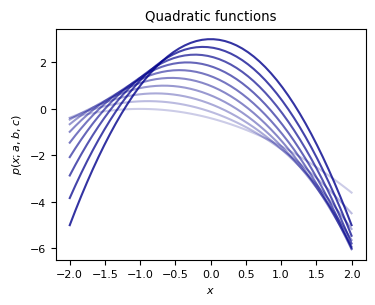

In [114]:
# Call plotting routine, passing x-values and y-values
# as arguments
plot_quad(xgrid, pvalues)

### Locating maxima using loops

Below is one possible way to implement a function that returns a vector 
of indices, each index storing the location of the maximum 
element in the corresponding row.

In [115]:
# Function to locate the maximum value in each row
def find_max(pvalues):
    # unpack rows and columns from shape attribute
    nrow, ncol = pvalues.shape
    # Create array to store location of maximum for each row.
    # Location is an index, so choose integer array type!
    imax = np.zeros(nrow, dtype=int)

    # iterate over all row
    for i in range(nrow):
        # initial guess for location of row maximum
        jmax = 0
        # iterate over all columns, locate index of maximum
        for j in range(1, ncol):
            if pvalues[i,j] > pvalues[i,jmax]:
                # value at (i,j) is larger than
                # value at current max: 
                # update jmax
                jmax = j
        # store index of maximum for current row
        imax[i] = jmax
    
    return imax

In [116]:
# use find_max() to locale indices of each row maximum
ipmax = find_max(pvalues)
ipmax

array([12, 14, 15, 16, 18, 19, 20, 22, 23, 24])

We plot the polynomials using the function we defined above. We then 
add the maxima to the *same* plot.

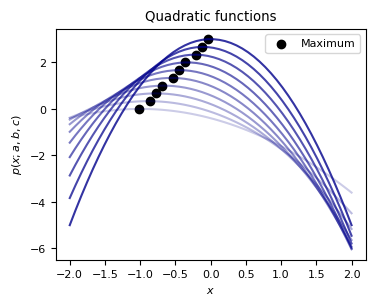

In [117]:
# Recreate original plot from above
plot_quad(xgrid, pvalues)

# Plot maxima on top of previous graph
ix = np.arange(m)
plt.scatter(xgrid[ipmax], pvalues[ix,ipmax], c='black', label='Maximum')
plt.legend()

### Vectorised version

The vectorised version simply uses NumPy's `np.argmax()` function. We need to
pass the argument `axis = 1` as the maximum should be computed across all columns
for any given row.

In [118]:
# Find row maxima using np.argmax()

ipmax2 = np.argmax(pvalues, axis=1)
ipmax2

array([12, 14, 15, 16, 18, 19, 20, 22, 23, 24])

We verify that the results of our and NumPy's implementation are 
identical. Since the values here are integers, we can directly
compare them using `==`. 

In [119]:
# Check that these are the same as what we computed above
np.all(ipmax == ipmax2)

True

Finally, we benchmark both implementations using `%timeit`. The NumPy version is approximately
100 times faster!

In [120]:
# Time our manual implementation
%timeit find_max(pvalues)

96.9 µs ± 936 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [121]:
# Time NumPy's implementation
%timeit np.argmax(pvalues, axis=1)

1.39 µs ± 8.41 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


# Random number generation and statistics

In this unit, we examine how to generate random numbers for various
probability distributions in NumPy. Additionally, we take a look
at SciPy's `stats` package which implements PDFs and other functions
for numerous probability distributions.

## Random number generators

Currently, there are several ways to draw random numbers in Python:

1.  The *new* programming interface implemented in NumPy, introduced
    in version 1.17 (the current version as of this writing
    is 1.23)
    [[official documentation](https://numpy.org/doc/stable/reference/random/generator.html)].
2.  The *legacy* programming interface implemented in NumPy
    [[official documentation](https://numpy.org/doc/stable/reference/random/legacy.html)].

    While these functions have been superseded by the new implementation,
    they continue to work.
    If you are familiar with the legacy interface, you can read about
    what has changed in the new interface [here](https://numpy.org/doc/stable/reference/random/new-or-different.html).
3.  The Python standard library itself also includes random number generators
    in the `random` module [[official documentation](https://docs.python.org/3/library/random.html#random.random)].

    We won't be using this implementation at all,
    since for our purposes `numpy.random` is preferable
    as it supports NumPy arrays.

The programming interface for generating random numbers in NumPy
changed substantially in release 1.17.
We discuss the new interface in this unit since it offers
several advantages, including faster algorithms for some distributions.
Moreover, one would expect the legacy interface to be
removed at some point in the future.
However, most examples you will find in textbooks and on the internet
are likely to use the old variant.

**A note on random-number generation**

Computers usually cannot draw
truly random numbers, so we often talk about *pseudo-random number
generators* (PRNG). Given an initial seed, these PRNGs will always produce
the same sequence of "random" numbers, at least if run on the
same machine, using the same underlying algorithm, etc.
For scientific purposes this is actually desirable as it allows us
to create reproducible results. For simplicity, we will nevertheless
be using the terms "random number" and "random number generator" (RNG),
omitting the "pseudo" prefix.

### Simple random data generation

Before we can generate any random numbers using the new interface, we need 
to obtain an RNG instance. We can get the default RNG by calling
[`default_rng()`](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng)
as follows:


In [1]:
# import function that returns the default RNG
from numpy.random import default_rng

# get an instance of the default RNG
rng = default_rng()

Let's begin with the most simple case, which uses the [`random()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html)
function to draw numbers that are uniformly distributed
on the half-open interval $[0.0, 1.0)$.

In [2]:
from numpy.random import default_rng
rng = default_rng()         # obtain default RNG implementation

rng.random(5)               # return array of 5 random numbers

array([0.50750802, 0.49089039, 0.69167508, 0.22551357, 0.66064775])

Calling `random()` this way will return a different set of
numbers each time (this might, for example, depend on the system time).
To obtain the same draw each time, we can pass an initial *seed* when
creating an instance of the RNG like this:

In [3]:
seed = 123
rng = default_rng(seed)     # obtain default RNG implementation,
                            # initialise seed
                            
rng.random(5)               # return array of 5 random numbers

array([0.68235186, 0.05382102, 0.22035987, 0.18437181, 0.1759059 ])

The `seed` argument needs to be an integer or an array of integers.
This way, each call gives the same numbers, as can easily be illustrated
with a loop:

In [4]:
seed = 123
for i in range(5):
    rng = default_rng(seed)
    print(rng.random(5))

[0.68235186 0.05382102 0.22035987 0.18437181 0.1759059 ]
[0.68235186 0.05382102 0.22035987 0.18437181 0.1759059 ]
[0.68235186 0.05382102 0.22035987 0.18437181 0.1759059 ]
[0.68235186 0.05382102 0.22035987 0.18437181 0.1759059 ]
[0.68235186 0.05382102 0.22035987 0.18437181 0.1759059 ]


You can remove the `seed` to verify that the set of number will then differ
in each iteration.

Alternatively, we might want to draw random integers by calling
[`integers()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html), which returns numbers from a "discrete uniform"
distribution on a given interval:

In [5]:
rng.integers(2, size=5)         # vector of 5 integers from set {0, 1}
                                # here we specify only the (non-inclusive)
                                # upper bound 2

array([0, 1, 0, 1, 0])

Alternatively, we can specify the lower and upper bounds like this:

In [6]:
rng.integers(1, 10, size=5)     # specify lower and upper bound

array([3, 8, 8, 8, 9])

Following the usual convention in Python, the upper bound is 
not included by default. We can change this by 
additionally passing `endpoint=True`:

In [7]:
rng.integers(1, 10, size=5, endpoint=True)      # include upper bound

array([1, 6, 3, 3, 3])

We can create higher-order arrays by passing a list or tuple as the
`size` argument:

In [8]:
rng.random(size=[2, 5])             # Create 2x5 array of floats
                                    # on [0.0, 1.0)

array([[0.21376296, 0.74146705, 0.6299402 , 0.92740726, 0.23190819],
       [0.79912513, 0.51816504, 0.23155562, 0.16590399, 0.49778897]])

In [9]:
rng.integers(2, size=[2,3,4])       # Create 2x3x4 array of integers {0,1}


array([[[1, 0, 1, 0],
        [0, 0, 0, 0],
        [0, 0, 1, 0]],

       [[1, 0, 1, 1],
        [1, 1, 1, 0],
        [0, 0, 1, 0]]])

**Legacy interface**

For completeness, let's look how you would accomplish the same using
the *legacy* NumPy interface.

To draw floats on the unit interval, we use [`random_sample()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html):

In [10]:
from numpy.random import random_sample, randint, seed
seed(123)
random_sample(5)

array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897])

Random integers can be generated using [`randint()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html):

In [11]:
randint(2, size=5)      # draw random integers from {0,1}

array([1, 1, 0, 1, 0])

The legacy interface defines global functions `seed`, `random_sample`, etc.
within the `numpy.random` module, which are implicitly associated with
a global RNG object. This implicit association has been removed in the
new programming model and you now have to obtain an RNG instance explicitly,
for example by using the `default_rng()` function, as demonstrated above.


### Drawing random numbers from distributions

Often we want to draw random numbers from a specific distribution,
such as the normal or log-normal distributions. The RNGs in `numpy.random`
support a multitude of distributions, including:

-   `binomial()`
-   `exponential()`
-   `normal()`
-   `lognormal()`
-   `multivariate_normal()`
-   `uniform()`

and many others. For a complete list, see the [official documentation](https://numpy.org/doc/stable/reference/random/generator.html#distributions).

We will illustrate the use of these functions for the normal and
multivariate normal distributions. For example, you can draw
from the normal distribution with mean $\mu=1.0$ and standard deviation
$\sigma=0.5$ using [`normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html) as follows:

Text(0.5, 1.0, 'Histogram of normal draws')

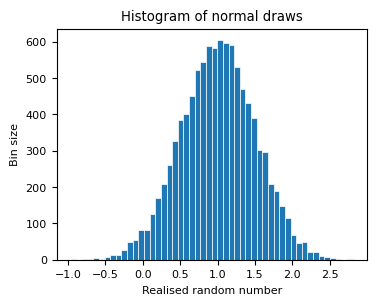

In [12]:
from numpy.random import default_rng
rng = default_rng(123)

# location and scale parameters of normal distribution
mu = 1.0
sigma = 0.5

# Draw 10000 normal numbers;
# mean and std. are passed as loc and scale arguments
x = rng.normal(loc=mu, scale=sigma, size=10000)

# plot the results
import matplotlib.pyplot as plt
plt.hist(x, bins=50, linewidth=0.5, edgecolor='white')
plt.xlabel('Realised random number')
plt.ylabel('Bin size')
plt.title('Histogram of normal draws')

To draw from the multivariate normal, we need to specify a vector
of means $\mu$ and the variance-covariance matrix $\Sigma$, which we set to

$$
\mu = \begin{bmatrix} 0 \\ 1\end{bmatrix}, \qquad 
\Sigma=\begin{bmatrix} \sigma_1^2 & \rho \sigma_1\sigma_2 \\ \rho\sigma_1\sigma_2 & \sigma_2^2\end{bmatrix}
$$

with $\sigma_1 = 0.5$, $\sigma_2 = 1.0$ and $\rho = 0.5$.
We call [`multivariate_normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.multivariate_normal.html)
to draw a sample:

Text(0.5, 1.0, 'Draws from bivariate normal distribution')

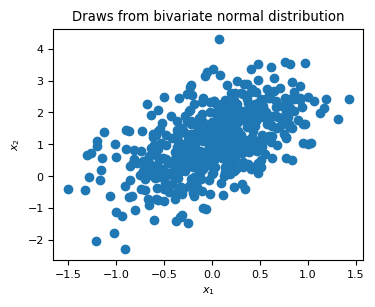

In [13]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

rng = default_rng(123)

mu = np.array((0.0, 1.0))       # vector of means
sigma1 = 0.5                    # Std. dev. of first dimension
sigma2 = 1.0                    # Std. dev. of second dimension
rho = 0.5                       # Correlation coefficient

# Compute covariance
cov = rho * sigma1 * sigma2

# Create variance-covariance matrix
vcv = np.array([[sigma1**2.0, cov],
                [cov, sigma2**2.0]])

# Draw MVN random numbers:
# each row represents one sample draw.
x = rng.multivariate_normal(mean=mu, cov=vcv, size=500)

# Scatter plot of sample
plt.scatter(x[:, 0], x[:, 1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Draws from bivariate normal distribution')

***
## More functions for probability distributions

NumPy itself only implements distribution-specific RNGs. Frequently, we want
to evaluate probability density functions (PDFs), cumulative distribution
functions (CDFs) or compute some moments such as the mean of a random
variable following some distribution. The SciPy project implements
these functions for a wide range of discrete and continuous univariate
distributions as well as for a few multivariate ones
in the `scipy.stats` package.

The most useful functions include:

-   `pdf()`: probability density function
-   `cdf()`: cumulative distribution function
-   `ppf()`: percent point function (inverse of `cdf`)
-   `moment()`: non-central moment of some order $n$
-   `expect()`: expected value of a function (of one argument) with
    respect to the distribution

The parameters that need to be passed to these functions are distribution
dependent. See the [official documentation](https://docs.scipy.org/doc/scipy/reference/stats.html)
for details.

*Examples:*

We can overlay the histogram of normal draws with the actual normal
PDF using SciPy's [`norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) 
distribution as follows:

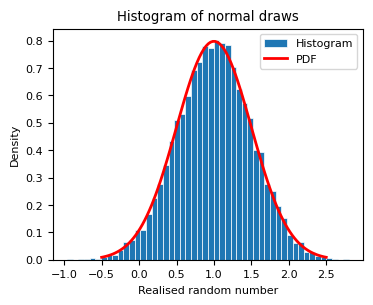

In [14]:
from numpy.random import default_rng
from scipy.stats import norm                # import normal distribution
import matplotlib.pyplot as plt
rng = default_rng(123)

# location and scale parameters of normal distribution
mu = 1.0
sigma = 0.5

# Draw 10000 normal numbers
x = rng.normal(loc=mu, scale=sigma, size=10000)    # mean and std. are passed as
                                                   # loc and scale arguments

# plot histogram
plt.hist(x, bins=50, density=True, linewidth=0.5, edgecolor='white',
         label='Histogram')

# Create x-values for PDF plot, using mean +/- 3 std.
xvalues = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# Compute PDF of normal distr. at given x-values
pdf = norm.pdf(xvalues, loc=mu, scale=sigma)
# Plot PDF
plt.plot(xvalues, pdf, linewidth=2.0, color='red', label='PDF')
plt.xlabel('Realised random number')
plt.ylabel('Density')
plt.title('Histogram of normal draws')
plt.legend()

In the above example we pass `density=True` to Matplotlib's
`hist()` plotting function so that the result is rescaled to
be comparable to the actual PDF.

Sometimes we need to compute the expectation of a function $g(x)$
with respect to a given distribution with PDF $f(x)$ on some
interval $(a,b)$:

$$E[g(x)] = \int_a^b g(x) f(x) dx$$

For example, we might want to know the mean of a *truncated* normal
with parameters $\mu=0$, $\sigma=1.0$ with support on $(-\infty,0)$,
i.e.

$$E[x| x \leq 0] = \int_{-\infty}^0 x \frac{f(x)}{F(0)}dx$$

where $f(x)$ and $F(x)$ are the PDF and CDF of the standard normal.
We can compute it as follows:

In [15]:
from scipy.stats import norm
import numpy as np

lb = -np.inf            # integration lower bound
ub = 0.0                # integration upper bound

mu = 0.0                # mean of the (untruncated) normal
sigma = 1.0             # std. dev. of the (untruncated) normal

cdf0 = norm.cdf(0.0, loc=mu, scale=sigma)       # CDF at 0

# Compute conditional expected value
Ex = norm.expect(lambda x: x/cdf0, loc=mu, scale=sigma, lb=lb, ub=ub)
Ex                      # print conditional expectation

-0.7978845608028651

Here we define the function to be integrated as $g(x) = \frac{x}{F(0)}$,
and we pass it to `expect()` as a lambda expression.

We can alternatively let `expect()` do the conditioning automatically
by specifying `conditional=True`, and then we 
don't even need to apply the scaling factor $\frac{1}{F(0)}$:


In [16]:
norm.expect(lambda x: x, loc=mu, scale=sigma, lb=lb, ub=ub, 
            conditional=True)

-0.7978845608028643

***
## Statistics functions

In the previous section we examined functions associated with specific
distributions. Additionally, there are numerous routines to process
*sample* data which are spread across NumPy and SciPy.

In NumPy, the most useful routines include:

-   [`np.mean()`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html),
    [`np.average()`](https://numpy.org/doc/stable/reference/generated/numpy.average.html): sample mean;
    the latter variant can also compute weighted means.
-   [`np.std()`](https://numpy.org/doc/stable/reference/generated/numpy.std), 
    [`np.var()`](https://numpy.org/doc/stable/reference/generated/numpy.var.html): 
    sample standard deviation and variance
-   [`np.percentile()`](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html), 
    [`np.quantile()`](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html): 
    percentiles or quantiles of a given array
-   [`np.corrcoef()`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html): 
    Pearson correlation coefficient
-   [`np.cov()`](https://numpy.org/doc/stable/reference/generated/numpy.cov.html): 
    sample variance-covariance matrix
-   [`np.histogram()`](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html): 
    histogram of data. This only bins the data,
    as opposed to Matplotlib's `hist()` which plots it.

In addition, there are the variants `np.nanmean()`, `np.nanstd()`, `np.nanvar()` 
`np.nanpercentile()` and `np.nanquantile()`
which ignore `NaN` values.
You can find the full list of routines in the [official documentation](https://numpy.org/doc/stable/reference/routines.statistics.html).

On top of that, the `scipy.stats` package contains functions to compute all
sorts of descriptive
statistics and statistical hypothesis tests. Many of these routines
are too specific to be listed here, so have a look at
the [official documentation](https://docs.scipy.org/doc/scipy/reference/stats.html#summary-statistics)
if you need to perform statistical analysis of your sample data.

*Examples:*

To compute the pairwise correlations of a sample drawn from a multivariate
normal distribution we proceed as follows:

In [17]:
import numpy as np
from numpy.random import default_rng

rng = default_rng(123)

# vector of multivariate normal means
mu = np.array([-1.0, 1.0])

sigma1 = 0.5                    # Std. dev. of first dimension
sigma2 = 1.0                    # Std. dev. of second dimension
rho = 0.5                       # Correlation coefficient

# Compute covariance
cov = rho * sigma1 * sigma2

# variance-covariance matrix
vcv = np.array([[sigma1**2.0, cov],
                [cov, sigma2**2.0]])

# Draw some multivariate normal random numbers
x = rng.multivariate_normal(mean=mu, cov=vcv, size=1000)

# Compute correlation coefficient
np.corrcoef(x.T)        # expects each row to contain one variable

array([[1.        , 0.51768322],
       [0.51768322, 1.        ]])

Depending on the sample size, the correlation coefficient reported
in the off-diagonal elements might or might not be close to the $\rho$
used to draw the random data.

In the next example, we demonstrate how to compute some descriptive
statistics using SciPy's [`describe()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html) 
for a sample drawn from a 3-dimensional multivariate normal distribution:

In [18]:
import scipy.stats
import numpy as np
from numpy.random import default_rng

rng = default_rng(123)

# vector of multivariate normal means
mu = np.array([-1.0, 0.0, 1.0])

# variance-covariance matrix
vcv = np.array([[1.0, 0.5, 0.2],
                [0.5, 2.0, 0.7],
                [0.2, 0.7, 0.5]])

# Draw some multivariate normal random numbers
x = rng.multivariate_normal(mean=mu, cov=vcv, size=100)

# Compute some descriptive statistics
nobs, minmax, mean, variance, skewness, kurtosis = scipy.stats.describe(x)
mean        # array of means

array([-0.98486214, -0.0719401 ,  0.99084898])

In [19]:
variance    # array of variances

array([0.80017787, 1.96834418, 0.37118602])

To illustrate how to use one of the many tests implemented
in `scipy.stats`, we compute the [Jarque-Bera test](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test)
statistic using [`jarque_bera()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html). 
This is a goodness-of-fit test
to assess whether a sample has zero skewness and excess kurtosis
and could thus be normally distributed.

In [20]:
from scipy.stats import jarque_bera
from numpy.random import default_rng

rng = default_rng(123)

# Draw from univariate normal
x = rng.normal(loc=1.0, scale=2.0, size=10000)

# Compute Jarque-Bera test statistic
jb_stat, pvalue = jarque_bera(x)
print(f'Test statistic: {jb_stat:.3f}, p-value: {pvalue:.3f}')

Test statistic: 3.472, p-value: 0.176


With a p-value of about 0.18 we cannot reject the null hypothesis
of zero skewness and zero excess kurtosis.

***

## Exercises

The following exercises are considerably longer than those in previous units. The reason is that they incorporate everything we have covered so far,
and we are finally able to use larger data sets (albeit only randomly generated ones) instead of just calling `np.arange(5)` all the time.
In this sense, the exercises are starting to resemble (simplified) real-world applications.

### Exercise 1: Histograms for increasing sample sizes

In this exercise, we plot histograms against the actual PDF of a [standard-t](https://en.wikipedia.org/wiki/Student%27s_t-distribution) distributed
random variable for increasing sample sizes.

Consider the standard-t distribution with 20 degrees of freedom (this is the only
parameter of this distribution):

- To draw samples from this distribution, use NumPy RNG's [`standard_t()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.standard_t.html) method.
- To plot the PDF of this distribution, use the [`t`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) distribution from
    `scipy.stats`. You can import it as follows

    ```
    from scipy.stats import t as standard_t
    ```
    It is a good idea to assign more descriptive names to imported symbols
    than a `t`.

Perform the following tasks:

1.  Draw random samples from the standard-t distribution for 
    a sequence of increasing sample sizes of 50, 100, 500, 1000, 5000 and 10000.
2.  Create a single figure with 6 panels in which you plot a histogram
    of the samples you have drawn. Use matplotlib's
    [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function
    to do this, and pass the argument `bins = 50` so that each panel
    uses the same number of bins.
3.  Add the actual PDF of the standard-t distribution to each panel.
    To evaluate the PDF, use the `pdf()` method of the `t` distribution you
    imported from `scipy.stats`.


### Exercise 2: Moments of truncated normal

In this exercise, you are asked to compute the second non-central moment 
of a truncated normal distribution.

Consider a truncated normal distribution with support on the interval
$[a,b]$ with $a = \mu-2\sigma$ and $b=\mu+2\sigma$. 
Assume the underlying (untruncated) normal distribution 
has mean $\mu = 0$ and variance $\sigma^2 = 1$. Compared to the 
untruncated normal PDF, the
truncated PDF is rescaled upwards so that it integrates to 1,
as illustrated in the following figure:

![PDF of truncated normal](solutions/unit07/unit07_ex2_PDF.svg)


Compute the second non-central moment $E[X^2]$ in four different ways:

1.  Use the fact that $Var(X) = E[X^2] - E[X]^2$. Call the methods
    `mean()` and `var()` of the [truncated normal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html) implemented in SciPy
    to compute the (squared) mean and variance.

    *Hint:* Import the truncated normal as follows:

    ```
    from scipy.stats import truncnorm
    ```
2.  Use the `moment()` method of SciPy's truncated normal to directly compute 
    the desired moment.
3.  Use the `expect()` method of SciPy's truncated normal to compute the 
    expectation $E[X^2]$.
4.  Use [Monte Carlo integration](https://en.wikipedia.org/wiki/Monte_Carlo_integration) 
    to compute the expectation $E[X^2]$. 
    There are numerous ways to do MC integration.
    In this exercise, we use a variant
    which draws random samples from a 2-dimensional uniform distribution
    to compute an area under the integrand:
    -   To do this, define the integrand as $x^2 \cdot f_t(x;a,b,\mu,\sigma)$ where 
        $f_t$ is the PDF of the truncated normal with parameters $a$, $b$, $\mu$
        and $\sigma$.
    -   Draw random numbers in the rectangle which has length $b-a$ and 
        a height which is the maximum of the integrand on the integration interval 
        $[a,b]$.
    -   Determine the fraction of sampled points that are below the integral,
        and use this to compute the area under the integrand.

    The following figure illustrates this approach to integration. The blue 
    dots are included in the integral whereas the red crosses are not:

    ![MC integration](solutions/unit07/unit07_ex2_MC.svg)

    This may not be the most practical way to do MC integration, and we will 
    examine a more common approach in the next exercise.

    *Note:* SciPy's truncated normal expects *normalised* boundaries $a$ and $b$.
    Whenever the underlying distribution is *not* standard normal, you have to 
    pass $z_a = (a-\mu)/\sigma$ and $z_b = (b-\mu)/\sigma$ instead of $a$ and $b$
    to all of `truncnorm`'s methods.

### Exercise 3: Multi-period asset returns

Consider an investor with initial assets $a$ and a 2-period investment horizon (we assume
the investor does not change the asset position after the first period).

Denote by $R$ the total gross return over two periods, so that the terminal wealth 
is given by $W = a\cdot R$. The total gross return is the product of the period-1
and period-2 gross returns, $R = R_1\cdot R_2$. We impose that per-period log returns 
$r_t = \log R_t$ are jointly normally distributed with mean
$E[r_t] = \mu$, variance $Var(r_t) = \sigma^2$ for $t\in\{1,2\}$ with a correlation coefficient $Corr(r_1,r_2) = \rho$.
Let $a = 1$, $\mu = 0.04$, $\sigma = 0.16$ and $\rho = 0.5$.

1.  Derive the analytical expression for the expected total gross return after 2 periods.

    *Hint:*
    -   Remember that since $(r_1,r_2)$ are jointly normally distributed, so is their sum,
        $\log R = r_1 + r_2$.
    -   Moreover, if $\log R$ is normally distributed with mean $\mu_R$ and 
        variance $\sigma_R^2$, then $R$ is 
        [log-normally](https://en.wikipedia.org/wiki/Log-normal_distribution) 
        distributed and has the expected value

        $$E[R] = \exp\left(\mu_R + \frac{1}{2}\sigma_R^2 \right)$$
2.  Compute the expected terminal wealth after 2 periods using Monte Carlo simulation.
    To do this,

    1.  Draw $N$ samples of multivariate normally distributed vectors $(r_{1i},r_{2i})$
        using NumPy's [multivariate_normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html).
    2.  Compute the terminal wealth for each draw $i$: $W_i = a\exp(r_{1i})\exp(r_{2i})$.
    3.  Compute the expected wealth as the sample average:

        $$E[W] \approx \overline{W} = \frac{1}{N}\sum_{i=1}^N W_i$$

    Make sure you get approximately the same result as in part 1 (you may need to 
    increase the sample size if this is not the case).
3.  Plot a histogram of the simulated total gross returns, and overlay it with 
    the PDF of the log-normal distribution 
    you derived in the first part.

### Exercise 4: Standard error and increasing sample size

Consider a setting in which we draw multiple samples indexed by $k$
such that these samples are increasing in the sample size $N_k$,
given by $N_k$ = 10, 50, 100, 500, 1000, 5000, 10000, 50000 and 100000.

The data for the $k$-th sample are $(x_{ik})_{i=1}^{N_k}$ where $i$ indexes
some draw within the $k$-th sample.
Assume that the data are [log-normally](https://en.wikipedia.org/wiki/Log-normal_distribution)
distributed such that the underlying normal distribution has mean
$\mu=0.5$ and variance $\sigma^2 = 1.5^2$.

1.  For each sample size $N_k$, use NumPy's [`lognormal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.lognormal.html) to 
    draw a log-normally distributed sample.
2.  For each sample, compute the sample mean and its standard error. As a reminder, the
    standard error of the $k$-th sample mean $\overline{x}_k$ is defined as

    $$se(\overline{x}_k) = \sqrt{\frac{\widehat{\sigma}_{k}^2}{N_k}}$$

    where $\widehat{\sigma}_{k}^2$ is the variance of residuals
    $u_{ik} = x_{ik} - \overline{x}_k$ for each sample $k$,

    $$\widehat{\sigma}_{k}^2 = \frac{1}{N_k-1}\sum_{i=1}^{N_k} u_{ik}^2$$

3.  Plot the sample means for all samples, using the sample size on the $x$-axis
    and the estimated mean on the $y$-axis. Use the $\log_{10}$ scale on the $x$-axis.

    *Hint:* You can activate log scaling by calling `xscale('log')`, 
    or `set_xscale('log')` when using the object-oriented plotting interface.
4.  Add a horizontal line showing the true mean (which is the same for all sample sizes).
5.  Add confidence intervals (CI) for each sample size: use the interval
    $\overline{x}_k \pm 2\times se(\overline{x}_k)$ to get a CI of approximately 95%.


### Exercise 5: The jackknife

We continue with the setting from exercise 4, but instead of computing the standard error
as above, we now use a resampling technique known as the [jackknife](https://en.wikipedia.org/wiki/Jackknife_resampling) 
to get the sample mean and its standard error.

1.  For each sample $k$, compute $N_k$ sample means $\overline{x}_{-i,k}$ which are obtained
    by leaving out the $i$-th observation:
    $$
    \overline{x}_{-i,k} = \frac{1}{N_k-1}\sum_{j = 1, j \neq i}^{N_k} x_{jk} 
    \qquad i = 1,\dots,N_k
    $$
    where $x_{jk}$ is the $j$-th draw in the $k$-th sample.
2.  Compute the jackknife estimate of the sample mean as the average of these 
    sub-sample means:
    $$
    \overline{x}_{k,jack} = \frac{1}{N_k}\sum_{i=1}^{N_k} \overline{x}_{-i,k}
    $$
    For the special case of a sample mean, it is straightforward to show
    that this is just the regular sample mean computed on the whole sample,
    $\overline{x}_{k,jack} = \overline{x}_k$, where
    $$
    \overline{x}_k = \frac{1}{N_k}\sum_{i=1}^{N_k} x_{ik}
    $$
3.  The jackknife estimate of the error variance for sample size $N_k$ is then given by 
    $$
    \begin{aligned}
    \widehat{var}(\overline{x}_k) 
        &= \frac{N_k - 1}{N_k} \sum_{i=1}^{N_k}\left(
                \overline{x}_{-i,k} - \overline{x}_{jack,k}\right)^2 \\
        &= \frac{1}{N_k(N_k-1)} \sum_{i=1}^{N_k}(x_{ik}-\overline{x}_k)^2
    \end{aligned}
    $$
    where the second line again follows as a special case if we are estimating
    the sample mean.
    The standard error of the sample mean is thus
    $$
    se(\overline{x}_k) = \sqrt{\widehat{var}(\overline{x}_k)}
    $$
4.  Recreate the plot from exercise 4, but now use the jackknife estimate 
    of the standard error instead.

### Exercise 6: The bootstrap

We continue with the setting from exercises 4 and 5, but now we use the 
[bootstrap](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)#Case_resampling)
to estimate the confidence intervals of the mean estimate.

1.  For each sample size $N_k$ proceed as follows:
    1.  Draw an initial sample of size $N_k$ as before and compute the sample mean.
    2.  Resample $N_k$ observations by drawing from this initial sample *with*    
        *replacement* using NumPy's [`choice()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html) function.
    2.  For each "resample", compute the sample mean. Say we have the $j$-th resample
        which consists of the draws $(x_{ik}^j)_{i=1}^{N_k}$, so we compute the 
        $j$-th mean
        $$
        \overline{x}_{k}^j = \frac{1}{N_k} \sum_{i=1}^{N_k} x_{ik}^j
        $$
    3.  Repeat steps 2 and 3 $N_{bs} = 999$ times.
    4.  Use these $N_{bs}$ means to find the 2.5% and 97.5% percentiles
        of the mean estimate distribution,
        $\overline{x}_k^{p2.5}$ and $\overline{x}_k^{p97.5}$.
    5.  The bootstrapped 95% confidence interval is then given by
        $\left[\overline{x}_k^{p2.5}, \overline{x}_k^{p97.5}\right]$.
2.  Recreate the same plot as in exercises 4 and 5, but this time use the bootstrapped 
    95% confidence interval you computed for each sample size.
3.  For each sample size, store all bootstrapped means and use these to create a 
    histogram of sample means. You will thus have to create 9
    histograms. Use vertical lines to indicate
    the 95% confidence interval.

***
## Solutions

The solutions are also provided as Python scripts in the [lectures/solutions/unit06/](../lectures/solutions/unit06) folder.

### Solution for exercise 1

In the following solution, we create a figure with six panels (axes) and
iterate over these axes. In each iteration, we

1.  draw a random sample for the given (increasing) size;
2.  plot the histogram using the current axes object; and 
3.  overlay the actual PDF.

Text(0.5, 1.05, 'Draws from the standard-t distribution')

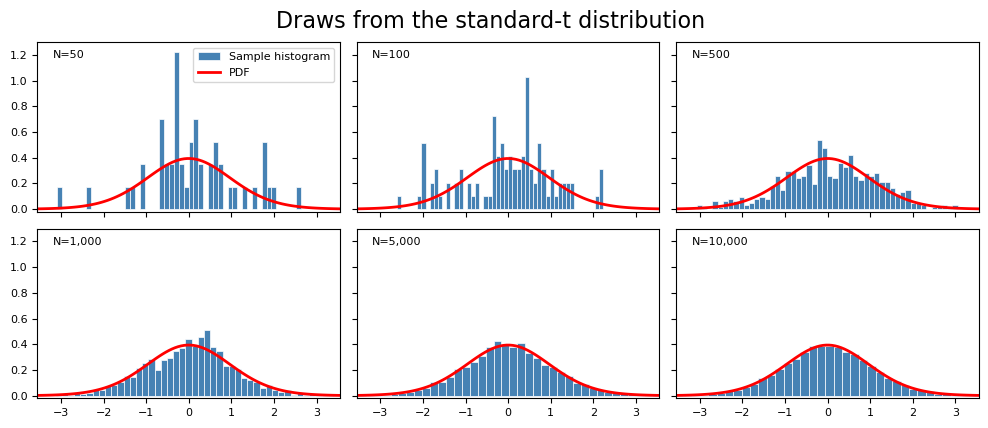

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
from scipy.stats import t as standard_t

# Sample sizes
Nobs = np.array((50, 100, 500, 1000, 5000, 10000))

# degrees of freedom
df = 20

# Determine xlims such that we cover the (0.1, 99.9) percentiles
# of the distribution.
xmin, xmax = standard_t.ppf((0.001, 0.999), df=df)

xvalues = np.linspace(xmin, xmax, 100)
pdf = standard_t.pdf(xvalues, df=df)

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(10, 4))

# initialize default RNG
rng = default_rng(123)

for i, axes in enumerate(ax.flatten()):
    # Sample size to be plotted in current panel
    N = Nobs[i]
    # Draw sample of size N
    data = rng.standard_t(df=df, size=N)

    # plot histogram of given sample
    axes.hist(data, bins=50, linewidth=0.5, edgecolor='white', 
              color='steelblue', density=True, label='Sample histogram')

    # overlay actual PDF
    axes.plot(xvalues, pdf, color='red', lw=2.0, label='PDF')

    # create text with current sample size
    axes.text(0.05, 0.95, f'N={N:,d}', transform=axes.transAxes, va='top')

    axes.set_xlim((xmin, xmax))
    axes.set_ylim((-0.02, 1.3))

    # plot legend only for the first panel
    if i == 0:
        axes.legend(loc='upper right')

# compress space between individual panels
fig.tight_layout()
# Add overall title
fig.suptitle('Draws from the standard-t distribution', fontsize=16, y=1.05)
    

A few comments on how we create the $x$-values and the plot range for these graphs:

1.  In principle, we could draw arbitrarily large or small realised values, 
    but we want to restrict the plot limits to a reasonable interval.
2.  To find such an interval, we compute the percentiles corresponding
    to 0.1% and 99.9%, which will cover almost any point we'd want to plot.
3.  Moreover, we need to compute the $x$-values and evaluate the 
    PDF at these points only once since these will remain unchanged
    for all sample sizes.

Note also that the `subplots()` function returns a 2-dimensional array 
(since we requested a $2 \times 3$ layout). 
We iterate over the *flattened* array of axes objects instead
of writing two nested loops over rows and columns.

### Solution for exercise 2

Computing the second non-central moment using the first three methods 
is straightforward. All you need to do is to make sure 
that you pass the correct parameters to SciPy's `truncnorm` methods:

In [22]:
import numpy as np
from scipy.stats import truncnorm

# Parameters
mu = 0.0
sigma = 1.0
a = mu - 2*sigma
b = mu + 2*sigma

# Standardised boundaries if underlying non-truncated distr. is
# NOT standard normal
za = (a-mu)/sigma
zb = (b-mu)/sigma

# Method 1: Compute from E[X^2] = Var(X) + E[X]^2
var = truncnorm.var(za, zb, loc=mu, scale=sigma)
mean = truncnorm.mean(za, zb, loc=mu, scale=sigma)
m2_var_mean = var + mean ** 2.0

# Method 2: Compute using moment()
m2 = truncnorm.moment(2, za, zb, loc=mu, scale=sigma)

# Method 3: Compute moment using expect() function
m2_expect = truncnorm.expect(lambda x: x**2.0, args=(za, zb), 
                             loc=mu, scale=sigma)

print(f'Second non-central moment, var + mean^2: {m2_var_mean:.5e}')
print(f'Second non-central moment, moment(): {m2:.5e}')
print(f'Second non-central moment, expect(): {m2_expect:.5e}')


Second non-central moment, var + mean^2: 7.73741e-01
Second non-central moment, moment(): 7.73741e-01
Second non-central moment, expect(): 7.73741e-01


The fourth method is more involved. We first define the integrand as follows:

In [23]:
# Function to compute integrand
def f_integrand(x, a, b, mu, sigma):
    # Transform to boundaries required by SciPy's truncnorm
    za = (a - mu) / sigma
    zb = (b - mu) / sigma
    # Evaluate truncated normal PDF
    pdf = truncnorm.pdf(x, za, zb, loc=mu, scale=sigma)
    # Compute integrand x^2 * f(x)
    result = x ** 2.0 * pdf
    return result

The remainder of the Monte Carlo code look as follows:

In [24]:
from numpy.random import default_rng

# Initialise RNG
rng = default_rng(123)
# Sample size for Monte Carlo integration
Nsample = 50000

# x-values should be uniformly distributed on [a, b]
xsample = rng.uniform(a, b, size=Nsample)
# Alternatively we can also just use equidistant x-values, in
# low-dimensional problems it makes no difference.
# xsample = np.linspace(a, b, Nsamples)

# Evaluate integrand at sampled x-values
integrand = f_integrand(xsample, a, b, mu, sigma)

# Compute size of bounding rectangle:
# the height is taken as the largest realisation of the integrand.
length = b - a
height = np.amax(integrand)
area = height * length
# draw y-values from uniform distribution on [0, height]
ysample = rng.uniform(0, height, size=Nsample)
# Compute fraction of points that are underneath the PDF
frac = np.mean(ysample <= integrand)
integral_MC = frac * area

print(f'Second non-central moment, MC integration: {integral_MC:.5e}')

Second non-central moment, MC integration: 7.72828e-01


You might have noticed that MC integration is not the fastest to converge, but using 50000 
draws is sufficient to get somewhat close to the other three methods.

In this case we do not actually need Monte Carlo methods, because the 
dimensionality of the problem is so low. We could just as well have used a
dense deterministic rectangular grid instead of randomly-drawn points.

The entire Python script which also generates the graphs displayed
in the exercise can be found in the [solutions](../lectures/solutions/unit7) folder 

### Solution for exercise 3

**Part 1**

The first part is purely analytical. We use it to verify
that the code in part 2 yields the correct result.

Since $(r_1, r_2)$ are jointly normal, a standard result is that their sum $r_1 + r_2$
is normally distributed with mean and variance given by

$$\mu_{rr} = E[r_1 + r_2] = 2\mu $$

$$
\sigma^2_{rr} = Var(r_1+r_2) = Var(r_1) + Var(r_2) + 2\cdot Cov(r_1,r_2) = 2\sigma^2 + 2\rho\sigma^2 
$$

This is even simpler than the usual formulas since both per-period log returns have 
the same mean and variance.

Moreover, since $\log R = r_1 + r_2$ is normally distributed, $R$ is log-normally
distributed and has the expected value 
$$
E[R] = \exp\left(\mu_{rr} + \frac{1}{2}\sigma_{rr}^2 \right)
    = \exp\left(2\mu + (1+\rho) \sigma^2 \right)
$$
Since $a = 1$, this is also the expected value of terminal wealth $W$.

We can plug in the parameter values to compute the numerical value:

In [25]:
import numpy as np

# Parameters
a = 1.0                         # Initial assets
mu = np.array((0.04, 0.04))     # average log returns
sigma = 0.16                    # std. dev. of log returns
rho = 0.5                       # serial correlation

# Exact expectation
var_rr = 2.0 * sigma ** 2.0 + 2.0 * rho * sigma ** 2.0
sigma_rr = np.sqrt(var_rr)
mu_rr = np.sum(mu)

exp_exact = a * np.exp(mu_rr + sigma_rr ** 2.0 / 2.0)

print(f'Expected portfolio value (exact): {exp_exact:.4f}')

Expected portfolio value (exact): 1.1257


**Parts 2 and 3**

To perform the Monte Carlo simulation, we need to define the vector
of means and the variance-covariance matrix which we can 
pass to NumPy's `multivariate_normal()` to sample returns $(r_1, r_2)$:

In [26]:
import numpy as np
from numpy.random import default_rng
from scipy.stats import lognorm

# Parameters
a = 1.0                         # Initial assets
mu = np.array((0.04, 0.04))     # average log returns
sigma = 0.16                    # std. dev. of log returns
rho = 0.5                       # serial correlation

# Covariance
cov = rho*sigma**2.0
# variance-covariance matrix
vcv = np.array([[sigma**2.0, cov],
                [cov, sigma**2.0]])

Nsample = 5000000
rng = default_rng(123)
# Draw MV normal samples: each row corresponds to one draw
samples = rng.multivariate_normal(mean=mu, cov=vcv, size=Nsample)

# Evaluate total gross return at sampled points:
#   R = exp(r_1) * exp(r_2)
returns = np.prod(np.exp(samples), axis=1)
# Sampled terminal wealth after 2 periods
wealth = a * returns
# Expected terminal wealth
exp_MC = np.mean(wealth)

print(f'Expected portfolio value (MC): {exp_MC:.4f}')

Expected portfolio value (MC): 1.1256


Finally, we use the sampled points and the `pdf()` method of SciPy's
[lognorm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html) to plot the histogram and the true PDF.

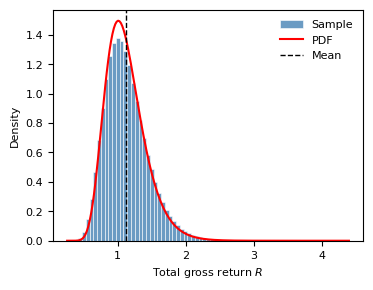

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

ax.hist(returns, bins=75, density=True, color='steelblue', lw=0.5,
        edgecolor='white', alpha=.8, label='Sample')

# Plot log-normal PDF of total gross return
xmin, xmax = np.amin(returns), np.amax(returns)
xvalues = np.linspace(xmin, xmax, 200)
pdf = lognorm.pdf(xvalues, s=sigma_rr, loc=mu_rr)
ax.plot(xvalues, pdf, c='red', lw=1.5, label='PDF')

# Add line with true expected value
ax.axvline(exp_exact, lw=1.0, color='black', ls='--', label='Mean')

ax.set_xlabel('Total gross return $R$')
ax.set_ylabel('Density')
ax.legend(loc='upper right', frameon=False)

The dashed black line shows the analytically derived expected total gross return.

### Solution for exercise 4

We solve the exercise by iterating over all sample sizes, drawing a new log-normal
sample and computing the sample mean and standard error.
These are stored in the arrays `mean_hat` and `std_err`, which we then use 
the generate the plot.

(1.0, 8.0)

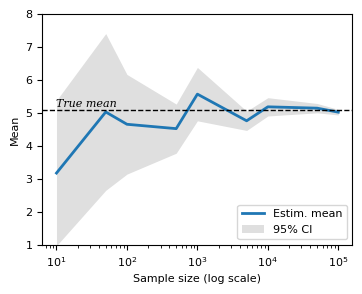

In [28]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

sample_sizes = np.array([10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000])
# initialize default RNG
rng = default_rng(123)

# Parameters of underlying normal distribution
mu = 0.5
sigma = 1.5

# Array to store estimated mean for each sample size
mean_hat = np.zeros(len(sample_sizes))
# Array to store std. error for each sample size
std_err = np.zeros_like(mean_hat)

for k, N in enumerate(sample_sizes):
    data = rng.lognormal(mean=mu, sigma=sigma, size=N)
    # sample mean
    x_k = np.mean(data)
    # residuals around mean
    resid = data - x_k
    # Residual variance
    var_resid = np.sum(resid**2.0) / (N-1)
    # std. error of mean estimate
    se_k = np.sqrt(var_resid / N)

    # store sample estimates in array
    mean_hat[k] = x_k
    std_err[k] = se_k

# Plot results
plt.plot(sample_sizes, mean_hat, lw=2.0, label='Estim. mean')

# Add line indicating true mean of log-normal
mean = np.exp(mu + sigma**2.0 / 2.0)
plt.axhline(mean, lw=1.0, color='black', ls='--')
plt.text(sample_sizes[0], mean + 0.05, 'True mean', va='bottom',
         fontstyle='italic', fontfamily='serif')

plt.fill_between(sample_sizes, mean_hat - 2*std_err, mean_hat + 2*std_err,
                 color='grey', alpha=0.25, zorder=-1, lw=0.0, 
                 label='95% CI')

plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Sample size (log scale)')
plt.ylabel('Mean')
# Use identical y-lims across ex. 4-6
plt.ylim((1.0, 8.0))



### Solution for exercise 5

Much of this solution proceeds in the very same way as in exercise 4. Additionally,

-   For each sample, we now have to loop over all observations, create a
    sub-sample which omits a particular observation and calculate the mean of 
    this sub-sample.
-   We compute the estimate of the sample mean as the average of all these means.

The code is substantially slower than in exercise 4 as it takes considerable time
to loop over all observations in the larger samples.

Note that the jackknife is rarely used these days as it has been replaced by
other resampling methods such as the bootstrap. The resulting confidence
intervals look identical to the ones in exercise 4 since we have established earlier
that for the sample mean the jackknife estimate of the variance is in
fact identical to the standard approach.

(1.0, 8.0)

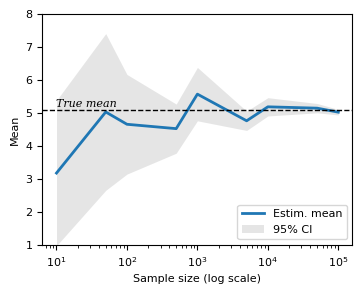

In [29]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt


sample_sizes = np.array([10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000])
# initialize default RNG
rng = default_rng(123)

# Parameters of underlying normal distribution
mu = 0.5
sigma = 1.5

# Array to store estimated mean for each sample size
mean_hat = np.zeros(len(sample_sizes))
# Array to store std. errors for each sample size
std_err = np.zeros_like(mean_hat)

for k, N in enumerate(sample_sizes):
    data = rng.lognormal(mean=mu, sigma=sigma, size=N)

    mean_subsample = np.zeros_like(data)

    # Iterate over all elements, leaving out one element
    # and computing the mean of the resulting sub-sample
    for j in range(N):
        # Initial boolean mask: include all elements
        mask = np.ones_like(data, dtype=bool)
        # leave out j-th observation
        mask[j] = False
        subsample = data[mask]

        x_j = np.mean(subsample)
        mean_subsample[j] = x_j

    # compute sample jackknife mean estimate as average of
    # sub-sample means
    x_k = np.mean(mean_subsample)

    # Compute variance of jackknife mean estimate
    var = (N-1)/N * np.sum((mean_subsample - x_k) ** 2.0)
    # jackknife std. err. of mean estimate
    se = np.sqrt(var)

    # store sample estimates in array
    mean_hat[k] = x_k
    std_err[k] = se

# Plot results
plt.plot(sample_sizes, mean_hat, lw=2.0, label='Estim. mean')

# Add line indicating true mean of log-normal
mean = np.exp(mu + sigma ** 2.0 / 2.0)
plt.axhline(mean, lw=1.0, color='black', ls='--')
plt.text(sample_sizes[0], mean + 0.05, 'True mean', va='bottom',
         fontstyle='italic', fontfamily='serif')

plt.fill_between(sample_sizes, mean_hat - 2*std_err, mean_hat + 2*std_err,
                 color='grey', alpha=0.2, zorder=-1, lw=0.0, 
                 label='95% CI')
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Sample size (log scale)')
plt.ylabel('Mean')
# Use identical y-lims across ex. 4-6
plt.ylim((1.0, 8.0))

### Solution for exercise 6

We first define a function `bootstrap_means()` which takes as given the initial
sample, and

1.  Resamples the desired number of times
2.  For each resample, computes the sample mean
3.  Returns all sample means in an array.



In [30]:
import numpy as np

def boostrap_mean(x, Nrounds):
    means = np.zeros(Nrounds)
    # Sample size
    N = len(x)

    for j in range(Nrounds):
        # Resample with replacement
        resampled = np.random.choice(x, size=N, replace=True)

        # Compute mean of bootstrapped sample
        m = np.mean(resampled)

        means[j] = m

    return means

We use the function `np.random.choice()` to sample from the
initial sample with replacement (passing the argument `replace=True`).

We can then use these bootstrapped means to compute the P2.5 and P97.5 percentiles
using the [`np.percentile()`](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html) function. These represent the bounds of 
the 95% confidence interval.

The remainder of the implementation looks almost identical to 
the previous exercises. We additionally store all bootstrapped means 
in the list `means_all` which we use below to create 
the histograms.

(1.0, 8.0)

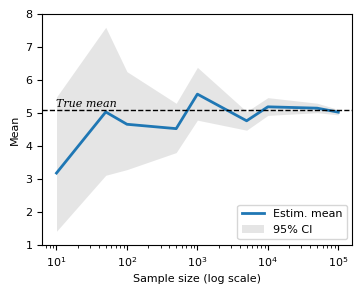

In [31]:
from numpy.random import default_rng
import matplotlib.pyplot as plt

sample_sizes = np.array([10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000])
# Number of bootstraps
Nbs = 999

# initialize default RNG
rng = default_rng(123)

# Parameters of underlying normal distribution
mu = 0.5
sigma = 1.5

# Array to store estimated mean for each sample size
mean_hat = np.zeros(len(sample_sizes))
# Array to store CI lower and upper bounds
bounds = np.zeros((len(sample_sizes), 2))

# Collect all bootstrapped means for each sample size
# to create histograms at the end
means_all = []

for k, N in enumerate(sample_sizes):
    data = rng.lognormal(mean=mu, sigma=sigma, size=N)

    # Mean of original sample
    x_k = np.mean(data)
    mean_hat[k] = x_k

    # bootstrap means
    mean_bs = boostrap_mean(data, Nbs)

    # CI lower and upper bounds at (p2.5, p97.5)
    rank = 2.5, 97.5
    bnd = np.percentile(mean_bs, q=rank)
    bounds[k] = bnd

    # Store in list of all bootstrapped means
    # so we can plot histogram later
    means_all.append(mean_bs)


# Plot results
plt.plot(sample_sizes, mean_hat, lw=2.0, label='Estim. mean')

# Add line indicating true mean of log-normal
mean = np.exp(mu + sigma**2.0 / 2.0)
plt.axhline(mean, lw=1.0, color='black', ls='--')
plt.text(sample_sizes[0], mean + 0.05, 'True mean', va='bottom',
         fontstyle='italic', fontfamily='serif')

plt.fill_between(sample_sizes, bounds[:, 0], bounds[:, 1],
                 color='grey', alpha=0.2, zorder=-1, lw=0.0,
                 label='95% CI')
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Sample size (log scale)')
plt.ylabel('Mean')
# Use identical y-lims across ex. 4-6
plt.ylim((1.0, 8.0))


Finally, the code below creates the histograms for each sample size.
Note the different plot limits on the $x$-axis: the bootstrapped means
for larger sample sizes are much closer together.

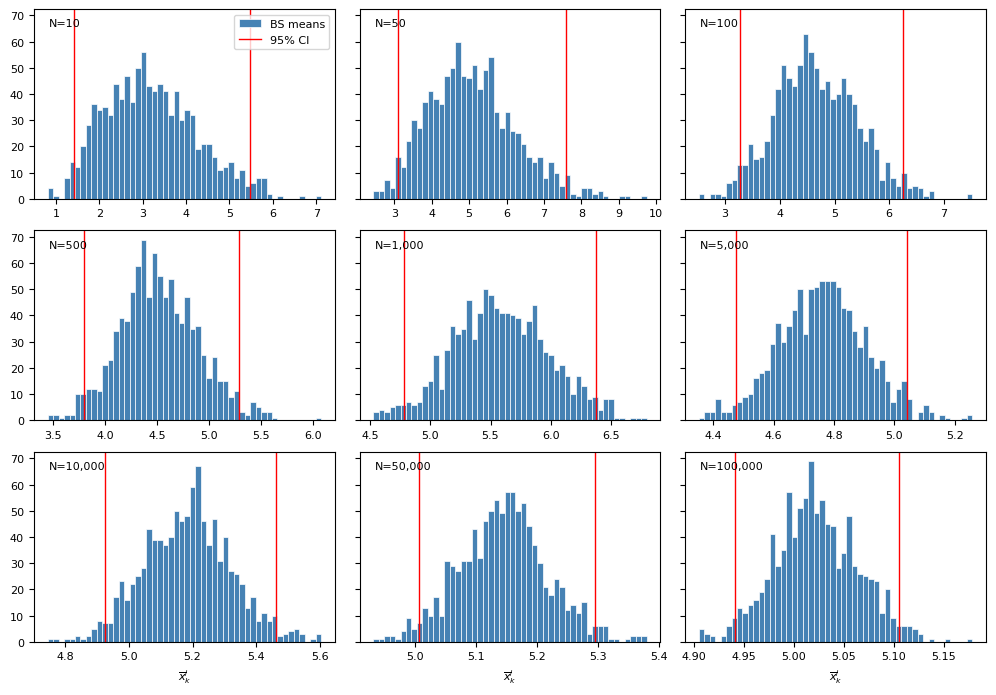

In [35]:
fig, axes = plt.subplots(3, 3, sharex=False, sharey=True, figsize=(10, 7))

for k, ax in enumerate(axes.flatten()):

    N_k = sample_sizes[k]
    means_k = means_all[k]
    ax.hist(means_k, bins=50, color='steelblue', lw=0.5, 
            edgecolor='white', label='BS means')
    ax.axvline(bounds[k, 0], color='red', lw=1.0, label='95% CI')
    ax.axvline(bounds[k, 1], color='red', lw=1.0)

    # add sample size
    ax.text(0.05, 0.95, f'N={N_k:,d}', transform=ax.transAxes, va='top')

    if k == 0:
        ax.legend(loc='upper right')

    if k > 5:
        ax.set_xlabel(r'$\overline{x}_{k}^j$')

fig.tight_layout()

As an aside, the use of the bootstrap in this scenario is somewhat nonsensical
and only serves to practice doing data analysis with Python. 
We use bootstrapping in settings where we don't know the 
underlying distribution, so we are forced to use the data 
we have as the population from which we resample with replacement.
Here, we of course know that the data is log-normally distributed,
so we could just draw new samples from that distribution directly.

# Handling data with pandas


## Motivation

So far, we have encountered NumPy arrays as the only way to store numerical
data (we mostly ignored the built-in containers provided directly in Python).
However, while NumPy arrays are great for storing homogenous data
without any particular structure, they are somewhat limited when
we want to use them for high-level data analysis.

For example, we usually want to process data sets with

1.  several variables;
2.  multiple observations, which need not be identical across
    variables (some values may be missing);
3.  non-homogenous data types: for examples,
    names need to be stored as strings, birthdays as dates and income as
    a floating-point number.

While NumPy can in principle handle such situations, it puts all the
burden on the user. Most users would prefer to not have to deal
with such low-level details.

Imagine we want to store names, birth dates and
annual income for two people:

| Name | Date of birth | Income |
| ---- | ------------- | ------ |
| Alice | 1985-01-01   | 30,000 |
| Bob  | 1997-05-12    | -      |

No income was reported for Bob, so it's missing.
With NumPy, we could do this as follows:

In [1]:
import numpy as np
from datetime import date

date1 = date(1985, 1, 1)            # birth date for Alice
date2 = date(1997, 5, 12)           # birth date for Bob

data = np.array([['Alice', date1, 30000.0],
                 ['Bob', date2, None]])

data

array([['Alice', datetime.date(1985, 1, 1), 30000.0],
       ['Bob', datetime.date(1997, 5, 12), None]], dtype=object)

In [2]:
data.dtype          # print array data type

dtype('O')

While we can create such arrays, they are almost useless for data analysis,
in particular since everything is stored as a generic `object`.

-   To be fair, NumPy offers an alternative array type called
    ["record" or "structured" array](https://numpy.org/doc/stable/user/basics.rec.html)
    which can handle fields of different data types.

    However, the pandas library offers much more beyond that,
    so there is little reason to use structured arrays.

Pandas was created to offer more versatile data structures that are
straightforward to use for storing, manipulating and analysing
heterogeneous data:

1.  Data is clearly organised in *variables* and *observations*, similar
    to econometrics programs such as Stata.
2.  Each variable is permitted to have a different data type.
3.  We can use *labels* to select observations, instead of having to use
    a linear numerical index as with NumPy.

    We could, for example, index a data set using National Insurance Numbers.
4.  Pandas offers many convenient data aggregation and reduction
    routines that can be applied to subsets of data.

    For example, we can easily group observations by city and compute average
    incomes.
5.  Pandas also offers many convenient data import / export functions that
    go beyond what's in NumPy.

Should we be using pandas at all times, then? No!

-   For low-level tasks where performance is essential, use NumPy.
-   For homogenous data without any particular data structure, use NumPy.
-   On the other hand, if data is heterogeneous, needs to be imported from
    an external data source and cleaned or transformed before
    performing computations, use pandas.

There are numerous tutorials on pandas on the internet, so we will
keep this unit short and illustrate only the main concepts.
Useful references to additional material include:

-   The official [user guide](https://pandas.pydata.org/docs/user_guide/index.html).
-   The official [pandas cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
    which nicely illustrates the most frequently used
    operations.
-   The official [API reference](https://pandas.pydata.org/docs/reference/index.html) with details on
    every pandas object and function.
-   There are numerous tutorials (including videos) available
    on the internet. See [here](https://pandas.pydata.org/docs/getting_started/tutorials.html)
    for a list.

***
## Creating pandas data structures

Pandas has two main data structures:

1.  `Series` represents observations of a single variable.
2.  `DataFrame` is a container for several variables. You can think
    of each individual column of a `DataFrame` as a `Series`,
    and each row represents one observation.

The easiest way to create a `Series` or `DataFrame` is to create
them from pre-existing data.

To access pandas data structures and routines, we need to import them first.
The near-universal convention is to make pandas available using the name `pd`:

In [3]:
import pandas as pd

*Examples:*

We can create a `DataFrame` from a NumPy array:

In [4]:
import numpy as np
import pandas as pd             # universal convention: import using pd
from numpy.random import default_rng

# Draw normally distributed data
rng = default_rng(123)
data = rng.normal(size=(10,3))

# Define variable (or column) names
varnames = ['A', 'B', 'C']

# Create pandas DataFrame
pd.DataFrame(data, columns=varnames)

,A,B,C
0,-0.989121,-0.367787,1.287925
1,0.193974,0.920231,0.577104
2,-0.636464,0.541952,-0.316595
3,-0.322389,0.097167,-1.525930
4,1.192166,-0.671090,1.000269
5,0.136321,1.532033,-0.659969
6,-0.311795,0.337769,-2.207471
7,0.827921,1.541630,1.126807
8,0.754770,-0.145978,1.281902
9,1.074031,0.392621,0.005114


This code creates a `DataFrame` of three variables called `A`, `B` and `C`
with 10 observations each.

Alternatively, we can create a `DataFrame` from non-homogenous data as follows:

In [5]:
# Names (strings)
names = ['Alice', 'Bob']

# Birth dates (datetime objects)
bdates = pd.to_datetime(['1985-01-01', '1997-05-12'])

# Incomes (floats)
incomes = np.array([35000, np.nan])         # code missing income as NaN

# create DataFrame from dictionary
pd.DataFrame({'Name': names, 'Birthdate': bdates, 'Income': incomes})

,Name,Birthdate,Income
0,Alice,1985-01-01,35000.0
1,Bob,1997-05-12,NaN


If data types differ across columns, as in the above example,
it is often convenient to create the `DataFrame` by passing
a dictionary as an argument. Each key represents a column name
and each corresponding value contains the data for that variable.

***
## Viewing data

With large data sets, you hardly ever want to print the entire `DataFrame`.
Pandas by default limits the amount of data shown. You can
use the `head()` and `tail()` methods to explicitly display a specific
number of rows from the top or the end of a `DataFrame`.

To illustrate, we use a data set of 23 UK universities that contains
the following variables:

-   `Instititution`: Name of the institution
-   `Country`: Country/nation within the UK (England, Scotland, ...)
-   `Founded`: Year in which university (or a predecessor institution)
    was founded
-   `Students`: Total number of students
-   `Staff`: Number of academic staff
-   `Admin`: Number of administrative staff
-   `Budget`: Budget in million pounds
-   `Russell`: Binary indicator whether university is a member of the
    [Russell Group](https://en.wikipedia.org/wiki/Russell_Group),
    an association of the UK's top research universities.

The data was compiled based on information from Wikipedia.

We read in the data stored in the file `universities.csv`
(from the `data/` folder) like this:

In [6]:
import pandas as pd

# relative path to CSV file
file = '../data/universities.csv'

# Load sample data set of UK universities. Individual fields are separated
# using ; so we need to pass sep=';' as an argument.
df = pd.read_csv(file, sep=';')

We can now display the first and last three rows:

In [7]:
df.head(3)      # show first three rows

,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell
0,University of Glasgow,Scotland,1451,30805,2942.0,4003.0,626.5,1
1,University of Edinburgh,Scotland,1583,34275,4589.0,6107.0,1102.0,1
2,University of St Andrews,Scotland,1413,8984,1137.0,1576.0,251.2,0


In [8]:
df.tail(3)      # show last three rows

,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell
20,University of Stirling,Scotland,1967,9548,NaN,1872.0,113.3,0
21,Queen’s University Belfast,Northern Ireland,1810,18438,2414.0,1489.0,369.2,1
22,Swansea University,Wales,1920,20620,NaN,3290.0,NaN,0


To quickly compute some descriptive statistics for the
*numerical* variables in the `DataFrame`, we use `describe()`:

In [9]:
df.describe()

,Founded,Students,Staff,Admin,Budget,Russell
count,23.000000,23.000000,20.000000,19.000000,22.000000,23.000000
mean,1745.652174,24106.782609,3664.250000,3556.736842,768.609091,0.739130
std,256.992149,9093.000735,2025.638038,1550.434342,608.234948,0.448978
min,1096.000000,8984.000000,1086.000000,1489.000000,113.300000,0.000000
25%,1589.000000,18776.500000,2294.250000,2193.500000,340.850000,0.500000
50%,1826.000000,23247.000000,3307.500000,3485.000000,643.750000,1.000000
75%,1941.500000,30801.500000,4439.750000,4347.500000,1023.500000,1.000000
max,2004.000000,41180.000000,7913.000000,6199.000000,2450.000000,1.000000


Note that this automatically ignores the columns `Institution`
and `Country` as they contain strings, and computing the mean, etc.
of a string variable does not make sense.

To see low-level information about the data type
used in each column, we call `info()`:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Institution  23 non-null     object 
 1   Country      23 non-null     object 
 2   Founded      23 non-null     int64  
 3   Students     23 non-null     int64  
 4   Staff        20 non-null     float64
 5   Admin        19 non-null     float64
 6   Budget       22 non-null     float64
 7   Russell      23 non-null     int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 1.6+ KB


Pandas automatically discards missing information
in computations. For example, the number of academic staff
is missing for several universities, so the number of
*non-null* entries reported in the table above is less than 23,
the overall sample size.

***
## Indexing

Pandas supports two types of indexing:

1.  Indexing by position. This is basically identical to the
    indexing of other Python and NumPy containers.
2.  Indexing by label, i.e., by the values assigned to the row or column index.
    These labels need not be integers in increasing order, as is the case
    for NumPy.

    We will see how to assign labels below.

Pandas indexing is performed either by using brackets `[]`, or by using
`.loc[]` for label indexing, or `.iloc[]` for positional indexing.

Indexing via `[]` can be somewhat confusing:

-   specifying `df['name']` returns the column `name` as a `Series` object.
-   On the other hand, specifying a range such as `df[5:10]` returns the *rows*
    associated with the *positions* 5,...,9.

*Examples:*

In [11]:
import pandas as pd

# Load sample data set of UK universities
df = pd.read_csv('../data/universities.csv', sep=';')
df['Institution']               # select a single column

0               University of Glasgow
1             University of Edinburgh
2            University of St Andrews
3              University of Aberdeen
4           University of Strathclyde
5                                 LSE
6                                 UCL
7             University of Cambridge
8                University of Oxford
9               University of Warwick
10            Imperial College London
11              King’s College London
12           University of Manchester
13              University of Bristol
14           University of Birmingham
15    Queen Mary University of London
16                 University of York
17           University of Nottingham
18               University of Dundee
19                 Cardiff University
20             University of Stirling
21         Queen’s University Belfast
22                 Swansea University
Name: Institution, dtype: object

In [12]:
df[['Institution', 'Students']]     # select multiple columns using a list

,Institution,Students
0,University of Glasgow,30805
1,University of Edinburgh,34275
2,University of St Andrews,8984
3,University of Aberdeen,14775
4,University of Strathclyde,22640
5,LSE,11850
6,UCL,41180
7,University of Cambridge,23247
8,University of Oxford,24515
9,University of Warwick,27278


To return the rows at positions 1, 2 and 3 we use

In [13]:
df[1:4]

,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell
1,University of Edinburgh,Scotland,1583,34275,4589.0,6107.0,1102.0,1
2,University of St Andrews,Scotland,1413,8984,1137.0,1576.0,251.2,0
3,University of Aberdeen,Scotland,1495,14775,1086.0,1489.0,219.5,0


Pandas follows the Python convention that indices are 0-based, and the
endpoint of a slice is not included.

### Manipulating indices

Pandas uses *labels* to index and align
data. These can be integer values starting at 0 with increments of 1
for each additional element, which is the default, but they need not be.
The two main methods to manipulate indices are:

-   `set_index(keys=['column1', ...])`: uses the values of `column1`
    and optionally additional columns as indices, discarding the current index.
-   `reset_index()`: resets the index to its default value, a sequence
    of increasing integers starting at 0.

Both methods return a new `DataFrame` and leave the original `DataFrame`
unchanged. If we want to change the existing `DataFrame`, we need
to pass the argument `inplace=True`.

For example, we can replace the row index and use the Roman lower-case
 characters `a`, `b`, `c`, ... as labels
instead of integers:

In [14]:
import pandas as pd
df = pd.read_csv('../data/universities.csv', sep=';')

# Create list of lower-case letters which has same
# length as the number of observations.
index = [chr(97+i) for i in range(len(df))]     # len(df) returns number of obs.
index

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w']

In [15]:
df['index'] = index                             # create new column 'index'
df.set_index(keys=['index'], inplace=True)      # set letters as index!

# print first 3 rows using labels
df['a':'c']             # This is the same as df[:3]

,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell
index,,,,,,,,
a,University of Glasgow,Scotland,1451,30805,2942.0,4003.0,626.5,1
b,University of Edinburgh,Scotland,1583,34275,4589.0,6107.0,1102.0,1
c,University of St Andrews,Scotland,1413,8984,1137.0,1576.0,251.2,0


To add to the confusion, note that when specifying a range in terms of
labels, the last element *is* included! Hence the row with index `c`
in the above example is shown.

We can reset the index to its default integer values using
the `reset_index()` method:

In [16]:
# Reset index labels to default value (integers 0, 1, 2, ...)
df_new = df.reset_index(drop=True)
df_new.head(3)          # print first 3 rows of new DataFrame

,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell
0,University of Glasgow,Scotland,1451,30805,2942.0,4003.0,626.5,1
1,University of Edinburgh,Scotland,1583,34275,4589.0,6107.0,1102.0,1
2,University of St Andrews,Scotland,1413,8984,1137.0,1576.0,251.2,0


The `drop=True` argument tells pandas to throw away the old index
values instead of storing them as a column of the resulting `DataFrame`.

### Selecting elements

To more clearly distinguish between selection by label and by position,
pandas provides the `.loc[]` and `.iloc[]` methods of indexing.
To make your intention obvious, you should therefore adhere to the following
rules:

1.  Use `df['name']` only to select *columns* and nothing else.
2.  Use `.loc[]` to select by label.
3.  Use `.iloc[]` to select by position.

**Selection by label**

To illustrate, using `.loc[]` unambiguously indexes by label:

In [17]:
df.loc['d':'f', ['Institution', 'Students']]

,Institution,Students
index,,
d,University of Aberdeen,14775
e,University of Strathclyde,22640
f,LSE,11850


With `.loc[]` we can even perform slicing on column names, which
is not possible with the simpler `df[]` syntax:

In [18]:
df.loc['d':'f', 'Institution':'Founded']

,Institution,Country,Founded
index,,,
d,University of Aberdeen,Scotland,1495
e,University of Strathclyde,Scotland,1964
f,LSE,England,1895


This includes all the columns between `Institution` and `Founded`,
where the latter is included since we are slicing by label.

Trying to pass in positional arguments will return an error for
the given `DataFrame` since the index labels are `a`, `b`, `c`,...
and not 0, 1, 2...

In [19]:
df.loc[0:4]

TypeError: cannot do slice indexing on Index with these indexers [0] of type int

However, we can reset the index to its default value. Then
the index labels are integers and coincide with their position,
so that `.loc[]` works:

In [20]:
df.reset_index(inplace=True, drop=True)     # reset index labels to integers,
                                            # drop original index
df.loc[0:4]

,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell
0,University of Glasgow,Scotland,1451,30805,2942.0,4003.0,626.5,1
1,University of Edinburgh,Scotland,1583,34275,4589.0,6107.0,1102.0,1
2,University of St Andrews,Scotland,1413,8984,1137.0,1576.0,251.2,0
3,University of Aberdeen,Scotland,1495,14775,1086.0,1489.0,219.5,0
4,University of Strathclyde,Scotland,1964,22640,NaN,3200.0,304.4,0


Again, the end point with label `4` is included because we
are selecting by label.

Somewhat surprisingly, we can also pass boolean arrays to `.loc[]`
even though these are clearly not labels:

In [21]:
df.loc[df['Country'] == 'Scotland']

,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell
0,University of Glasgow,Scotland,1451,30805,2942.0,4003.0,626.5,1
1,University of Edinburgh,Scotland,1583,34275,4589.0,6107.0,1102.0,1
2,University of St Andrews,Scotland,1413,8984,1137.0,1576.0,251.2,0
3,University of Aberdeen,Scotland,1495,14775,1086.0,1489.0,219.5,0
4,University of Strathclyde,Scotland,1964,22640,NaN,3200.0,304.4,0
18,University of Dundee,Scotland,1967,15915,1410.0,1805.0,256.4,0
20,University of Stirling,Scotland,1967,9548,NaN,1872.0,113.3,0


Indexing via `.loc[]` supports a few more types of arguments,
see the [official documentation](https://pandas.pydata.org/docs/user_guide/indexing.html#selection-by-label)
for details.

**Selection by position**

Conversely, if we want to select items exclusively by their position
and ignore their labels, we use `.iloc[]`:

In [22]:
df.iloc[0:4, 0:2]           # select first 4 rows, first 2 columns

,Institution,Country
0,University of Glasgow,Scotland
1,University of Edinburgh,Scotland
2,University of St Andrews,Scotland
3,University of Aberdeen,Scotland


Again, `.iloc[]` supports a multitude of other arguments,
including boolean arrays. See the [official documentation](https://pandas.pydata.org/docs/user_guide/indexing.html#selection-by-position)
for details.


***
## Aggregation and reduction

### Working with entire DataFrames

The simplest way to perform data reduction is to invoke the desired
routine on the entire `DataFrame`:

In [23]:
import pandas as pd

df = pd.read_csv('../data/universities.csv', sep=';')
df.mean(numeric_only=True)

Founded      1745.652174
Students    24106.782609
Staff        3664.250000
Admin        3556.736842
Budget        768.609091
Russell         0.739130
dtype: float64

Methods such as `mean()` are by default applied column-wise to each
column. The `numeric_only=True` argument is used to discard
all non-numeric columns (depending on the version of pandas, `mean()` will
issue a warning otherwise).

One big advantage over NumPy is that missing values (represented
by `np.nan`) are automatically ignored:

In [24]:
# mean() automatically drops 3 missing observations
df['Staff'].mean()

3664.25

### Splitting and grouping

Applying aggregation functions to the entire `DataFrame` is similar
to what we can do with NumPy. The added flexibility of pandas
becomes obvious once we want to apply these functions to subsets of
data, i.e., groups, which we can define based on values or index labels.

For example, we can easily group our universities by country:

In [25]:
import pandas as pd

df = pd.read_csv('../data/universities.csv', sep=';')

groups = df.groupby(['Country'])

Here `groups` is a special pandas objects which can subsequently be
used to process group-specific data. To compute the group-wise
averages, we can simply run

In [26]:
groups.mean()

,Founded,Students,Staff,Admin,Budget,Russell
Country,,,,,,
England,1745.923077,27119.846154,4336.692308,4112.000000,1001.700000,1.000000
Northern Ireland,1810.000000,18438.000000,2414.000000,1489.000000,369.200000,1.000000
Scotland,1691.428571,19563.142857,2232.800000,2864.571429,410.471429,0.285714
Wales,1901.500000,23259.000000,3330.000000,4514.500000,644.800000,0.500000


Groups support column indexing: if we want to only compute the
total number of students for each country
in our sample, we can do this as follows:

In [27]:
groups['Students'].sum()

Country
England             352558
Northern Ireland     18438
Scotland            136942
Wales                46518
Name: Students, dtype: int64

There are numerous routines to aggregate grouped data, for example:

-   `mean()`, `sum()`: averages and sums over numerical items within groups.
-   `std()`, `var()`: within-group std. dev. and variances
-   `size()`: group sizes
-   `first()`, `last()`: first and last elements in each group
-   `min()`, `max()`: minimum and maximum elements within a group

*Examples:*

In [28]:
groups.size()       # return number of elements in each group

Country
England             13
Northern Ireland     1
Scotland             7
Wales                2
dtype: int64

In [29]:
groups.first()      # return first element in each group

,Institution,Founded,Students,Staff,Admin,Budget,Russell
Country,,,,,,,
England,LSE,1895,11850,1725.0,2515.0,415.1,1
Northern Ireland,Queen’s University Belfast,1810,18438,2414.0,1489.0,369.2,1
Scotland,University of Glasgow,1451,30805,2942.0,4003.0,626.5,1
Wales,Cardiff University,1883,25898,3330.0,5739.0,644.8,1


We can create custom aggregation routines by calling `agg()`
or `aggregate()` on the grouped object. To illustrate, we
count the number of universities in each country that have more
than 20,000 students:

In [30]:
groups['Students'].agg(lambda x: np.sum(x >= 20000))

Country
England             10
Northern Ireland     0
Scotland             3
Wales                2
Name: Students, dtype: int64

Note that we called `agg()` only on the column `Students`, otherwise
the function would be applied to every column separately, which is not
what we want.

The most flexible aggregation method is `apply()` which calls a
given function, passing the entire group-specific subset of data (including
all columns) as an argument, and glues together the results.

For example, if we want to compute the average budget per student
(in pounds), we can do this as follows:

In [31]:
# Budget is in millions of pounds, rescale by 1.0e6
groups.apply(lambda x: x['Budget'].sum() / x['Students'].sum() * 1.0e6)

Country
England             36936.050239
Northern Ireland    20023.863760
Scotland            20981.875539
Wales               13861.301002
dtype: float64

We couldn't have done this with `agg()`, since `agg()` never gets to see
the entire chunk of data but only one column at a time.

This section provided only a first look at pandas's "split-apply-combine"
functionality implemented via `groupby`. See the [official documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
for more details.

***
## Visualisation

We covered plotting with Matplotlib in earlier units. Pandas itself
implements some convenience wrappers around Matplotlib plotting routines
which allow us to quickly inspect data stored in `DataFrames`.
Alternatively, we can extract the numerical data and pass it
to Matplotlib's routines manually.

For example, to plot student numbers as a bar chart, we can directly
use pandas:

<AxesSubplot:xlabel='Institution'>

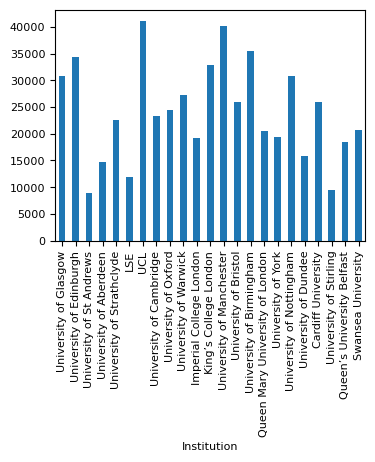

In [32]:
import pandas as pd

df = pd.read_csv('../data/universities.csv', sep=';')

# set institution as label so they automatically show up in plot
df2 = df.set_index(keys=['Institution'])
df2['Students'].plot(kind='bar')        # same as df2['Students'].plot.bar()

Alternatively, we can construct the graph using Matplotlib ourselves:

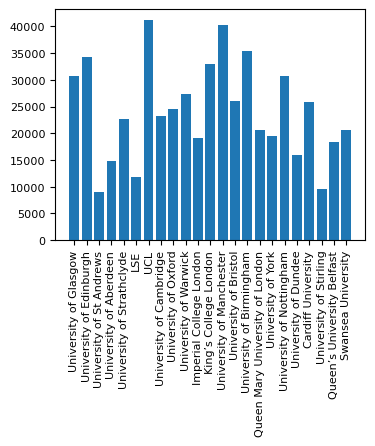

In [33]:
import matplotlib.pyplot as plt

labels = df['Institution'].to_list()        # labels as list
values = df['Students'].to_numpy()          # data as NumPy array
plt.bar(labels, values)
plt.tick_params(axis='x', labelrotation=90)

Sometimes Matplotlib's routines directly work with pandas's data structures,
sometimes they don't. In cases where they don't, we can convert a `DataFrame` or `Series` object
to a NumPy array using the `to_numpy()` method, and convert a `Series`
to a Python list using `to_list()`, as illustrated in the example above.


To plot timeseries-like data, we can use the `plot()` method,
which optionally accepts arguments to specify which columns
should be used for the $x$-axis and which for the $y$-axis:

<AxesSubplot:xlabel='A'>

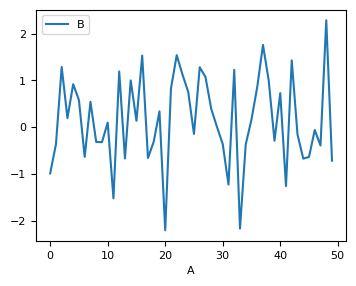

In [34]:
import numpy as np
import pandas as pd

# Instantiate RNG
rng = np.random.default_rng(123)

# Create pandas DataFrame
nobs = 50
df = pd.DataFrame({'A': np.arange(nobs), 'B': rng.normal(size=nobs)})

df.plot(x='A', y='B')       # plot A on x-axis, B on y-axis

To quickly generate some descriptive statistics, we can use
the built-in box plot:

<AxesSubplot:>

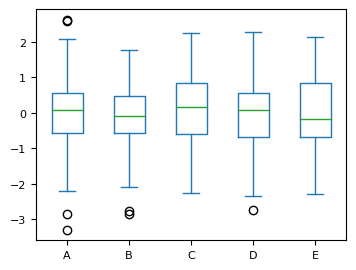

In [35]:
import numpy as np
import pandas as pd

# Instantiate RNG
rng = np.random.default_rng(123)

# Create pandas DataFrame
df = pd.DataFrame(rng.normal(size=(100, 5)),
                  columns=['A', 'B', 'C', 'D', 'E'])

df.plot.box()           # same as df.plot(kind='box')

Similarly, we can generate scatter plots, plotting one column
against another:

<AxesSubplot:xlabel='A', ylabel='E'>

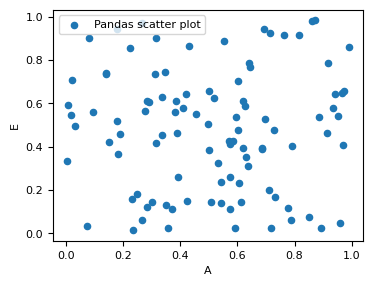

In [36]:
# Create pandas DataFrame
df = pd.DataFrame(rng.uniform(size=(100, 5)),
                  columns=['A', 'B', 'C', 'D', 'E'])

df.plot.scatter(x='A', y='E', label='Pandas scatter plot')

<AxesSubplot:xlabel='A', ylabel='E'>

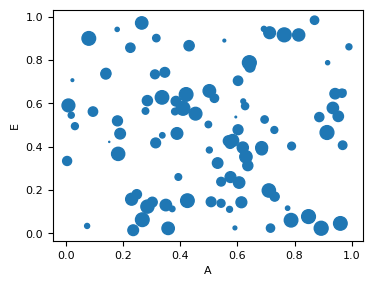

In [37]:
# We can even use a column to specify the dot size!
df.plot.scatter(x='A', y='E', s=df['B']*100.0)

In general, the wrappers implemented in pandas are useful to
get an idea how the data looks like. For reusable code or more
complex graphs, we'll usually want to directly use Matplotlib
and pass the data converted to NumPy arrays.

***
## Exercises

The following exercises use data files from the `data/` folder.

### Exercise 1: Basic data manipulations

In this exercise, we will perform some basic data manipulation and plot the results.

1.  Load the CSV file `FRED_QTR.csv` (using `sep=','`). 
    Set the columns `Year` and `Quarter` as (joint) indices.

    *Hint:* You can do this by specifying these column names in the `index_col` 
    argument of [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Alternatively, you can cell [`set_index()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html)
    once you have loaded the data.
2.  This data comes at a quarterly frequency. Convert it to annual values by computing
    the average values for each year.

    *Hint:* Group the data by `Year` using the [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) function and compute 
    the mean on the grouped data.
3.  Compute two new variables from the annualised data and add them to the `DataFrame`:
    -   `Inflation`, defined as the growth rate of `CPI` (consumer price index)
    -   `GDP_growth`, defined as the growth rate of `GDP`
4.  Drop all rows with missing values (these show up as `NaN`).

    *Hint:* There is no need to manually filter out `NaN` values, you can 
    use the [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) method instead.
5.  Plot the columns `GDP_growth`, `Inflation`, `UNRATE` (unemployment rate)
    and `LFPART` (labour force participation) using the pandas plotting routines.
    Use the option `subplots=True` and `layout=(2,2)` to create a $2\times2$ grid.
    See the documentation for [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) for details.

### Exercise 2: Decade averages

Load the FRED data from the CSV file `FRED_QTR.csv` (using `sep=','`) and 
perform the following tasks:

1.  Compute the quarterly GDP growth rate and inflation, similar to what you 
    did in the previous exercise.
2.  Add the column `Decade` which contains the decade for every observation.
    Use 1940 to code the 40s, 1950 for the 50s, etc.
3.  We want to retain only observations for decades for which all 40 quarters
    are present:
    1.  Group the data by `Decade` and count the number of observations using 
        [`count()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html).
    2.  A decade should be kept in the data set only if *all* variables
        have the full 40 observations.
    3.  Drop all observations for which this is not the case.
4.  With the remaining observations, compute the decade averages for quarterly 
    GDP growth, inflation and the unemployment rate (`UNRATE`). Annualise the
    GDP growth and inflation figures by multiplying them by 4.
5.  Create a bar chart that plots these three variables by decade.

### Exercise 3: Group averages

Load the universities data from the CSV file `universities.csv` (using `sep=';'`) and perform the following tasks:

1.  Group the data by Russell Group membership using the indicator variable `Russell`.
    For each group, compute the averages of the following ratios using 
    [`apply()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.apply.html):
    
    -   The ratio of academic staff (`Staff`) to students (`Students`)
    -   The ratio of administrative staff (`Admin`) to students.
    -   The budget (`Budget`) per student in pounds.

    Additionally, compute the number of universities is each group.

2.  Repeat the task using a different approach:

    1.  Compute the above ratios and add them as new columns to the initial
        `DataFrame`.
    2.  Group the data by Russell Group membership.
    3.  Compute the mean of each ratio using [`mean()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.mean.html).
    4.  Compute the number of universities in each group using `count()`, and 
        store the result in the column `Count` in the `DataFrame` you obtained in 
        the previous step.

3.  Create a bar chart, plotting the value for universities in and outside of 
    the Russell Group for each of the four statistics computed above.

### Exercise 4: Grouping by multiple dimensions

Load the universities data from the CSV file `universities.csv` (using `sep=';'`) and perform the following tasks:

1.  Create an indicator `Pre1800` which is `True` for universities founded 
    before the year 1800.
2.  Group the data by `Country` and the value of `Pre1800`.

    *Hint:* You need to pass a list of column names to [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).
3.  Compute the number of universities for each combination of `(Country, Pre1800)`.
4.  Create a bar chart showing the number of pre- and post-1800 universities
    by country (i.e. create four groups of bars, each group showing 
    one bar for pre- and one for post-1800).
5.  Create a bar chart showing the number of universities by country
    by pre- and post-1800 period (i.e. create two groups of bars, each 
    group showing four bars, one for each country.)

### Exercise 5: Okun's law (advanced)

In this exercise, we will estimate [Okun's law](https://en.wikipedia.org/wiki/Okun%27s_law) on quarterly data for each of the last eight decades.

Okun's law relates unemployment to the output gap. One version (see Jones: Macroeconomics, 2019) is stated as follows:
$$
u_t - \overline{u}_{t} = 
\alpha + \beta \left(\frac{Y_t - \overline{Y}_t}{\overline{Y}_t}\right)
$$
where $u_t$ is the unemployment rate, $\overline{u}_{t}$ is the natural rate of 
unemployment, $Y_t$ is output (GDP) and $\overline{Y}_{t}$ is potential output. 
We will refer to $u_t-\overline{u}_{t}$ as "cyclical unemployment" and to the term in 
parenthesis on the right-hand side as the "output gap." Okun's law says that 
the coefficient $\beta$ is negative, i.e. cyclical unemployment is 
higher when the output gap is low (negative) because the economy 
is in a recession.

Load the FRED data from the CSV file `FRED_QTR.csv` (using `sep=','`) and 
perform the following tasks:

1.  Compute the output gap and cyclical unemployment rate as defined above and 
    add them as columns to the `DataFrame`.
2.  Assign each observation to a decade as you did in previous exercises.
3.  Write a function `regress_okun()` which accepts a `DataFrame` 
    containing a decade-spefic 
    sub-sample as the only argument, and estimates the coefficients 
    $\alpha$ (the intercept) and $\beta$ (the slope) of the above regression
    equation.

    This function should return a `DataFrame` of a single row and two
    columns which store the intercept and slope.

    *Hint:* Use NumPy's [`lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html)
    to perform the regression. To regress the dependent
    variable `y` on regressors `X`, you need to call `lstsq(X, y)`.
    To include the intercept, you will manually have to create `X` such that the 
    first column contains only ones.
4.  Group the data by decade and call the [`apply()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.apply.html) method, passing 
    `regress_okun` you wrote as the argument.
5.  Plot your results: for each decade, create a scatter plot of the raw 
    data and overlay it with the regression line you estimated.

***
## Solutions

These solutions illustrate *one* possible way to solve the 
exercises. Pandas is extremely flexible (maybe too flexible)
and allows us to perform these tasks in many different ways, so 
your implementation might look very different.

The solutions are also provided as Python scripts in the [lectures/solutions/unit07/](../lectures/solutions/unit07) folder.

### Solution for exercise 1

One possible implementation looks as follows:

array([[<AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>]],
      dtype=object)

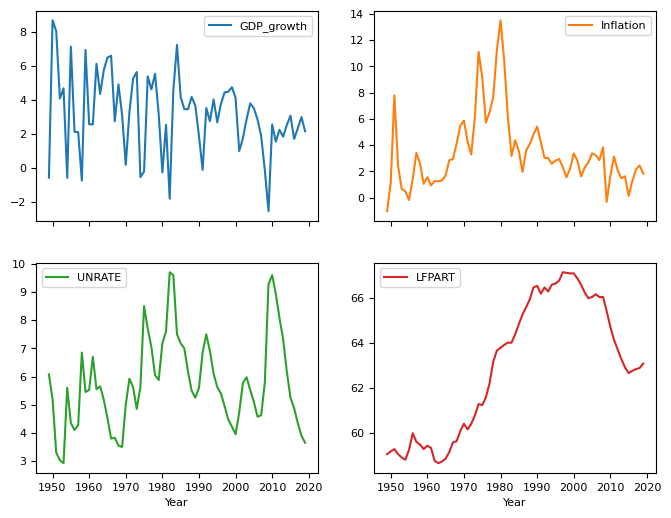

In [53]:
import pandas as pd

filepath = '../data/FRED_QTR.csv'

df = pd.read_csv(filepath, sep=',', index_col=['Year', 'Quarter'])
# Alternatively, set index columns later
# df = pd.read_csv(filepath, sep=',')
# df.set_index(keys=['Year', 'Quarter'], inplace=True)

# Convert to annual frequency
# Group by year
grp = df.groupby(['Year'])
# Compute annual data as mean of quarterly values
df_year = grp.mean()

# Alternative ways to perform the same aggregation:
# df_year = grp.agg('mean')
# df_year = grp.agg(np.mean)

# Compute CPI and GDP growth rates (in percent)
df_year['Inflation'] = df_year['CPI'].diff() / df_year['CPI'].shift() * 100.0
df_year['GDP_growth'] = df_year['GDP'].diff() / df_year['GDP'].shift() * 100.0

# Drop all rows that contain any NaNs
df_year = df_year.dropna(axis=0)

# Columns to plot
varnames = ['GDP_growth', 'Inflation', 'UNRATE', 'LFPART']
df_year.plot.line(y=varnames, subplots=True, layout=(2, 2),  
                  sharex=True, figsize=(8, 6))
                
# Alternatively, we can call plot() directly, which
# defaults to generating a line plot:
#
# df_year.plot(y=varnames, subplots=True, layout=(2, 2),  
#              sharex=True, figsize=(10, 10))


A few comments:

1.  We can set the index column when loading a CSV file by
    passing the column names as `index_col`:

        df = pd.read_csv(filepath, sep=',', index_col=['Year', 'Quarter'])

    Alternatively, we can first load the CSV file and set the index later:

        df = pd.read_csv(filepath, sep=',')
        df.set_index(keys=['Year', 'Quarter'], inplace=True)
2.  There are several ways to compute the means of grouped data:
    1.  We can call `mean()` on the group object directly:

            df_year = grp.mean()
    
    2.  Alternatively, we can call `agg()` and pass it the aggregation
        routine that should be applied:

            df_year = grp.agg('mean')
            df_year = grp.agg(np.mean)

        Here we again have multiple options: pandas understands `'mean'` if
        passed as a string (which might not be the case for some other functions),
        or we pass an actual function such as `np.mean`.
3.  The easiest way to compute differences between adjacent rows is
    to use the [`diff()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html) method, which returns $x_t - x_{t-1}$.
    Pandas then automatically matches the correct
    values and sets the first observation to `NaN` as there is no preceding value to 
    compute the difference.

    To compute a growth rate $(x_t - x_{t-1})/x_{t-1}$, we additionally need to
    lag a variable to get the correct period in the denominator. In pandas this 
    is achieved using the [`shift()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html) method (which defaults to shifting 
    by 1 period).
            

### Solution for exercise 2

This time we do not specify `index_cols` when reading in the CSV
data since we need `Year` as a regular variable, not as the index.

We then compute the decade for each year, using the fact that 
`//` performs division with integer truncation. As an example, 
1951 // 10 is 195, and (1951 // 10) * 10 = 1950, 
which we use to represent the 1950s.

In [39]:
import pandas as pd 

filepath = '../data/FRED_QTR.csv'

df = pd.read_csv(filepath, sep=',')

# Compute GDP growth rates, inflation (in percent)
df['GDP_growth'] = df['GDP'].diff() / df['GDP'].shift() * 100.0
df['Inflation'] = df['CPI'].diff() / df['CPI'].shift() * 100.0

# Assign decade using // to truncate division to
# integer part. So we have 194x // 10 = 194 for any x.
df['Decade'] = (df['Year'] // 10) * 10

grp = df.groupby(['Decade'])

# Print number of obs. by decade
print(grp.count())

# Create series that contains True for each
# decade if all variables have 40 observations.
use_decade = (grp.count() == 40).all(axis=1)
# Convert series to DataFrame, assign column name 'Keep'
df_decade = use_decade.to_frame('Keep')
# merge into original DataFrame, matching rows on value
# of column 'Decade'
df = df.merge(df_decade, on='Decade')
# Restrict data only to rows which are part of complete decade
df = df.loc[df['Keep'], :].copy()
# Drop 'Keep' column
del df['Keep']

# Compute average growth rates and unemployment rate by decade
grp = df.groupby(['Decade'])

df_avg = grp[['GDP_growth', 'Inflation', 'UNRATE']].mean()
# Convert to (approximate) annualised growth rates
df_avg['GDP_growth'] *= 4.0
df_avg['Inflation'] *= 4.0

        Year  Quarter  GDP  CPI  UNRATE  LFPART  GDPPOT  NROU  GDP_growth  \
Decade                                                                      
1940       8        8    8    8       8       8       4     4           7   
1950      40       40   40   40      40      40      40    40          40   
1960      40       40   40   40      40      40      40    40          40   
1970      40       40   40   40      40      40      40    40          40   
1980      40       40   40   40      40      40      40    40          40   
1990      40       40   40   40      40      40      40    40          40   
2000      40       40   40   40      40      40      40    40          40   
2010      40       40   40   40      40      40      40    40          40   

        Inflation  
Decade             
1940            7  
1950           40  
1960           40  
1970           40  
1980           40  
1990           40  
2000           40  
2010           40  


The tricky part is to keep only observations for "complete"
decades that have 40 quarters of data. We see that this 
is not the case for the 1940s:

1.  We group by `Decade` and use `count()` to determine
    the number of non-missing observations for each variable.
2.  `count() == 40` evaluates to `True` for some variable 
    if it has 40 observations.
3.  We then use [`all()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.all.html) to aggregate across all variables,
    i.e. we require 40 observations for every variable to
    keep the decade.
4.  Finally, we merge the indicator whether a decade should be kept in 
    the data set using [`merge()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html), where we match on the value 
    of the column `Decade`. Note that the argument to `merge()` must 
    be a `DataFrame`, so we first have to convert our indicator data.
5.  Finally, we keep only those observations which have a flag that is `True`.

The rest of the exercise is straightforward as it just repeats 
what we have done previously. You can create the bar chart directly with
pandas as follows:

<AxesSubplot:xlabel='Decade'>

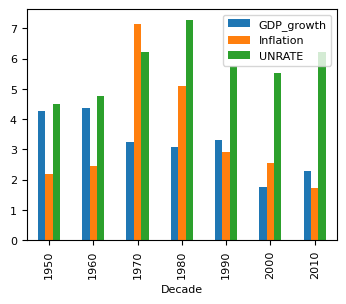

In [40]:
df_avg.plot.bar(y=['GDP_growth', 'Inflation', 'UNRATE'])

### Solution for exercise 3

We first read in the CSV file, specifying `';'` as the field 
separator:

In [41]:
import pandas as pd

# Load CSV file
filepath = '../data/universities.csv'
df = pd.read_csv(filepath, sep=';')

For the first task we use `apply()` to create a 
new `Series` object for each ratio of interest.

We compute the ratios for each institution
which will result in NaNs if either the numerator
of denominator is missing. We thus use `np.nanmean()`
to compute averages, ignoring any NaNs.

Finally, we combine all `Series` into a `DataFrame`.
We do this by specifying the data passed to 
`DataFrame()` as a dictionary, since then 
we can specify the column names as keys.

In [42]:
# Variant 1
# Compute means using apply()

grp = df.groupby(['Russell'])

# Create Series objects with the desired means
staff = grp.apply(lambda x: np.nanmean(x['Staff'] / x['Students']))
admin = grp.apply(lambda x: np.nanmean(x['Admin'] / x['Students']))
# Budget in millions of pounds
budget = grp.apply(lambda x: np.nanmean(x['Budget'] / x['Students']))
# Convert to pounds
budget *= 1.0e6
# Count number of institutions in each group.
# We can accomplish this by calling size() on the group object.
count = grp.size()

# Create a new DataFrame. Each column is a Series object.
df_all = pd.DataFrame({'Staff_Student': staff,
                       'Admin_Student': admin,
                       'Budget_Student': budget,
                       'Count': count})

df_all

,Staff_Student,Admin_Student,Budget_Student,Count
Russell,,,,
0,0.096219,0.147762,16847.834366,6
1,0.155131,0.169079,35406.453649,17


For the second task, we first insert additional columns
which contain the ratios of interest for each 
university.

We then drop all unused columns, group by the `Russell`
indicator and compute the means by directly 
calling `mean()` on the group object.

In [43]:
# Variant 2:
# Compute ratios first, apply aggregation later

# Create new variables directly in original DataFrame
df['Staff_Student'] = df['Staff'] / df['Students']
df['Admin_Student'] = df['Admin'] / df['Students']
# Budget in pounds (original Budget is in million pounds)
df['Budget_Student'] = df['Budget'] / df['Students'] * 1.0e6

# Keep only newly constructed ratios
columns_keep = [name for name in df.columns
                if name.endswith('_Student')]
# Also keep Russell indicator
columns_keep += ['Russell']
df = df[columns_keep].copy()

# Aggregate by Russell indicator
grp = df.groupby(['Russell'])
# Count number of institutions in each group.
# We can accomplish this by calling size() on the group object.
count = grp.size()

df_all = grp.mean()
# Add counter
df_all['Count'] = count

df_all

,Staff_Student,Admin_Student,Budget_Student,Count
Russell,,,,
0,0.096219,0.147762,16847.834366,6
1,0.155131,0.169079,35406.453649,17


We plot the results using pandas's `bar()` function.
Since the data is of vastly different magnitudes, we 
specify `sharey=False` so that each panel will have 
its own scaling on the $y$-axis.

array([[<AxesSubplot:title={'center':'Staff/Student'}, xlabel='Russell'>,
        <AxesSubplot:title={'center':'Admin/Student'}, xlabel='Russell'>],
       [<AxesSubplot:title={'center':'Budget/Student'}, xlabel='Russell'>,
        <AxesSubplot:title={'center':'Number of Univ.'}, xlabel='Russell'>]],
      dtype=object)

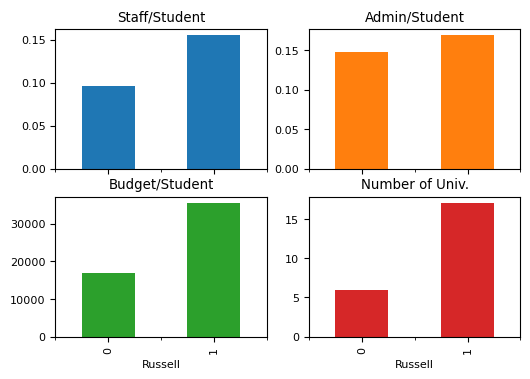

In [55]:
# Plot results as bar charts, one panel for each variable

# Pretty titles
title = ['Staff/Student', 'Admin/Student', 'Budget/Student', 'Number of Univ.']
# Create bar chart using pandas's bar() function
df_all.plot.bar(sharey=False, subplots=True, layout=(2, 2), legend=False,
                title=title, figsize=(6, 4))

### Solution for exercise 4

We create an indicator variable called `Pre1800` which
is set to `True` whenever the founding year in column
`Founded` is lower than 1800.

We then group the data by `Country` and `Pre1800` and 
count the number of universities in each group using 
`count()`.

In [45]:
import pandas as pd

# Load CSV file
filepath = '../data/universities.csv'
df = pd.read_csv(filepath, sep=';')

# Create mask for founding period
df['Pre1800'] = (df['Founded'] < 1800)

# Create group by country and founding period;
grp = df.groupby(['Country', 'Pre1800'])

# Number of universities by country and founding period.
# Since we are grouping by two attributes, this will create a
# Series with a multi-level (hierarchical) index
count = grp.size()

count

Country           Pre1800
England           False      8
                  True       5
Northern Ireland  False      1
Scotland          False      3
                  True       4
Wales             False      2
dtype: int64

The resulting `Series` only contains values for 
those combinations that are actually present in the data.
For example, the combination `(Wales, True)` does 
not show up because there are no Welsh universities
founded before 1800 in our sample. We will have to 
"complete" the data and add zero entries in all such cases.

First, we create a `DataFrame` with countries in rows and the number 
of universities for the pre- and post-1800 periods in columns.
To accomplish this, we need to pivot the second row index
using the [`unstack()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html) method. The `level=-1`
argument tells it to use the last row index, and `fill_value=0`
will assign zeros to all elements that were not present in the 
initial `DataFrame`, such as the combination `(Wales, True)`.

In [46]:
# DataFrame with countries in rows, Pre-1800 indicator in columns

# Pivot inner index level to create separate columns for True/False
# values of Pre1800 indicator
df_count = count.unstack(level=-1, fill_value=0)

# Set name of column index to something pretty: this will
# be used as the legend title
df_count.columns.rename('Founding year', inplace=True)
# Rename columns to get pretty labels in legend
df_count.rename(columns={True: 'Before 1800', False: 'After 1800'},
                inplace=True)

df_count

Founding year,After 1800,Before 1800
Country,,
England,8,5
Northern Ireland,1,0
Scotland,3,4
Wales,2,0


Whenever we use pandas's built-in plotting functions,
these use index names and labels to automatically 
label the graph. We therefore first have 
to assign these objects "pretty" names.

We can then generate the bar chart as follows:

<AxesSubplot:title={'center':'Number of universities by founding year'}, xlabel='Country'>

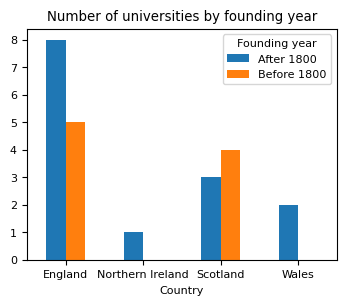

In [47]:
# Create bar chart by country
title = 'Number of universities by founding year'
# pass rot=0 to undo the rotation of x-tick labels
# which pandas applies by default
df_count.plot.bar(xlabel='Country', rot=0, title=title)

Note how the legend title is automatically set to the column index name 
and the legend labels use the column index labels.

We create the second `DataFrame` with the founding 
period in rows and country names in columns
in exactly the same way, but now call
`unstack(level=0)` so that the first index level 
will be pivoted.

In [48]:
# Pivot first row index level to create separate columns for each country
df_count = count.unstack(level=0, fill_value=0)

# Set index name to something pretty
df_count.index.rename('Founding year', inplace=True)
# Rename index labels to get pretty text in legend
df_count.rename(index={True: 'Before 1800', False: 'After 1800'},
                inplace=True)

df_count

Country,England,Northern Ireland,Scotland,Wales
Founding year,,,,
After 1800,8,1,3,2
Before 1800,5,0,4,0


<AxesSubplot:title={'center':'Number of universities by founding year'}, xlabel='Founding year'>

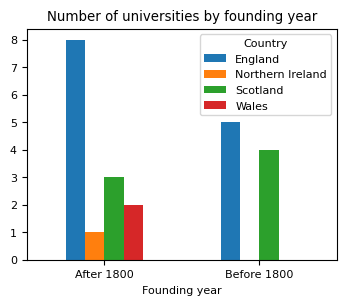

In [49]:
# Create bar chart by founding year
# pass rot=0 to undo the rotation of x-tick labels
# which pandas applies by default
df_count.plot.bar(rot=0, title=title)

### Solution for exercise 5

This exercise is quite involved, so we will discuss it in parts. 
First, we write the function that will be called by `apply()` to
process sub-sets of the data which belong to a single decade:

In [50]:
def regress_okun(x):
    # x is a DataFrame, restricted to rows for the current decade

    # Extract dependent and regressor variables
    outcome = x['unempl_gap'].to_numpy()
    GDP_gap = x['GDP_gap'].to_numpy()

    # Regressor matrix including intercept
    regr = np.ones((len(GDP_gap), 2))
    # overwrite second column with output gap
    regr[:,1] = GDP_gap

    # Solve least-squares problem (pass rcond=None to avoid a warning)
    coefs, *rest = np.linalg.lstsq(regr, outcome, rcond=None)

    # Construct DataFrame which will be returned to apply()
    # Convert data to 1 x 2 matrix
    data = coefs[None]
    columns = ['Const', 'GDP_gap']
    df_out = pd.DataFrame(data, columns=columns)

    return df_out

This function is passed in a single argument which is a 
`DataFrame` restricted to the sub-sample that is currently
being processed.

-   Our task is to perform the required calculations
    and to return the result as a `DataFrame`. `apply()`
    then glues together all decade-specific DataFrames 
    to form the result of the operation.
-   We first extract the relevant variables as NumPy arrays,
    and we create a regressor matrix which has ones in
    the first column. This column represents the intercept.
-   We invoke `lstsq()` to run the regression. `lstsq()`
    returns several arguments which we mop up in the tuple 
    `*rest` since we are only interested in the regression 
    coefficients.

    Note that we wouldn't be using `lstsq()` to run OLS 
    on a regular basis, but it's sufficient for this use case.
    
-   Finally, we build the `DataFrame` to be returned 
    by this function. It has only one row (since we ran
    only one regression) and two columns, one for each 
    regression coefficient.

This was the hard part. We now need to perform some standard 
manipulations to prepare the data:

1.  We construct the output gap (in percent), which 
    we store in the column `GDP_gap`.
2.  We construct the cyclical unemployment rate and 
    store it in the column `unempl_gap`.
3.  We determine the decade each observation belongs
    to using the same code as in previous 
    exercises.
4.  We then drop all unused variables from the `DataFrame`
    and also all observations which contain missing values.

Lastly, we can call `apply()` to run the regression for 
each decade.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV file
filepath = '../data/FRED_QTR.csv'
df = pd.read_csv(filepath, sep=',')

# Generate output gap (in percent)
df['GDP_gap'] = (df['GDP'] - df['GDPPOT']) / df['GDPPOT'] * 100.0

# Generate deviations of unempl. rate from natural unempl. rate
df['unempl_gap'] = df['UNRATE'] - df['NROU']

# Assign decade using // to truncate division to
# integer part. So we have 194x // 10 = 194 for any x.
df['Decade'] = (df['Year'] // 10) * 10

# Keep only variables of interest
df = df[['Decade', 'GDP_gap', 'unempl_gap']]
# Drop rows with any missing obs.
df = df.dropna(axis=0)

# Group by decade
grp = df.groupby(['Decade'])

# Apply regression routine to sub-set of data for each decade
df_reg = grp.apply(regress_okun)
# Get rid of second row index introduced by apply()
df_reg = df_reg.reset_index(level=-1, drop=True)

# Display intercept and slope coefficients
# estimated for each decade.
df_reg



,Const,GDP_gap
Decade,,
1940,-0.259986,-0.567257
1950,-0.277104,-0.494637
1960,-0.331665,-0.467206
1970,-0.032063,-0.398751
1980,-0.178001,-0.666688
1990,-0.102465,-0.489427
2000,-0.355138,-0.723567
2010,-0.279333,-0.983768


The following code creates 8 panels of scatter plots showing
the raw data and overlays a regression line for each decade.

Text(0.5, 0.98, "Okun's law")

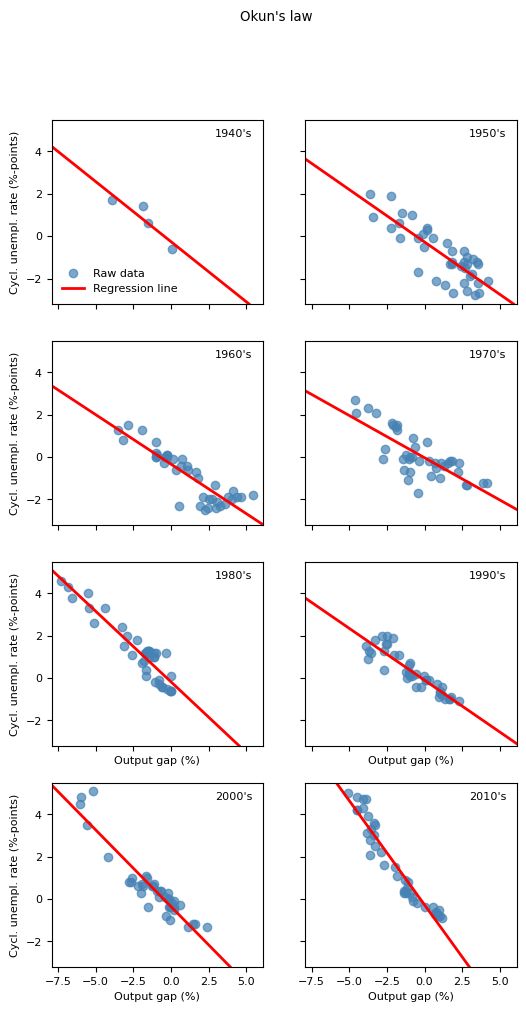

In [52]:
# Number of plots (= number of decades)
Nplots = len(df_reg)

# Fix number of columns, determine rows as needed
ncol = 2
nrow = int(np.ceil(Nplots / ncol))

fig, axes = plt.subplots(nrow, ncol, sharey=True, sharex=True, 
                         figsize=(6, 11))

for i, ax in enumerate(axes.flatten()):
    
    # decade in current iteration
    decade = df_reg.index.values[i]
    # restrict DataFrame to decade-specific data
    dfi = df.loc[df['Decade'] == decade]
    # Scatter plot of raw data
    ax.scatter(dfi['GDP_gap'], dfi['unempl_gap'], color='steelblue',
               alpha=0.7, label='Raw data')
    # Extract regression coefficients
    const = df_reg.loc[decade, 'Const']
    slope = df_reg.loc[decade, 'GDP_gap']

    # plot regression line:
    # We need to provide one point and a slope to define the line to be plotted.
    ax.axline((0.0, const), slope=slope, color='red',
              lw=2.0, label='Regression line')

    # Add label containing the current decade
    ax.text(0.95, 0.95, f"{decade}'s", transform=ax.transAxes,
            va='top', ha='right')

    # Add legend in the first panel only
    if i == 0:
        ax.legend(loc='lower left', frameon=False)

    # Add x- and y-labels, but only for those panels
    # that are on the left/lower boundary of the figure
    if i >= nrow * (ncol - 1):
        ax.set_xlabel('Output gap (%)')
    if (i % ncol) == 0:
        ax.set_ylabel('Cycl. unempl. rate (%-points)')

fig.suptitle("Okun's law")

# Data input and output

In this unit we discuss input and output,
or I/O for short. We focus exclusively on I/O
routines used to load and store data from files that are relevant
for numerical computation and data analysis.

## I/O with NumPy

### Loading text data

We have already encountered the most basic, and probably most frequently used
NumPy I/O routine, `np.loadtxt()`.
We often use files that store data
as text files containing character-separated values (CSV) since virtually
any application supports this data format.
The most important I/O functions to process text data are:

-   [`np.loadtxt()`](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html):     load data from a text file.
-   [`np.genfromtxt()`](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html): 
    load data from a text file and handle missing data.
-   [`np.savetxt()`](https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html): 
    save a NumPy array to a text file.

There are a few other I/O functions in NumPy, for example to
write arrays as raw binary data.
We won't cover them here, but you can find them in the
[official documentation](https://numpy.org/doc/stable/reference/routines.io.html).

Imagine we have the following tabular data from [FRED](https://fred.stlouisfed.org/), where the first two rows
look as follows:

| Year |  GDP   |  CPI | UNRATE |
| ---- | ------ | ---- | ------ |
| 1948 | 2118.5 | 24.0 | 3.8    |
| 1949 | 2106.6 | 23.8 | 6.0    |

To load this CSV file as a NumPy array, we use `loadtxt()`:

In [1]:
import numpy as np

# relative path to CSV file
file = '../data/FRED.csv'

# load CSV
data = np.loadtxt(file, skiprows=1, delimiter=',')
data[:2]        # Display first two rows

array([[1948. , 2118.5,   24. ,    3.8],
       [1949. , 2106.6,   23.8,    6. ]])

The default settings will in many cases be appropriate to load
whatever CSV file we might have. However, we'll occasionally
want to specify the following arguments to override the defaults:

-   `delimiter`: Character used to separate individual fields (default: space).
-   `skiprows=n`: Skip the first `n` rows. For example, if the CSV file
    contains a header with variable names, `skiprows=1` needs to be
    specified as NumPy by default cannot process these names.
-   `dtype`: Enforce a particular data type for the resulting array.
-   `encoding`: Set the character encoding of the input data. This
    is usually not needed, but can be required to import data
    with non-latin characters that are not encoded using Unicode.

While `loadtxt()` is simple to use, it quickly reaches its limits
with more complex data sets.
For example, when we try to load our sample of universities with
`loadtxt()`, we get the following error:

In [2]:
import numpy as np

file = '../data/universities.csv'

# Try to load CSV data that contains strings
# This will result in an error!
data = np.loadtxt(file, delimiter=';', skiprows=1)

ValueError: could not convert string to float: '"University of Glasgow"'

This code fails for two reasons:

1.  The file contains strings and floats, and `loadtxt()` by default
    cannot load mixed data.
2.  There are missing values (empty fields), which `loadtxt()` cannot
    handle either.

We can address the first issue by creating a so-called
[structured array](https://numpy.org/doc/stable/user/basics.rec.html),
i.e., an array that contains fields with mixed data.
This is accomplished by constructing a special `dtype` object that
specifies the field names and their data types:

In [3]:
# Define names and data types for fields in CSV file
#   Data types are defined using two tokens:
#       1.  The main data type (U: unicode string, f: float, i: integer)
#       2.  The precision or field width
dtypes = np.dtype([('Institution', 'U30'),      # unicode string of length 30
                   ('Country', 'U20'),          # unicode string of length 20
                   ('Founded', 'i4'),           # integer, 4 bytes
                   ('Students', 'i4'),
                   ('Staff', 'i4'),
                   ('Admin', 'i4'),
                   ('Budget', 'f8'),            # float, 8 bytes
                   ('Russell', 'i1')])          # integer, 1 byte

data = np.loadtxt(file, delimiter=';', skiprows=1, dtype=dtypes)

ValueError: could not convert string to float: ''

However, this still fails because the of a few missing values.

We can get around this by using `genfromtxt()`, which is
more flexible and can also deal with missing data:

In [4]:
# load data using genfromtxt()
# We still need to specify the dtype defined above!
data = np.genfromtxt(file, delimiter=';', dtype=dtypes, encoding='utf8',
                     skip_header=1)

# Determine rows with missing data:
#   - missing integers are coded as -1
#   - missing floats are coded as np.nan
missing = (data['Staff'] < 0) | (data['Admin'] < 0) | np.isnan(data['Budget'])

# print rows with missing values
data[missing]

array([('"University of Strathclyde"', '"Scotland"', 1964, 22640,   -1, 3200,  304.4, 0),
       ('"University of Oxford"', '"England"', 1096, 24515, 7000,   -1, 2450. , 1),
       ('"University of Manchester"', '"England"', 2004, 40250, 3849,   -1, 1095.4, 1),
       ('"University of Birmingham"', '"England"', 1825, 35445, 4020,   -1,  673.8, 1),
       ('"University of Nottingham"', '"England"', 1798, 30798, 3495,   -1,  656.5, 1),
       ('"University of Stirling"', '"Scotland"', 1967,  9548,   -1, 1872,  113.3, 0),
       ('"Swansea University"', '"Wales"', 1920, 20620,   -1, 3290,    nan, 0)],
      dtype=[('Institution', '<U30'), ('Country', '<U20'), ('Founded', '<i4'), ('Students', '<i4'), ('Staff', '<i4'), ('Admin', '<i4'), ('Budget', '<f8'), ('Russell', 'i1')])

While the CSV file can now be processed without errors, you see that
NumPy does not remove the double quotes around strings such as the
university names.
Instead of trying to fix this, it is advisable to just use pandas to
load this kind of data which handles all these problems automatically.
We examine this alternative below.

### Saving data to text files

To save a NumPy array to a CSV file, there is a logical counterpart
to `np.loadtxt()` which is called `np.savetxt()`.

In [5]:
import numpy as np
import os.path
import tempfile

# Generate some random data on [0,1)
data = np.random.default_rng(123).random(size=(10, 5))

# create temporary directory
d = tempfile.TemporaryDirectory()

# path to CSV file
file = os.path.join(d.name, 'data.csv')

# Print destination file - this will be different each time
print(f'Saving CSV file to {file}')

# Write NumPy array to CSV file. The fmt argument specifies
# that data should be saved as floating-point using a
# field width of 8 characters and 5 decimal digits.
np.savetxt(file, data, delimiter=';', fmt='%8.5f')

Saving CSV file to /tmp/tmpzig6ff3q/data.csv


The above code creates a $10 \times 5$ matrix of random floats
and stores these in the file `data.csv` using 5 significant digits.

We store the destination file in a temporary directory which
we create as follows:

-   Because we cannot know in advance on which system this code
    is run (e.g. the operating system and directory layout),
    we cannot hard-code a file path.
-   Moreover, we do not know whether the code is run with write
    permissions in any particular folder.
-   We work around this issue by asking the Python runtime to
    create a writeable temporary directory *for the system
    where the code is being run*.
-   We use the routines in the 
    [`tempfile`](https://docs.python.org/3/library/tempfile.html) 
    module to create this temporary directory.

Of course, on your own computer you do not need to use a temporary
directory, but can instead use any directory where
your user has write permissions. For example, on Windows you
could use something along the lines of

    file = 'C:/Users/Path/to/file.txt'
    np.savetxt(file, data, delimiter=';', fmt='%8.5f')

You can even use relative paths. To store a file in the 
current working directory it is sufficient to just 
pass the file name:

    file = 'file.txt'
    np.savetxt(file, data, delimiter=';', fmt='%8.5f')

***
## I/O with pandas

Pandas's I/O routines are more powerful than those implemented in NumPy:

-   They support reading and writing numerous file formats.
-   They support heterogeneous data without having to specify
    the data type in advance.
-   They gracefully handle missing values.

For these reasons, it is often preferable to directly use pandas to
process data instead of NumPy.

The most important routines are:

-   [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), 
    [`to_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html): 
    Read or write CSV text files
-   [`read_fwf()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_fwf.html): 
    Read data with fixed field widths, i.e. text data
    that does not use delimiters to separate fields.
-   [`read_excel()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html), 
    [`to_excel()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html): 
    Read or write Excel spreadsheets
-   [`read_stata()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_stata.html), 
    [`to_stata()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_stata.html): 
    Read or write Stata's `.dta` files.

For a complete list of I/O routines, see the [official documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

To illustrate, we repeat the above examples using pandas's
`read_csv()`. Since the FRED data contains only floating-point
data, the result is very similar to reading in a NumPy array.

In [6]:
import pandas as pd

# relative path to CSV file
file = '../data/FRED.csv'

df = pd.read_csv(file, sep=',')
df.head(2)          # Display the first 2 rows of data

,Year,GDP,CPI,UNRATE
0,1948,2118.5,24.0,3.8
1,1949,2106.6,23.8,6.0


The difference between NumPy and pandas become obvious when we
try to load our university data: this works out of the box,
without the need to specify any data types or to handle missing values:

In [7]:
import pandas as pd

# relative path to CSV file
file = '../data/universities.csv'

df = pd.read_csv(file, sep=';')
df.tail(3)      # show last 3 rows

,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell
20,University of Stirling,Scotland,1967,9548,NaN,1872.0,113.3,0
21,Queen’s University Belfast,Northern Ireland,1810,18438,2414.0,1489.0,369.2,1
22,Swansea University,Wales,1920,20620,NaN,3290.0,NaN,0


Note that missing values are correctly converted to `np.nan` and
the double quotes surrounding strings are automatically removed!


Unlike NumPy, pandas can also process other popular data formats
such as MS Excel files (or OpenDocument spreadsheets):

In [8]:
import pandas as pd

# Excel file containing university data
file = '../data/universities.xlsx'

df = pd.read_excel(file, sheet_name='universities')
df.head(3)

,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell
0,University of Glasgow,Scotland,1451,30805,2942.0,4003.0,626.5,1
1,University of Edinburgh,Scotland,1583,34275,4589.0,6107.0,1102.0,1
2,University of St Andrews,Scotland,1413,8984,1137.0,1576.0,251.2,0


The routine `read_excel()` takes the argument `sheet_name` to
specify the sheet that should be read.

-   Note that the Python package 
    [`openpyxl`](https://pypi.org/project/openpyxl/) 
    needs to be installed in order
    to read files from Excel 2003 and above.
-   To read older Excel files (`.xls`), you need the package 
    [`xlrd`](https://pypi.org/project/xlrd/).

Finally, we often encounter text files with fixed field widths,
since this is a commonly used format in older applications
(for example, fixed-width files are easy to create in Fortran).
To illustrate, the fixed-width variant of our FRED data looks like this:
```
 Year GDP    CPI  UNRATE
 1948 2118.5   24     3.8
 1949 2106.6 23.8       6
 1950 2289.5 24.1     5.2
 1951 2473.8   26     3.3
 1952 2574.9 26.6       3
```
You see that the column `Year` occupies the first 5
characters, the `GDP` column the next 7 characters, and so on.
To read such files, the width (i.e., the number of characters)
has to be explicitly specified:

In [9]:
import pandas as pd

# File name of FRED data, stored as fixed-width text
file = '../data/FRED-fixed.csv'

# field widths are passed as list to read_fwf()
df = pd.read_fwf(file, widths=[5, 7, 5, 8])
df.head(3)

,Year,GDP,CPI,UNRATE
0,1948,2118.5,24.0,3.8
1,1949,2106.6,23.8,6.0
2,1950,2289.5,24.1,5.2


Here the `widths` argument accepts a list that contains the
number of characters to be used for each field.

***
## Pickling

A wholly different approach to data I/O is taken by Python's
built-in [`pickle`](https://docs.python.org/3/library/pickle.html)
module.
Almost any Python object can be
dumped into a binary file and read back using `pickle.dump()`
and `pickle.load()`.

The big advantage over other methods
is that hierarchies of objects are automatically supported.
For example, we can pickle a list containing a `tuple`, a string and a NumPy array:

In [10]:
import numpy as np
import pickle
import tempfile
import os.path

# Generate 2d array of integers
arr = np.arange(10).reshape((2, -1))
tpl = (1, 2, 3)
text = 'Pickle is very powerful!'

# data: several nested containers and strings
data = [tpl, text, arr]

# create temporary directory
d = tempfile.TemporaryDirectory()
# Binary destination file
file = os.path.join(d.name, 'data.bin')

# print destination file path
print(f'Pickled data written to {file}')

with open(file, 'wb') as f:
    pickle.dump(data, f)

Pickled data written to /tmp/tmpsqctjj1c/data.bin


We can then read back the data as follows:

In [11]:
# load pickle data from above
with open(file, 'rb') as f:
    data = pickle.load(f)

# expand data into its components
tpl, text, arr = data
arr         # prints previously generated 2d array

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

The above example introduces a few concepts we have not encountered so far:

1.  The built-in function 
    [`open()`](https://docs.python.org/3/library/functions.html#open)
    is used to open files for reading or writing.

    -   The second argument indicates whether
        a file should be read-only, `r`, or writeable, `w`.
    -   The `b` sets the file mode to *binary*, i.e., its contents are *not*
        human-readable text.

2.  We usually access files using a so-called *context manager*.
    A context manager is created via the `with` statement.

    A big advantage of using a context manager is that the
    file resource made available as `f` in the block following
    `with` is automatically cleaned up as soon as the block exits.
    This is particularly important when writing data.

So why not always use `pickle` to load and store data?

1.  Pickling is Python-specific and no other application can process
    pickled data.
2.  The pickle protocol can change in a newer version of Python,
    and you might not be able to read back your old pickled objects.
3.  Even worse, because projects such as NumPy and pandas implement
    their own pickling routines, you might not even be able
    to unpickle old DataFrames when you upgrade to a newer pandas version!
4.  `pickle` is not secure: It is possible to construct binary
    data that will execute arbitrary code when unpickling, so you
    don't want to unpickle data from untrusted sources.
5.  Some objects cannot be pickled automatically.
    For example, this applies to
    any classes defined with Numba or Cython, unless special care
    is taken to implement the pickle protocol.


`pickle` is great for internal use when you do not need to exchange
data with others and have complete control over your computing environment
(i.e., you can enforce a specific version of Python and the libraries you are
using). For anything else, you should avoid it.

# Error handling

In this unit we will briefly look at error handling in Python. The Python 
approach to error handling is "to ask for forgiveness rather than for permission."
This means that when writing Python code,
we frequently don't check whether some data
satisfies certain requirements, but we instead attempt to 
clean up once something does not work as expected.

## Exceptions

If something goes wrong in a function, we in principle 
have two options to communicate the error to the caller:

1.  We can return some special value (a status code or error flag) 
    that signals when something fails.

    This approach is quite inelegant, since error codes can overlap
    with the actual result a function would return in the absence
    of error. For this reasons, functions need to implement
    two different return values and reserve one for the status 
    code. 

    In Python, this could look like this:

        def func(x):
            # process x
            # Two return values: actual result and error flag
            return result, flag
2.  We can use so-called exceptions for error handling. 
    This is the approach taken 
    by almost all modern languages such as Java, C++ and also Python
    (see here for the 
    [official documentation](https://docs.python.org/3/tutorial/errors.html) 
    on error and exception handling).

    Exceptions provide means to communicate errors that are 
    completely independent of regular return values.
    Furthermore, exceptions propagate along the entire call stack:
    If we call `func1()`, which in turn calls `func2()`, and 
    an error occurs in `func2()`, there is no need to handle 
    this error in `func1()`: the exception will automatically
    be propagated to the caller of `func1()`.

### Common exceptions

We have already encountered numerous exceptions throughout this course,
but so far we did not know how to handle them other 
than fixing the code that produced the exception.

There are numerous exceptions in Python, see 
[here](https://docs.python.org/3/library/exceptions.html) for a list of built-in ones.
We provide a few examples of exceptions that you are most likely to 
encounter below.

*Examples:*

Trying to access an element in a collection outside
of the permissible ranger produces an `IndexError`.

In [1]:
# access to out-of-bounds index in a collection
items = 1, 2, 3
items[5]

IndexError: tuple index out of range

Retrieving a non-existent key in a dictionary raises another
type of exception, a `KeyError`.

In [2]:
# Access non-existant dictionary key
dct = {'language': 'Python', 'version': 3.8}
dct['course']

KeyError: 'course'

Mistakenly trying to access a non-existent attribute will
trigger an `AttributeError`:

In [3]:
value = 1.0
value.shape 

AttributeError: 'float' object has no attribute 'shape'

When we try to apply an operation to data that does not support 
that particular operation, we get a `TypeError`:

In [4]:
items = 1, 2, 3
items + 1

TypeError: can only concatenate tuple (not "int") to tuple

Division by zero also triggers an exception of type `ZeroDivisionError`:

In [5]:
1/0

ZeroDivisionError: division by zero

Attempting to import a module or symbol from within a module
that does not exist raises an `ImportError`:

In [6]:
from numpy import function_that_does_not_exist

ImportError: cannot import name 'function_that_does_not_exist' from 'numpy' (/home/richard/.conda/envs/py3-default/lib/python3.10/site-packages/numpy/__init__.py)

Performing an operation on arrays of non-conforming shape
produces a `ValueError`:

In [7]:
import numpy as np

a = np.arange(3)
b = np.arange(2)
a + b

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

Trying to open a non-existing file will raise an `FileNotFoundError`.

In [8]:
open('file_does_not_exists.txt', 'rt')

FileNotFoundError: [Errno 2] No such file or directory: 'file_does_not_exists.txt'

In other cases, for example when using NumPy's `loadtxt`, trying
to open a non-existing file will instead raise a `OSError`.

In [9]:
import numpy as np

data = np.loadtxt('path/to/nonexisting/file.txt')

OSError: path/to/nonexisting/file.txt not found.

***
## Handling errors

As you just saw, there are numerous types of exceptions raised 
by Python libraries we use every day. We can handle these in two ways:

1.  Avoid errors before they arise.
2.  Catch exceptions once they arise in special exception-handling 
    blocks.

### Avoiding errors 

We could have avoided almost all of the above exception if 
we had surrounded them with `if` statements and checked
whether an operation could actually be performed.

This, however, is usually not the way we write Python
code, unless we are implementing library functions
that need to work in situations over which we have 
little control. We certainly don't want to clutter 
"regular" code with `if` statements everywhere.
There are other ways to avoid errors.

*Examples:*

Returning to the dictionary example, we could write something
like this:

In [10]:
# Access non-existant dictionary key
dct = {'language': 'Python', 'version': 3.10}
if 'course' in dct:
    print(dct['course'])

However, if we have a default value
that should be used whenever a key is not present,
we can more elegantly use the `get()` method
which accepts a default value. No `if`'s needed:

In [11]:
# access non-existing key
dct.get('course', 'Default programming language')

'Default programming language'

If a key does exist, the default will of course be ignored:

In [12]:
# access existing key
dct.get('language', 'Default programming language')

'Python'

Another easily avoidable exception is the `IndexError`.
There is hardly ever a reason to attempt retrieving
elements at arbitrary indices. Usually, we first 
check the size of a collection:

In [13]:
items = 1, 2, 3

# Assume idx was passed as an argument to a function
# so we need to handle unforeseen cases
idx = 1000

# Enforce valid upper bound in case the index is
# out of bounds.
items[min(idx, len(items) - 1)]

3

When operating on NumPy arrays, we frequently have to
retrieve their dimensions first, so there is no 
risk of accessing an invalid position:

In [14]:
import numpy as np 

mat = np.arange(6).reshape(2, 3)

# Retrieve array dimensions
nrow, ncol = mat.shape

# Loop makes sure to never step out of bounds
for i in range(nrow):
    for j in range(ncol):
        print(mat[i, j])

0
1
2
3
4
5


There are also many helper routines that allow 
for "robust" programming. Imagine we want a 
function that returns the element at position `[0,0]`:

In [15]:
def get_elem(x):
    return x[0,0]

Calling this on a matrix works as intended:

In [16]:
get_elem(np.ones((2,2)))

1.0

But what if we pass a nested list or tuple?

In [17]:
get_elem([[1,2], [3,4]])

TypeError: list indices must be integers or slices, not tuple

With very little effort, we can make this function more robust by using
[`np.atleast_2d()`](https://numpy.org/doc/stable/reference/generated/numpy.atleast_2d.html) which ensures that its result is 
at least a 2-dimensional NumPy array (it returns higher-dimensional
arrays unmodified):

In [18]:
import numpy as np

def get_elem(x):
    x = np.atleast_2d(x)
    return x[0,0]

In [19]:
get_elem([[1,2], [3,4]])        # Now works on nested lists

1

This function suddenly becomes much more flexible,
maybe too flexible since it works on all
sorts of arguments:

In [20]:
get_elem([1, 2])        # simple list
get_elem(1.0)           # scalar

1.0

NumPy also implements `np.atleast_1d()` and `np.atleast_3d()` 
which serve the same purpose, but return 1-dimensional or
3-dimensional arrays instead.

### Raising exceptions

There are situations when we explicitly want to ensure
that some condition is met, instead of letting
the code fail somewhere down the line.
This is particularly important when we write 
library functions that might be called from many
different contexts or by many different users.
Raising an exception with a clear error message is beneficial
in such situations.

To illustrate the benefit of clear error messages,
consider the following (highly artificial) example:

In [21]:
def get_row(mat, i):
    # restrict to valid row indices
    irow = min(mat.shape[0] - 1, max(0, i))

    # return row
    row = mat[irow]
    return row

We define the function `get_row` that returns the `i`-th row
of a matrix. The function ensures that the row index is
within the admissible range for the given array.

Let's call this function as follows:

In [22]:
import numpy as np
mat = np.arange(6).reshape((3, 2))
get_row(mat, 1.0)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

This raises an `IndexError`, notifying the user
that the statement `row = mat[irow]` was problematic.
However, the caller does not know what `irow` is since this
is not the name of the original argument. In the worst case,
the user would have to inspect the implementation
of `get_row()` to figure out what is wrong.


How can we rectify this situation?
We cannot prevent someone from calling this function
with an inadmissible value, but we can raise 
an exception once such a value is encountered.

We raise exceptions using the `raise` statement
which is followed by an exception:

In [23]:
def get_row(mat, i):
    # Check whether i is an integer
    if not isinstance(i, int):
        msg = f'Integer argument required, received {i}'
        raise ValueError(msg)
    # restrict to valid row indices
    irow = min(mat.shape[0] - 1, max(0, i))

    # return row
    row = mat[irow]
    return row

To check whether `i` is of integer type, we use the
`isinstance()` function.

The convention is to raise a `ValueError` when a function argument 
does not satisfy some requirement. We can optionally 
pass an error message, as in the example above. There is no need or possibility
to add an explicit `return` statement: as soon as an exception is raised,
any remaining code is skipped. We will examine the details below.

In [24]:
get_row(mat, 1)     # Call with integer argument; works as intended.

array([2, 3])

In [25]:
get_row(mat, 1.0)   # Call with float argument; raises exception

ValueError: Integer argument required, received 1.0

As you see, an exception is raised and a clear error message is returned
to the caller.

### Catching exceptions

If we are unable or unwilling to take measures to avoid an error, we have to
deal with the resulting exception, should one occur. If we fail to do so, the 
entire program will be terminated.

We handle exceptions using the 
[`try` statement](https://docs.python.org/3/tutorial/errors.html#handling-exceptions) 
(we sometimes
say we "catch" exceptions, which is the keyword used in some 
other programming languages): 

-   The code that potentially raises an exception is placed in the 
    `try` clause.
-   If an error occurs, control is immediately passed on to    
    the `except` clause and any remaining statements in 
    the `try` clause are skipped.
-   The `except` clause takes care of handling the exception,
    should one occur. If no exception is raised, the `except` 
    clause is never executed.

*Examples:*

Say we need to process an integer value but are unsure
about the data type of the input; calling `int()` 
might therefore work, or it might not:

In [26]:
x = 1.2345
int(x)          # Works, float is truncated to integer

1

In [27]:
x = 'abc'
int(x)          # Does not work

ValueError: invalid literal for int() with base 10: 'abc'

Calling `int()` with a string such as `'abc'` which cannot 
be interpreted as an integer will raise a `ValueError`.
We could handle such a situation as follows:

In [28]:
x = 'abc'

try:
    i = int(x)
    print('Conversion to integer works!')
except ValueError:
    print(f'{x} cannot be converted to an integer')

abc cannot be converted to an integer


We see that the execution of the `try` clause terminates
as soon as the exception is raised, so the 
`print()` function is never called. Instead, execution 
is passed on to the `except` clause which matches
the exception type.

We can have multiple `except` clauses covering all sorts of 
exceptions:

In [29]:
def func(x):
    try:
        i = int(x)
        print('Conversion to integer works!')
        # Return some value
        return 10/i
    except ValueError:
        print(f'{x} cannot be converted to an integer')
    except ZeroDivisionError:
        print('Division by zero')
    except:
        print('Other exception type occured')

In [30]:
func('abc')         # ValueError: cannot convert integer

abc cannot be converted to an integer


In [31]:
func(0)             # ZeroDivisionError

Conversion to integer works!
Division by zero


An `except` clause without an exception type catches
any exceptions which do not match any preceding
`except` clause. For example, this code
raises a `TypeError` which is not specifically handled:

In [32]:
func([1, 2, 3])     # TypeError, caught by default clause

Other exception type occured


If there is no default `except` clause and an unhandled
exception occurs, it will be propagated back to the 
caller as if no error handling was present at all: 

In [33]:
# Define func to only handle ValueError
def func(x):
    try:
        i = int(x)
        print('Conversion to integer works!')
        # Return some value
        return 10/i
    except ValueError:
        print(f'{x} cannot be converted to an integer')

In [34]:
func(0)         # Raises ZeroDivisionError, which is passed to caller

Conversion to integer works!


ZeroDivisionError: division by zero

This even works across multiple levels of the call stack:

In [35]:
# inner function converts to integer
def inner(x):
    i = int(x)
    return i

# outer function divides by integer value
def outer(x):
    i = inner(x)
    return 10 /i 

In [36]:
outer('abc')            # ValueError raised in inner()

ValueError: invalid literal for int() with base 10: 'abc'

Here we call `outer()`, which in turn calls `inner()`, passing on its argument.
Conversion to an integer fails in `inner()`, but since `outer()`
does not handle this exception, it is automatically passed on 
the the original call site.

***
## Exercises

### Exercise 1: Sign function

Revisit the sign function you implemented in Unit 4, Exercise 1. 
To refresh your memory, the suggested solution looks as follows:



In [37]:
import numpy as np

def sign(x):
    if x < 0.0:
        return -1.0
    elif x == 0.0:
        return 0.0
    elif x > 0.0:
        return 1.0
    else:
        # Argument is not a proper numerical value, return NaN
        # (NaN = Not a Number)
        return np.nan

This implementation is not very robust, as it returns all sorts
of exceptions when passed non-numeric arguments:

In [38]:
sign('abc')             # pass in string

TypeError: '<' not supported between instances of 'str' and 'float'

In [39]:
sign(np.array([1, 2, 3]))           # Pass in NumPy array

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Modify the  `sign()` function such that it only accepts built-in
numerical Python types (integers, floats) and raises a `ValueError` in all other cases

### Exercise 2: Factorials

Consider the `factorial()` function you wrote in Unit 4, Exercise 4:

In [40]:
def factorial(n):
    if n == 0:
        return 1
    else:
        # Use recursion to compute factorial
        return n * factorial(n-1)

This implementation is also not very robust to nonsensical arguments,
for example:

In [41]:
factorial(1.123)

RecursionError: maximum recursion depth exceeded in comparison

Modify this function such that it only accepts *numerical* arguments that are either integers, or can be interpreted as integers without
loss of data, such as a float `1.0` or a scalar array `np.array(1.0)`.

The function should raise a `ValueError` for all other inputs.

### Exercise 3: Bisection

Recall the `bisect()` function from Unit 4, Exercise 5:

In [42]:
def bisect(f, a, b, tol=1.0e-6, xtol=1.0e-6, maxiter=100):

    for iteration in range(maxiter):
        # Compute candidate value as midpoint between a and b
        mid = (a + b) / 2.0
        if abs(b-a) < xtol:
            # Remaining interval is too small
            break

        fmid = f(mid)

        if abs(fmid) < tol:
            # function value is close enough to zero
            break

        print(f'Iteration {iteration}: f(mid) = {fmid:.4e}')
        if fmid*f(b) > 0.0:
            # f(mid) and f(b) have the same sign, update upper bound b
            print(f'  Updating upper bound to {mid:.8f}')
            b = mid
        else:
            # f(mid) and f(a) have the same sign, or at least one of
            # them is zero.
            print(f'  Updating lower bound to {mid:.8f}')
            a = mid

    return mid

This function accepts quite a few arguments, but we never implemented
any input validation. Add the following input checks 
at the top of the function and raise a `ValueError` if any of them 
is violated:

1.  Check that `f(a)` and `f(b)` are of opposite sign, a precondition
    for the bisection algorithm to work.
2.  Check that `tol` and `xtol` are positive and can be 
    interpreted as floating-point numbers.
3.  Check that `maxiter` is positive and can be interpreted
    as an integer.

***
## Solutions

### Solution for exercise 1

We can use the built-in `float()` function to determine whether
something can be represented as a floating-point number.

We use only the default `except` clause without any type specification
as the code in the `try` clause raises several types of exceptions,
depending on the input argument.

In [43]:
import numpy as np

def sign(x):
    try:
        # Convert to float, which is more generic than int
        x = float(x)
    except:
        # The above statement raises at least two types
        # of exceptions: ValueError and TypeError
        raise ValueError('Numerical argument required!')

    if x < 0.0:
        return -1.0
    elif x == 0.0:
        return 0.0
    elif x > 0.0:
        return 1.0
    else:
        # Argument is not a proper numerical value, return NaN
        # (NaN = Not a Number)
        return np.nan

In [44]:
sign(123)           # integer argument

1.0

In [45]:
sign('abc')         # string argument

ValueError: Numerical argument required!

In [46]:
sign(np.array([1, 2, 3]))       # NumPy array argument

ValueError: Numerical argument required!

### Solution for exercise 2

One possible solution looks as follows:

In [47]:
def factorial(n):
    try:
        i = int(n)
        assert i == n
    except:
        raise ValueError(f'Not an integer argument: {n}')

    if i == 0:
        return 1
    else:
        # Use recursion to compute factorial
        return i * factorial(i-1)

We perform input validation in two steps:

1.  We use the `int()` function to convert the input to an integer.
    This will eliminate some inadmissible arguments such as 
    `'abc'` or `[1, 2, 3]` but will accept others such as 
    `'1'` or `1.1`. We want to eliminate these as well,
    since `'1'` is not numeric and `1.1` cannot be
    represented as an integer without loss of data.
2.  We achieve this with the `assert` statement where we 
    check whether `i == n`: this will only be true if `n`
    is numerical and does not have a fractional part.

    The `assert` statement will raise an `AssertionError`
    whenever a condition is not `True`, which will 
    also be handled by the `except` clause.

In [48]:
factorial(1)            # integer argument

1

In [49]:
factorial(1.0)          # not an integer argument, but can be
                        # represented as an integer.

1

In [50]:
factorial(1.1)          # Floating-point argument that 
                        # cannot be represented as an integer

ValueError: Not an integer argument: 1.1

In [51]:
factorial('1')          # String argument

ValueError: Not an integer argument: 1

In [52]:
factorial(np.array(10.0))       # Scalar array argument

3628800

### Solution for exercise 3



We modify the function as follows:

In [53]:
def bisect(f, a, b, tol=1.0e-6, xtol=1.0e-6, maxiter=100):

    fa = f(a)
    fb = f(b)

    if fa*fb > 0.0:
        raise ValueError(f'Not a bracketing interval [{a}, {b}]')
    try:
        tol = float(tol)
        assert tol > 0.0
    except:
        raise ValueError('Argument tol must be a positive number!')

    try:
        xtol = float(xtol)
        assert xtol > 0.0
    except:
        raise ValueError('Argument xtol must be a positive number!')

    try:
        maxiter = int(maxiter)
        assert maxiter > 0
    except:
        raise ValueError('Argument maxiter must be a positive integer!')


    for iteration in range(maxiter):
        # Compute candidate value as midpoint between a and b
        mid = (a + b) / 2.0
        if abs(b-a) < xtol:
            # Remaining interval is too small
            break

        fmid = f(mid)

        if abs(fmid) < tol:
            # function value is close enough to zero
            break

        print(f'Iteration {iteration}: f(mid) = {fmid:.4e}')
        if fmid*f(b) > 0.0:
            # f(mid) and f(b) have the same sign, update upper bound b
            print(f'  Updating upper bound to {mid:.8f}')
            b = mid
        else:
            # f(mid) and f(a) have the same sign, or at least one of
            # them is zero.
            print(f'  Updating lower bound to {mid:.8f}')
            a = mid

    return mid

As in the main loop of the function, 
we check whether two values are non-zero and have the same 
sign using the condition `fa * fb > 0`, in which case 
we have no bracketing interval and need to raise a `ValueError`.

The remaining checks are performed using the same code 
as in earlier exercises.

In [54]:
# Function call with valid argument
x0 = bisect(lambda x: x**2.0 - 4.0, -3.0, 0.0, tol=1.0e-3)

Iteration 0: f(mid) = -1.7500e+00
  Updating upper bound to -1.50000000
Iteration 1: f(mid) = 1.0625e+00
  Updating lower bound to -2.25000000
Iteration 2: f(mid) = -4.8438e-01
  Updating upper bound to -1.87500000
Iteration 3: f(mid) = 2.5391e-01
  Updating lower bound to -2.06250000
Iteration 4: f(mid) = -1.2402e-01
  Updating upper bound to -1.96875000
Iteration 5: f(mid) = 6.2744e-02
  Updating lower bound to -2.01562500
Iteration 6: f(mid) = -3.1189e-02
  Updating upper bound to -1.99218750
Iteration 7: f(mid) = 1.5640e-02
  Updating lower bound to -2.00390625
Iteration 8: f(mid) = -7.8087e-03
  Updating upper bound to -1.99804688
Iteration 9: f(mid) = 3.9072e-03
  Updating lower bound to -2.00097656
Iteration 10: f(mid) = -1.9529e-03
  Updating upper bound to -1.99951172


In [55]:
# Function call with f(a) and f(b) both positive
x0 = bisect(lambda x: x**2.0 - 4.0, 10.0, 20.0)

ValueError: Not a bracketing interval [10.0, 20.0]

In [56]:
# Function call with invalid tolerance criterion
x0 = bisect(lambda x: x**2.0 - 4.0, -3.0, 0.0, tol=0.0)

ValueError: Argument tol must be a positive number!